<center> <h1> The Smith Parasite - An Unknown Parasitic Disease </h1> </center> <br>

### Group 17

|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---                |
| 1    |      Josephine Lutter    |       20220546         | 
| 2    |      Ricardo Montenegro Dona    |       20221359         | 
| 3    |      Lukas Gross    |       20221363         | 
| 4    |      Jannik Kickler        |       20220630         | 

# Table of Contents

* [1. Metadata](#Metadata)
* [2. Introduction](#Introduction)
* [3. Initial Treatment](#InitialTreatment)
    * [3.1. Import Libraries](#ImportLibraries)
    * [3.2. Auxiliary Functions](#AuxiliaryFunctions)
    * [3.3. Extract data and join datasets](#Extractdataandjoindatasets)
* [4. Data Exploration](#DataExploration)
    * [4.1. Coherence Check](#CoherenceCheck)
        * [4.1.1. General Exploration](#GeneralExploration)
        * [4.1.2. Categorical Features](#CategoricalFeatures)
        * [4.1.3. Numerical Features](#NumericalFeatures)
* [5. Data Pre-Processing](#DataPre-Processing)
    * [5.1. Missing and inconsistent values](#Missingandinconsistentvalues)
    * [5.2. Feature Engineering](#FeatureEngineering)
    * [5.3. Handling outliers](#Handlingoutliers)
    * [5.4. One-Hot-Encoding](#One-Hot-Encoding)
    * [5.5. Feature Scaling](#FeatureScaling)
* [6. Feature Selection](#FeatureSelection)
    * [6.1. Filter Methods](#FilterMethods)
        * [6.1.1. Pearson Correlation](#PearsonCorrelation)
        * [6.1.2. ANOVA Method](#ANOVAMethod)
        * [6.1.3. Point Biserial Correlation](#PointBiserialCorr)
        * [6.1.4. Chi-Square](#Chi-Square)
        * [6.1.5. Mutual Information](#MutualInformation)
    * [6.2. Wrapper Methods](#WrapperMethods)
        * [6.2.1. Recursive Feature Elimination](#RecursiveFeatureElimination)
    * [6.3. Embedded Methods](#EmbeddedMethod)
        * [6.3.1. Lasso Method](#LassoMethod)
        * [6.3.2. Ridge Method](#RidgeMethod)
        * [6.3.3. Random Forest](#RandomForest)
    * [6.4. Summary](#Summary)
* [7. Model Selection](#ModelSelection)
    * [7.1. Data Partition](#DataPartition)
    * [7.2. Predective Modelling](#PredictiveModelling)
        * [7.2.1. Run models without Scaler and Feature Selection](#RunmodelswithoutScalerandFeatureSelection)
        * [7.2.2. Run models with Scaler](#RunmodelswithScaler)
        * [7.2.3. First selection of best models](#FirstSelection)
        * [7.2.4. Run models with Scaler and Feature Selection](#RunmodelswithScalerandFeatureSelection)
        * [7.2.5. Hyperparameter tuning](#Hyperparametertuning)
        * [7.2.6. Learning Curve](#LearningCurve)
        * [7.2.7. ROC Curve](#ROCCurve)
        * [7.2.8. Voting Classifier](#Voting)
        * [7.2.9. Test against Validation Dataset](#Validation)
    * [7.3. Results](#Results)
* [8. Final conclusion](#FinalConclusion)

<a class="anchor" id="Metadata">

# 1. Metdata

</a>

## File descriptions  
- *train_demo.csv* - the training set for demographic data and the target
- *train_health.csv* - the training set for health related data
- *train_habits.csv* - the training set for habits related data
- *test_demo.csv* - the test set for demographic data
- *test_health.csv* - the test set for health related data
- *test_habits.csv* - the test set for habits related data
- *sampleSubmission.csv* - a sample submission file in the correct format

## Data fields  
### Sociodemographic Data
- *PatientID* - The unique identifier of the patient
- *Birth_Year* - Patient Year of Birth
- *Name* - Name of the patient
- *Region* - Patient Living Region
- *Education* - Answer to the question: What is the highest grade or year of school you have?
- *Disease* - The dependent variable. If the patient has the disease (Disease = 1) or not (Disease = 0)  

### Health Related Data
- *PatientID* - The unique identifier of the patient
- *Height* - Patient"s height
- *Weight* - Patient"s weight
- *Checkup* - Answer to the question: How long has it been since you last visited a doctor for a routine Checkup? [A routine Checkup is a general physical exam, not an exam for a specific injury, illness, or condition.]
- *Diabetes* - Answer to the question: (Ever told) you or your direct relatives have diabetes?
- *High_Cholesterol* - Cholesterol value
- *Blood_Pressure* - Blood Pressure in rest value
- *Mental Health* - Answer to the question: During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?
- *Physical Health* - Answer to the question: Thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good to the point where it was difficult to walk?

### Habits Related Data
- *PatientID* - The unique identifier of the patient
- *Smoking_Habit* - Answer to the question: Do you smoke more than 10 cigars daily?
- *Drinking_Habit* - Answer to the question: What is your behavior concerning alcohol consumption?
- *Exercise* - Answer to the question: Do you exercise (more than 30 minutes) 3 times per week or more?
- *Fruit_Habit* - Answer to the question: How many portions of fruits do you consume per day?
- *Water_Habit* - Answer to the question: How much water do you drink per day?

<a class="anchor" id="Introduction">

# 2. Introduction

</a>

The data shows that we have a supervised classification problem. We defined supervised learning due to the labeled input data and the fact that the data is being classified into a catogory. As the dependent variable disease gives information whether a person is infected or not. Moreover, the dependent variable disease is evenly distributed. Thus, we have a balanced dataset.

For the data analysis two subsets were provided. The train set contains 800 Patients with 411 Patients having the disease (Disease = 1) and 389 without having the disease (Disease = 0). It involves ten categorical features as well as eight numerical including the dependent variable Disease. The test dataset contains 225 entries with unseen data.

In the following analysis, the train dataset is analyzed and transformed. After processing the dimensionality of a dataset and handling outliers as well as missing values, various Feature Selection techniques are performed. Moreover, selected Machine Learning algorithms for supervised classification are introduced to run the defined models and find the most accurate result for the analysis.

<a class="anchor" id="InitialTreatment">

# 3. Initial Treatment

</a>

<a class="anchor" id="ImportLibraries">

## 3.1. Import Libraries

</a>

In [28]:
# Import the required libraries.

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

from math import ceil
import scipy.stats as stats
from scipy.stats import f_oneway, pearsonr
from collections import defaultdict

# Imports from sklearn for Pre-Processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 

# Import from sklearn for Feature Selection
from sklearn.feature_selection import f_classif, RFE, RFECV
from sklearn.linear_model import LassoCV,  Ridge
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import SelectFromModel

# Import from sklearn for Model Selection
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, LearningCurveDisplay
from sklearn.metrics import f1_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression, LinearRegression, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier

<a class="anchor" id="Auxiliaryfunctions">

## 3.2. Auxiliary functions

</a>

#### Functions for Data Exploration

In [29]:
def visualize_numerical(dataset, target):
    
    ''' Visualizes the numerical features with a boxplot and histogram.

    # Arguments:
    dataset, pd DataFrame: Input dataframe.
    target, pd Series: Target variable for hue colouring.

    # Results:
    Shows the boxplot and histogram.
    
    '''
    # Define the subplot.
    figure, axis = plt.subplots(1, 2, figsize=(12, 6))
  
    # Creates the boxplot with target values on the x axis and
    # dataset values on the y axis.
    sns.boxplot(ax= axis[0], x=target, y=dataset, hue=target, dodge=False)
    axis[0].set_title(f"Boxplot of {dataset.name}", fontdict= {"fontsize": 14})
    
    # Creates the histogram with target values on the x axis and
    # dataset values on the y axis.
    sns.histplot(ax= axis[1], x=dataset, kde=True, hue=target)
    axis[1].set_title(f"Histogram of {dataset.name}", fontdict= {"fontsize": 14})

    plt.show()

In [30]:
def visualize_categorical(dataset, target):

    ''' Visualizes the categorical features through bar charts.

    # Argument:
    dataset, pd DataFrame: Input dataframe.
    target, pd Series: Target variable for hue colouring.
    
    # Returns: 
    Shows the countplot and histogram.
    '''

    # Define the subplot.
    figure, axis = plt.subplots(1,2, figsize=(12, 6))

    figure.set_figwidth(22)
    figure.set_figheight(6)

    # Creates a countplot with dataset values on the x axis.
    sns.countplot(x=dataset, ax=axis[0], hue=target)
    axis[0].set_title(f"Countplot of {dataset.name}", fontdict= {"fontsize": 14})
    axis[0].tick_params(axis='x', labelrotation=90)

    # Creates the histogram with dataset values on the x axis.
    sns.histplot(x=dataset, ax=axis[1], hue=target, stat="probability", multiple="fill", shrink=0.5)
    axis[1].set_title(f"Histogram of {dataset.name}", fontdict= {"fontsize": 14})
    axis[1].tick_params(axis='x', labelrotation=90)

    plt.show()

### Functions for Data Pre-Processing

In [31]:
def outlier_capping(data, outlier_features):

    ''' Caps outliers using the IQR ranges to replace outlier values with a maximum
    or minimum capped value.

    # Arguments:
    data, pd Dataframe: Input dataframe.
    outlier_features, list: Feature names with outliers.

    # Returns:
    data, pd Dataframe: Dataframe with capped outliers.
    '''

    # Loops through each feature with outliers.
    for feature in outlier_features:

            # Defines the first and third quantile of each feature.
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)

            # Calculating the IQR range.
            IQR = Q3 - Q1

            # Calculating the lower and upper whisker
            lower_whisker = Q1 - (1.5 * IQR)
            upper_whisker = Q3 + (1.5 * IQR)

            # Replaces all values below the lower whisker and
            # above the upper whisker with the lower or upper whisker values.
            data[feature] = np.where(data[feature] > upper_whisker, upper_whisker,
                            np.where(data[feature] < lower_whisker, lower_whisker,
                            data[feature]))
    return data

In [32]:
def outlier_trimming(data, numerical_features):
    
    ''' Removes outliers from the dataset with IQR method by removing all the values 
    above or below the upper and lower whiskers.

    # Arguments:
    data, pd DataFrame: Input dataframe
    numerical_features, list: List of numerical features

    # Returns:
    train_df_removed_outliers, pd DataFrame: Dataframe with outlier removed
    '''

    # Defines the first and third quantile of each feature.
    Q1 = data[numerical_features].quantile(0.25)
    Q3 = data[numerical_features].quantile(0.75)
    IQR = Q3 - Q1

    # Defines the filter for each feature with outliers.
    filters = (
        (data['Age']<Q3['Age']+1.5*IQR['Age'])
        &
        (data['Age']>Q1['Age']-1.5*IQR['Age'])
        &
        (data['Mental_Health']<Q3['Mental_Health']+1.5*IQR['Mental_Health'])
        &
        (data['Mental_Health']>Q1['Mental_Health']-1.5*IQR['Mental_Health'])
        &
        (data['Physical_Health']<Q3['Physical_Health']+1.5*IQR['Physical_Health'])
        &
        (data['Physical_Health']>Q1['Physical_Health']-1.5*IQR['Physical_Health'])
        &
        (data['High_Cholesterol']<Q3['High_Cholesterol']+1.5*IQR['High_Cholesterol'])
        &
        (data['High_Cholesterol']>Q1['High_Cholesterol']-1.5*IQR['High_Cholesterol'])
        &
        (data['Blood_Pressure']<Q3['Blood_Pressure']+1.5*IQR['Blood_Pressure'])
        &
        (data['Blood_Pressure']>Q1['Blood_Pressure']-1.5*IQR['Blood_Pressure'])
        &
        (data['Height']<Q3['Height']+1.5*IQR['Height'])
        &
        (data['Height']>Q1['Height']-1.5*IQR['Height'])
    )

    # Saves a new dataframe with trimmed outliers.
    train_df_removed_outliers = data[filters]

    # Calculates the total amount of trimmed rows and the percentage of this value 
    # of the total dataset.
    percentage_removed_rows = (data.shape[0] - train_df_removed_outliers.shape[0]) / data.shape[0] * 100
    amount_removed_rows = (data.shape[0] - train_df_removed_outliers.shape[0])

    print(f'Removed {amount_removed_rows} rows, which equals {percentage_removed_rows} % of the original dataset.')

    return train_df_removed_outliers

In [33]:
def one_hot_encoding(data, categorical_features):
    
    ''' Applies one-hot-encoding to all categorical features of the data.

    # Argument:
    data, pd DataFrame: Input dataframe
    categorical_features, list: List with column names
    
    # Returns: 
    merged_dataframe, pd DataFrame: One-hot-encoded dataframe
    encoder, OneHotEncoder object: OneHotEncoder object fitted to the input dataframe.
    '''

    # Initialize the OneHotEncoder.
    encoder = OneHotEncoder()

    # Transforms the categorical features into binary values and saves in a 
    # new dataframe.
    encoded_df = pd.DataFrame(encoder.fit_transform(data[categorical_features]).toarray(), 
                                index=data.index, 
                                columns=encoder.get_feature_names_out()
                             )

    # Drops the categorical features from old dataset and merges with
    # one-hot-encoded features.
    merged_dataframe = data.drop(categorical_features, axis=1).merge(encoded_df, how="right", left_index=True, right_index=True)

    return merged_dataframe, encoder

In [34]:
def scale_data(data, numerical_features, scaler):
    
    """ Applies a given scaler to numerical features.

    # Arguments:
    data, pd DataFrame: Input dataframe
    numerical_features, list: List with column names
    scaler, sklearn scaler object: Scaler object from scikit-learn library.

    # Returns:
    merged_dataframe, pd DataFrame: Input dataframe with scaled numerical features.

    """

    # Transforms the numerical features of the dataset and saves them
    # in a new dataframe.
    scaled_df = pd.DataFrame(scaler.fit_transform(data[numerical_features]), 
                                index=data.index, 
                                columns=scaler.get_feature_names_out()
                             )

    # Drops the numerical features from old dataset and merges with
    # scaled features.
    merged_dataframe = scaled_df.merge(data.drop(numerical_features, axis=1), how="right", left_index=True, right_index=True)

    return merged_dataframe

In [35]:
def return_scaled_datasets(data, numerical_features):
    
    ''' Applies each scaler on the dataframe and saves the dataframe in a dictionary. \n
    The different scaled dataframes can be accessed via following keys:
    - "standard": StandardScaler(),
    - "minmax": MinMaxScaler()
    - "minmaxminus": MinMaxScaler(feature_range=(-1,1)
    - "robust": RobustScaler()
    
    # Arguments:
    data, pd DataFrame: Input dataframe
    numerical_features, list: List with column names

    # Returns:
    dict_scaled_datasets, dictionary: Dictionary with scaled dataframes.

    '''

    # Initialize a dictionary of different scalers,
    # which should be applied on the given dataset.
    # Key is the scaler name and values the sklearn object.
    scaler_dict = {"standard": StandardScaler(), 
                    "minmax": MinMaxScaler(), 
                    "robust": RobustScaler(), 
                    "minmaxminus": MinMaxScaler(feature_range=(-1,1))
                    }

    # Defines a empty dictionary for later usage.
    dict_scaled_datasets = {}

    # Loops through every scaler and calls the function
    # scale_data() which returns a dataset, scaled with the
    # currently iterated scaler.
    # The scaled dataset is stored in the dictionary, where
    # the key is the scaler key and values a list with the dataframe.
    for key in scaler_dict:

        scal_dataset = scale_data(data, 
                                  numerical_features, 
                                  scaler_dict.get(key)
                                  )

        dict_scaled_datasets[key] = [scal_dataset] 

    return dict_scaled_datasets

### Functions for Feature Selection

In [36]:
def rfe_method(X_train, y_train, numerical_features):

    ''' Executes the Recursive Feature Elemination method with Logistic Regression as estimator.
    
    # Arguments:
    X_train, pd DataFrame: Input dataframe.
    y_train, pd Series: Input series with target variable.
    numerical_features: Numerical features of the input dataframe.

    # Returns:
    rfe_features, list: List of important features.
    
    '''

    # Initialize the RFE with LogisticRegression()
    # classifier.
    rfe = RFE(LogisticRegression())

    # Fits the RFE to the numerical features of 
    # the train data.
    rfe.fit(X_train[numerical_features], y_train)

    # Get the indices of the selected features.
    selected_features_indices = rfe.support_

    # Get the names of the selected features.
    rfe_features = X_train[numerical_features].columns[selected_features_indices].to_list()
    
    # Print the amount of deleted features.
    #print('Deleted features:', len(X_train[numerical_features].columns)-len(rfe_features))

    return rfe_features

In [37]:
def store_strings(list):
    
    ''' Creates a dictionary of strings and checks, how often the string is included in 
    the input list.

    # Arguments:
    list: Input list with strings.

    # Returns:
    str_counsts, dictionary: Dictionary with strings and the respective amount.
    '''

    # Initialize a dictionary to store unique string elements 
    # and their counts.
    str_counts = {}

    # Loop over the elements in the list.
    for elem in list:

      # Check if the element is a string.
      if isinstance(elem, str):

        # If the element is not in the dictionary, set its count to 1.
        # If the element is a string, increment its count in the dictionary.
        str_counts[elem] = str_counts.get(elem, 0) + 1

    return str_counts

In [38]:
def chi_square_test(data, target, categorical_feature, alpha=0.05):     
    
    ''' Applies Chi-Square test on the categorical features to determine significant relationship 
    between categorical features of the dataset.
    
    # Arguments:
    data, pd DataFrame: Input dataframe.
    target, pd Series: Input dataframe.
    categorical_feature, string: Column name of the dataframe.
    alpha, float: Max probability value. `default=0.05`

    # Returns:
    Most important categorical features for given dataset.
    
    '''

    # Creates a crosstab from data and target.
    obs = pd.crosstab(target, data) 

    # Applies the Chi-Square test on the crosstab obs.
    chi2, p, dof, expected = stats.chi2_contingency(obs.values)

    # If the p values is smaller as 0.05 print
    # the categorical feature as good predictor.
    if p < alpha:
        
        print(f"{categorical_feature} is a good predictor")

In [39]:
def scaler_importance(data, target, model):
    
    ''' Calculates the coefficient of a dataset with different models(Ridge/Lasso) and gives out the features
    ordered by importance.
    
    # Arguments: 
    data, pd Dataframe: Input dataframe.
    target, pd Series: Target variable
    model, sklearn object: Input model.
    
    # Returns: 
    importance, pd Series: Series with importance of each feature.
    '''
    
    # Train the model on the scaled data.
    model.fit(data, target)
    
    # Extract feature names and importances.
    importance = pd.Series(model.coef_, index=data.columns)

    return importance.sort_values()

In [40]:
def plot_tree_importance(estimator, data, target):
    
    ''' Plot a barplot of the feature importance of the given dataset.
    
    # Arguments:
    estimator, sklearn object: 
        Input estimator, either scikit-learn DecisionTreeClassifier or RandomForestClassifier object.
    data, pd Dataframe: Input dataframe.
    target, pd Series: Target variable
    
    # Returns:
    Barplot 
    '''

    # Creates a train test split for the data and target.    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42, stratify = target)
    
    # Fits the X_train and y_train to the estimator.
    estimator.fit(X_train, y_train)

    # Creates a pandas Series with all features sorted descending by 
    # their importance.
    forest_importances = pd.Series(estimator.feature_importances_, index=X_train.columns).sort_values()

    # Plot the series as barchart.
    forest_importances.plot(kind='barh')

    plt.show()

In [41]:
# Source of the code:
# https://github.com/atulpatelDS/Youtube/blob/main/Feature_Engineering/Feature%20Selection%20using%20Mutual%20Information%20-%20Tutorial%206.ipynb

class MultiColumnLabelEncoder:

    '''
    Defines a new class to encode several categorical features of a dataset.

    '''
    
    def __init__(self, columns = None):
        
        '''
        Method for iniliazing the new class. Takes a optional parameter columns, which is a list of categorical features.
        The columns parameter is used to specify which columns in the dataset should be encoded when the transform method is called. 
        If no value is provided for columns, it is set to None by default.
        
        # Arguments:
        self: The class itself.
        columns, list: List of strings with names of the categorical features.
        
        # Returns: 
        An array of the categorical features to encode.
        '''
    
        self.columns = columns


    def fit(self, data, target = None):

        '''
        Not relevant for this class, but has to be defined.
        That is why the method is just returning the class itself.
        '''
    
        return self 


    def transform(self, data):

        '''
        Transforms the given categorical features with the LabelEncoder(). If no features are specified, transforms all
        features in data.

        # Arguments:
        data, pd DataFrame: Input dataframe.

        # Returns:
        output, pd DataFrame: Dataframe with the encoded categorical features.

        '''

        # Creates a copy of the data dataframe.
        output = data.copy()
        
        # Check if specific categorical features were given.
        if self.columns is not None:

            # Encode the specified categorical features.
            for col in self.columns:

                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            # Encode all features.
            for colname, col in output.iteritems():

                output[colname] = LabelEncoder().fit_transform(col)
       
        return output


    def fit_transform(self, data, target= None):

        '''
        Fit data to the object and encodes the dataframe.

        # Arguments:
        data, pd DataFrame: Input dataFrame
        target, pd Series: Input target variable.

        # Returns:
        Encoded dataframe.

        '''
        # Fit the data and transform the data.
        return self.fit(data, target).transform(data)

### Functions for Modelling

In [42]:
def return_f1_score(data, target, classifier):
        
    ''' Returns the F1 train and test score of all models.
    
    # Arguments:
    data, pd DataFrame: Input dataframe
    target, pd Series: Input target variable
    classifier, list: List with scikit-learn objects

    # Returns:
    result_table, pd Dataframe: Dataframe with train and test F1 score.

    '''

    # Initialize two dictionaries with standard values as lists, which
    # will be used to save the train and test scores of the classifier.
    all_scores_train, all_scores_test = defaultdict(list), defaultdict(list)

    # Initialize a dataframe for later overview of train and test score
    # of every classifier.
    result_table = pd.DataFrame(columns = ["Classifiers", "Train_F1_Score", "Test_F1_Score"])

    # Initialize a Repeated Stratified K-fold crossvalidation method with 
    # 10 splits and 3 repeatitions. 
    repeated_skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

    # Creates for every split train and test data and applies this
    # train and test split to each estimator in the classifier list.
    for train_index, test_index in repeated_skf.split(data, target):

        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        for clf in classifier:

            # Fits the iteraded classifier.
            selected_clf = clf.fit(X_train, y_train)

            # Predicts the labels for train and test data.
            y_pred_train = selected_clf.predict(X_train)
            y_pred_test = selected_clf.predict(X_test)

            # Calculates the F1 score for train and test data.
            f1_score_train = f1_score(y_train, y_pred_train)
            f1_score_test = f1_score(y_test, y_pred_test)

            # Appends the score results in the list associated with the 
            # classifiers name as key in the pre-initialized dictionaries.
            all_scores_train[clf.__class__.__name__].append(f1_score_train)
            all_scores_test[clf.__class__.__name__].append(f1_score_test)

    # Loops both dictionaries with zip() function.
    for (clf_train, train_score), (clf_test, test_score) in zip(all_scores_train.items(), all_scores_test.items()):

        # Saves the classifier name and train and test score at the end
        # of the dataframe.
        result_table.loc[len(result_table)] =  [clf_train, 
                                                np.round(np.mean(train_score), 4), 
                                                np.round(np.mean(test_score), 4)]

    # Returns the complete table with rows sorte by the highest F1 test score.
    return result_table.sort_values(by=["Test_F1_Score"], ascending=False)
        

In [43]:
def     return_f1_score_scaled(data, target, classifier, scaler, numerical_features):
        
    ''' Scals the numerical features of the input dataframe with the given scaler and 
    returns the F1 train and test score of all models.
    
    # Arguments:
    data, pd DataFrame: Input dataframe
    target, pd Series: Input target variable
    classifier, list: List with scikit-learn objects
    scaler, sklearn scaler object: Scaler object from scikit-learn library
    numerical features, list: List of string with the numerical features.

    # Returns:
    result_table, pd Dataframe: Dataframe with train and test F1 score.

    '''

    # Initialize two dictionaries with standard values as lists, which
    # will be used to save the train and test scores of the classifier.
    all_scores_train, all_scores_test = defaultdict(list), defaultdict(list)

    # Initialize a dataframe for later overview of train and test score
    # of every classifier.
    result_table = pd.DataFrame(columns = ["Classifiers", "Train_F1_Score", "Test_F1_Score"])

    # Initialize a Repeated Stratified K-fold crossvalidation method with 
    # 10 splits and 3 repeatitions. 
    repeated_skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

    # Creates for every split train and test data and applies this
    # train and test split to each estimator in the classifier list.
    for train_index, test_index in repeated_skf.split(data, target):

        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        # Initialize a ColumnTransfomer() object, to transform the numerical features
        # with the given scaler. Only the numerical features should be scaled, all other
        # columns were defined as passthrough.
        c_transformer = ColumnTransformer([
                                        ("numerical", scaler, numerical_features)],
                                        remainder="passthrough")
        for clf in classifier:
            
            # Initialize a Pipeline() object with the previous initialized ColumnTransformer()
            # and iterated classifier.
            pipe = Pipeline([("columntransformer", c_transformer), 
                            (f"{clf.__class__.__name__}", clf)])

            # Fits the iteraded classifier.
            selected_clf = pipe.fit(X_train, y_train)

            # Predicts the labels for train and test data.
            y_pred_train = selected_clf.predict(X_train)
            y_pred_test = selected_clf.predict(X_test)

            # Calculates the F1 score for train and test data.
            f1_score_train = f1_score(y_train, y_pred_train)
            f1_score_test = f1_score(y_test, y_pred_test)

            # Appends the score results in the list associated with the 
            # classifiers name as key in the pre-initialized dictionaries.
            all_scores_train[clf.__class__.__name__].append(f1_score_train)
            all_scores_test[clf.__class__.__name__].append(f1_score_test)

    # Loops both dictionaries with zip() function.
    for (clf_train, train_score), (clf_test, test_score) in zip(all_scores_train.items(), all_scores_test.items()):

        # Saves the classifier name and train and test score at the end
        # of the dataframe.
        result_table.loc[len(result_table)] =  [clf_train, 
                                                np.round(np.mean(train_score), 4), 
                                                np.round(np.mean(test_score), 4)]

    # Returns the complete table with rows sorte by the highest F1 test score.
    return result_table.sort_values(by=["Test_F1_Score"], ascending=False)
        

In [44]:
def run_gridsearch(data, target, classifier, classifier_parameters, scaler, numerical_features):
        
    ''' Following steps are executed:
    1. Creates ColumnTransformer object with given scaler and numerical features.
    2. Creates for every classifier a Pipeline object with the ColumnTransformer and iterated classifier.
    3. Hyperparameter tuning with GridSearchCV.
    
    # Arguments:
    data, pd DataFrame: Input dataframe
    target, pd Series: Input target variable
    classifier, dictionary: Dictionary with scikit-learn classifier objects.
    classifier_parameters, dictionary: Dictionary with hyperparameters to tune the classifiers.
    scaler, sklearn object: Input scikit-learn scaler object.
    numerical_features, list: List with numercial features.

    # Returns:
    result_table, pd Dataframe: Dataframe with best scores and standard deviation.
    grid_dict, dictionary: Dictionary with all hyperparameter combinations of the classifier.
    
    '''

    # Initialize a new pandas Dataframe for later usage.
    result_table = pd.DataFrame(columns=["Classifiers", 
                                        "Mean_Train_F1_Score", 
                                        "Std_Train_F1_Score", 
                                        "Mean_Test_F1_Score", 
                                        "Std_Test_F1_Score"]
                                        )
   
   # Initialize a dictionary, for saving the GridSearchCV()
   # object of each classifier.
    grid_dict = {}

    # Initialize a ColumnTransfomer() object, to transform the numerical features
    # with the given scaler. Only the numerical features should be scaled, all other
    # columns were defined as passthrough.
    c_transformer = ColumnTransformer([
                                        ("numerical", scaler, numerical_features)],
                                        remainder="passthrough")

    # Loops every key in classifier dictionary.
    for clf in classifier.keys():

        # Initialize a Pipeline() object with the previous initialized ColumnTransformer()
        # and iterated classifier.
        pipe = Pipeline([(f"{c_transformer.__class__.__name__}", c_transformer), 
                         (f"{classifier[clf].__class__.__name__}", classifier[clf])])

        # Runs a gridsearch with Stratified 10-fold cross validation
        # with the Pipeline as estimator.
        grid = GridSearchCV(
                            estimator= pipe,
                            param_grid= classifier_parameters[clf],
                            cv= StratifiedKFold(random_state=42, n_splits=10, shuffle=True),
                            n_jobs = -1,
                            verbose= 0,
                            return_train_score=True,
                            scoring="f1"
                            )
                            
        # Raise an error, if some scores were not correctly calculated.
        grid.error_score = 'raise'

        # Fit the GridsearchCV object to the data and target.
        grid.fit(data, target)

        # Saves the best train score and standard deviation of the best train and
        # test score in variables.
        best_train_score = grid.cv_results_["mean_train_score"][grid.best_index_]
        std_train_score = grid.cv_results_["std_train_score"][grid.best_index_]
        std_test_score = grid.cv_results_["std_test_score"][grid.best_index_]

        # Creates a dummy dataframe with the best scores and standard deviation 
        # of the iterated classifier.
        temporary_table = pd.DataFrame({"Classifiers": [classifier[clf].__class__.__name__],
                                                "Mean_Train_F1_Score": [round(best_train_score, 4)],
                                                "Std_Train_F1_Score": [round(std_train_score, 4)],
                                                "Mean_Test_F1_Score": [round(grid.best_score_, 4)],
                                                "Std_Test_F1_Score": [round(std_test_score, 4)],}
                                                )

        # Concats the result_table dataframe with the dummy dataframe.
        result_table = pd.concat([result_table, temporary_table], ignore_index=True)
        
        # Saves the GridsearchCV object of the iterated classifier
        # in the dictionary. The dictionary key is the classifier name.
        grid_dict[classifier[clf].__class__.__name__] = grid


    # Saves the name and the F1 test score of the best classifier from 
    # all classifiers from the result_table dataframe.
    #best_clf = result_table.loc[result_table["Mean_Test_F1_Score"].argmax(), "Classifiers"]
    #clf_best_score = result_table["Mean_Test_F1_Score"].max()

    # Prints the best classifier name and score and displays the result_table.
    #print(f"Model with the best F1 score: \n {best_clf} {clf_best_score}")
    display(result_table.sort_values(by="Mean_Test_F1_Score", ascending=False))    

    return result_table, grid_dict
        

In [45]:
def plot_roc_curves(classifier, X_test, y_test):
    """
    Plots the ROC curve for given classifier.

    # Arguments:
    classifier, list: List of selected models
    X_test, pd.Dataframe: Test data
    y_test, pd.Series: Test labels

    # Returns:
    - Combined plot showing all classifiers.
    - ROC curve plot for every classifier.
    """
    
    # Initialize the first subplot, to plot all ROC curves in one graph.
    fig1, axis = plt.subplots(1, figsize=(8,6))

    # Loops the classifiers.
    for clf in classifier:

        # Display the ROC curves.
        RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=axis, name=clf[1].__class__.__name__)

    axis.set(title="ROC Curve")
    axis.plot()

    # Initialize a second subplot, to plot for each ROC curve a graph.
    plt.figure(figsize=(15,12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("ROC Curves Single")

    # Loops the classifier list and creates for every classifier
    # a single ROC curve in the subplot.
    for n, clf in enumerate(classifier):
        
        ax = plt.subplot(3, 2, n + 1)
        
        RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, name=clf[1].__class__.__name__)

        ax.set_title(clf.__class__.__name__)
    
    plt.show()
    

In [46]:
def plot_learning_curve(estimator, X_train, y_train, title):
    '''Plot the learning curve of given estimator.

    # Arguments:
    estimator, sklearn object: Input estimator
    X_train, pd.Dataframe: Training data
    y_train, pd.Series: Training labels
    title, string: Name of the estimator.

    # Returns:
    Plots learning curve.
    
    '''

    # Defines the train sizes of the learning curve in the range
    # of 10% to 100% with step size 10.
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Plot the learning curve from the given estimator and 
    # train_sizes.
    LearningCurveDisplay.from_estimator(estimator, X= X_train, 
                                        y= y_train, 
                                        train_sizes= train_sizes, 
                                        cv=10,
                                        n_jobs=-1,
                                        random_state=42,
                                        score_type="both",
                                        scoring="f1",
                                        error_score="raise")
  
    plt.title(f"Learning curve of {title}")

    plt.show()

In [47]:
def test_against_validation(estimator, X_val, y_val):
    '''
    Calculates the f1 score for the validation data.

    # Arguments:
    estimators, list: List with fitted estimators.
    X_val, pd DataFrame: Input dataframe.
    y_val, pd Series: Target labels to check against

    # Returns:
    F1 score of validation data for each estimator.

    '''

    # # Iterate each estimator.
    # for estimator in estimators:

    # Predicts the labels of X_val and saves in a variable.
    y_pred = estimator.predict(X_val)

    # Returns the F1 score.
    score = f1_score(y_val, y_pred)

    # Print the name of the estimator and the F1 score.
    print(f"Score for {estimator[1].__class__.__name__}: {np.round(score, 4)}")

In [48]:
def prepare_test_data(test_df, encoder):
    '''Transforms the test dataframe:
    - Feature Engineering and dropping features
    - One-hot-encoding of categorical_features

    # Arguments:
    test_df, pd DataFrame: Input dataframe
    encoder, OneHotEncoder object: OneHotEncoder fitted on train data.

    # Returns:
    combined_data, pd DataFrame: Transformed test dataframe.
    
    '''
    
    # Split the test_df by categorical and numerical features for
    # further processing.
    cat = test_df[list(test_df.select_dtypes(exclude=np.number).columns)]
    
    num = test_df[list(test_df.select_dtypes(include=np.number).columns)]

    # Recreates the features Age, BMI, Gender and Age_class from topic Feature 
    # Engineering for the test data.
    # Feature Engineering of feature Age and dropping of Birth_Year.
    num = num.assign(Age= lambda x: 2022 - x["Birth_Year"])
    num = num.drop("Birth_Year", axis=1)

    # Feature Engineering of feature BMI.
    num = num.assign(BMI= lambda x: x["Weight"] / (x["Height"]/100)**2)
    num["BMI"] = num["BMI"].round(1)
    
    # Feature Engineering of feature Gender.
    cat["Gender"] = [1 if i.split(' ')[0] == 'Mr.' else 0 for i in cat.Name]
    cat = cat.drop("Name", axis=1)

    # Feature Engineering of feature Age_Class.
    # Define the labels.
    age_labels = [
            "Age_0_4", 
            "Age_5_14", 
            "Age_15_29",
            "Age_30_44",
            "Age_45_59",
            "Age_60_69",
            "Age_70_79",
            "Age_80+"
            ]

    # Assign temporarly Age feature to categorical dataframe, to create
    # age classes.
    cat["Age"] = num["Age"]

    # Creates the new feature Age_class with the age_labels.
    cat["Age_class"] = pd.cut(x = cat["Age"],
                              bins = [0, 5, 15, 30, 45, 60, 70, 80, np.Infinity],
                              labels = age_labels                             
                              )
    
    # Drops Age again from categorical dataframe.
    cat.drop("Age", axis=1, inplace=True) 

    # Transforms the categorical features with the OneHotEncoder 
    # fitted on the train dataset.
    encoded = encoder.transform(cat)
    
    # Saves the names of the numerical and encoded categorical features
    # in a new list.
    columns = list(num.columns) + list(encoder.get_feature_names_out())

    # Creates a new dataframe with the numerical and encoded categorical 
    # features. The encoded categorical features has to be transformed to 
    # an array, that we can stack the arrays.
    combined_data = pd.DataFrame(np.hstack((num, encoded.toarray())), index= test_df.index, columns= columns)

    return combined_data

<a class="anchor" id="Extractdataandjoindatasets">

## 3.3. Extract data and join datasets

</a>

In [49]:
# Import each xlsx file in a pandas dataframe.

train_demo = pd.read_excel("Data/train_demo.xlsx")
train_habits = pd.read_excel("Data/train_habits.xlsx")
train_health = pd.read_excel("Data/train_health.xlsx")

# Combine the 3 datasets in one dataframe.
train_df = train_demo.merge(train_habits, on="PatientID").merge(train_health, on="PatientID")

# Check, if all data was correctly imported.
train_df.head(3)

PatientID                Name  Birth_Year                    Region  \
0       1167  Mrs. Stephanie Gay        1965                    London   
1       1805    Mr. Sherman Nero        1969                South West   
2       1557     Mr. Mark Boller        1974  Yorkshire and the Humber   

                                     Education  Disease Smoking_Habit  \
0  High School Incomplete (10th to 11th grade)        1            No   
1  High School Incomplete (10th to 11th grade)        1            No   
2         Elementary School (1st to 9th grade)        1            No   

                        Drinking_Habit Exercise  \
0  I usually consume alcohol every day      Yes   
1   I consider myself a social drinker      Yes   
2   I consider myself a social drinker       No   

                                       Fruit_Habit  \
0  Less than 1. I do not consume fruits every day.   
1  Less than 1. I do not consume fruits every day.   
2  Less than 1. I do not consume fruits every day.   

                                      Water_Habit  Height  Weight  \
0                Between one liter and two liters     155      67   
1                Between one liter and two liters     173      88   
2  More than half a liter but less than one liter     162      68   

   High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
0               358             120             21                2   
1               230             142              9                0   
2               226             122             26                0   

             Checkup                                          Diabetes  
0  More than 3 years  Neither I nor my immediate family have diabetes.  
1           Not sure  Neither I nor my immediate family have diabetes.  
2  More than 3 years  Neither I nor my immediate family have diabetes.

In [50]:
# Setting the PatiendID as index for the dataset.

train_df.set_index("PatientID", inplace=True)

<a class="anchor" id="DataExploration">

# 4. Data Exploration
</a>

<a class="anchor" id="CoherenceCheck">

## 4.1. Coherence Check

</a>


<a class="anchor" id="GeneralExploration">

### 4.1.1. General Exploration

</a>

In [51]:
# Create a copy of the train dataset for further exploration tasks
# to avoid changing our original dataset.

train_df_explo = train_df.copy()

In [52]:
# By checking the first 5 rows of the dataset we can make 
# the first observations:

# The Name column includes the titel Mrs. and Mr., which can be used to create a binary column Gender.
# We have a mix of several categorical and numerical columns, which should be analyzed one by one later on.

train_df_explo.head()

Name  Birth_Year                    Region  \
PatientID                                                             
1167       Mrs. Stephanie Gay        1965                    London   
1805         Mr. Sherman Nero        1969                South West   
1557          Mr. Mark Boller        1974  Yorkshire and the Humber   
1658         Mr. David Caffee        1958                    London   
1544         Mr. Gerald Emery        1968                South East   

                                             Education  Disease Smoking_Habit  \
PatientID                                                                       
1167       High School Incomplete (10th to 11th grade)        1            No   
1805       High School Incomplete (10th to 11th grade)        1            No   
1557              Elementary School (1st to 9th grade)        1            No   
1658             University Complete (3 or more years)        0            No   
1544              University Incomplete (1 to 2 years)        1            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   
1805        I consider myself a social drinker      Yes   
1557        I consider myself a social drinker       No   
1658       I usually consume alcohol every day      Yes   
1544        I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   
1805       Less than 1. I do not consume fruits every day.   
1557       Less than 1. I do not consume fruits every day.   
1658       Less than 1. I do not consume fruits every day.   
1544                     1 to 2 pieces of fruit in average   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1167                     Between one liter and two liters     155      67   
1805                     Between one liter and two liters     173      88   
1557       More than half a liter but less than one liter     162      68   
1658       More than half a liter but less than one liter     180      66   
1544       More than half a liter but less than one liter     180      58   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1167                    358             120             21                2   
1805                    230             142              9                0   
1557                    226             122             26                0   
1658                    313             125             13                8   
1544                    277             125             18                2   

                     Checkup  \
PatientID                      
1167       More than 3 years   
1805                Not sure   
1557       More than 3 years   
1658                Not sure   
1544       More than 3 years   

                                                    Diabetes  
PatientID                                                     
1167        Neither I nor my immediate family have diabetes.  
1805        Neither I nor my immediate family have diabetes.  
1557        Neither I nor my immediate family have diabetes.  
1658       I have/had pregnancy diabetes or borderline di...  
1544       I have/had pregnancy diabetes or borderline di...

In [53]:
# Call method info() to get a summary of the dataset
# 
# The patient dataset contains 800 entries.
# The data has in total 18 features including the target feature Disease.
# 10 columns are dtype object, which can be classified as categorical features.
# 8 columns are dtype integer (including Disease), which are the numerical features.
# Our target variable Disease is stored as dtype int, but can be seen as a categorical feature, 
# because the feature only has the values 0 (False) or 1 (True).

# Only the feature Education has 13 NaN values, which will be checked later on.

train_df_explo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [54]:
# Checking if rows are duplicated.
# There are no duplicated rows in our dataset.

train_df_explo.duplicated().sum()

0

In [55]:
# Checking the central tendency measures for each numerical feature.
# Birth_Year seems to have outliers, by a birth year of 1855 the person would clearly have died.
# Also a Cholesterol value of maximum 568 seems really high.
# Further anaylsis will be down later by visualizing the distribution with histograms and 
# outlier detection with boxplots.

train_df_explo.describe().T

count        mean        std     min      25%     50%  \
Birth_Year        800.0  1966.04375  15.421872  1855.0  1961.00  1966.0   
Disease           800.0     0.51375   0.500124     0.0     0.00     1.0   
Height            800.0   167.80625   7.976888   151.0   162.00   167.0   
Weight            800.0    67.82750  12.113470    40.0    58.00    68.0   
High_Cholesterol  800.0   249.32250  51.566631   130.0   213.75   244.0   
Blood_Pressure    800.0   131.05375  17.052693    94.0   120.00   130.0   
Mental_Health     800.0    17.34500   5.385139     0.0    13.00    18.0   
Physical_Health   800.0     4.55875   5.449189     0.0     0.00     3.0   

                     75%     max  
Birth_Year        1974.0  1993.0  
Disease              1.0     1.0  
Height             173.0   180.0  
Weight              77.0    97.0  
High_Cholesterol   280.0   568.0  
Blood_Pressure     140.0   200.0  
Mental_Health       21.0    29.0  
Physical_Health      7.0    30.0

In [56]:
# By checking the central tendency measures grouped by our target variable
# Disease we can observe the following:
# 1. The mean values of each feature have a slight difference of +/-5 from Disease 0 and 1.
#    The biggest deviation can be detected in the variable High Cholesterol.
# 2. The difference of the median in the features Mental Health, Physical Health
#    and High Cholesterol seems to be interesting. Maybe these features are
#    potential candidates for later training the model.
# 
# Further exploration will be done by plotting the distributions and
# looking at possible correlations between features. 

train_df_explo.groupby("Disease").describe().T

Disease                           0            1
Birth_Year       count   389.000000   411.000000
                 mean   1963.524422  1968.428224
                 std      16.521543    13.908642
                 min    1859.000000  1855.000000
                 25%    1960.000000  1963.000000
                 50%    1964.000000  1970.000000
                 75%    1970.000000  1977.000000
                 max    1987.000000  1993.000000
Height           count   389.000000   411.000000
                 mean    169.205656   166.481752
                 std       7.339265     8.331342
                 min     151.000000   151.000000
                 25%     165.000000   158.000000
                 50%     171.000000   167.000000
                 75%     174.000000   173.000000
                 max     180.000000   180.000000
Weight           count   389.000000   411.000000
                 mean     65.647815    69.890511
                 std      11.688477    12.161121
                 min      40.000000    41.000000
                 25%      56.000000    61.000000
                 50%      64.000000    71.000000
                 75%      73.000000    79.000000
                 max      97.000000    97.000000
High_Cholesterol count   389.000000   411.000000
                 mean    253.313625   245.545012
                 std      47.967390    54.545482
                 min     135.000000   130.000000
                 25%     220.000000   211.000000
                 50%     252.000000   238.000000
                 75%     287.000000   272.000000
                 max     413.000000   568.000000
Blood_Pressure   count   389.000000   411.000000
                 mean    133.974293   128.289538
                 std      18.546941    15.013697
                 min     100.000000    94.000000
                 25%     120.000000   120.000000
                 50%     130.000000   130.000000
                 75%     144.000000   138.000000
                 max     200.000000   180.000000
Mental_Health    count   389.000000   411.000000
                 mean     15.033419    19.532847
                 std       5.301859     4.477125
                 min       0.000000     5.000000
                 25%      12.000000    17.000000
                 50%      16.000000    20.000000
                 75%      19.000000    23.000000
                 max      28.000000    29.000000
Physical_Health  count   389.000000   411.000000
                 mean      7.030848     2.218978
                 std       6.153456     3.278270
                 min       0.000000     0.000000
                 25%       2.000000     0.000000
                 50%       6.000000     0.000000
                 75%      11.000000     4.000000
                 max      30.000000    20.000000

In [57]:
# For further analysis, we will save the categorical and numerical feature names in 
# variables for further handling.

# As identified before, we have 10 categorical features + our target variable Disease.
categorical_features = list(train_df_explo.select_dtypes(exclude=np.number).columns)
categorical_features.append("Disease")

# As identified before, we have 8 numerical features.
numerical_features = list(train_df_explo.select_dtypes(include=np.number).columns)

<a class="anchor" id="CategoricalFeatures">

### 4.1.2. Categorical Features

</a>

In the next steps we will analyse the categorical features one by one.

In [58]:
# Save a copy of the train exploration dataset.

train_df_categorical = train_df_explo[categorical_features]

In [59]:
# Checking the categorical features.

train_df_categorical[categorical_features].head()

Name                    Region  \
PatientID                                                 
1167       Mrs. Stephanie Gay                    London   
1805         Mr. Sherman Nero                South West   
1557          Mr. Mark Boller  Yorkshire and the Humber   
1658         Mr. David Caffee                    London   
1544         Mr. Gerald Emery                South East   

                                             Education Smoking_Habit  \
PatientID                                                              
1167       High School Incomplete (10th to 11th grade)            No   
1805       High School Incomplete (10th to 11th grade)            No   
1557              Elementary School (1st to 9th grade)            No   
1658             University Complete (3 or more years)            No   
1544              University Incomplete (1 to 2 years)            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   
1805        I consider myself a social drinker      Yes   
1557        I consider myself a social drinker       No   
1658       I usually consume alcohol every day      Yes   
1544        I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   
1805       Less than 1. I do not consume fruits every day.   
1557       Less than 1. I do not consume fruits every day.   
1658       Less than 1. I do not consume fruits every day.   
1544                     1 to 2 pieces of fruit in average   

                                              Water_Habit            Checkup  \
PatientID                                                                      
1167                     Between one liter and two liters  More than 3 years   
1805                     Between one liter and two liters           Not sure   
1557       More than half a liter but less than one liter  More than 3 years   
1658       More than half a liter but less than one liter           Not sure   
1544       More than half a liter but less than one liter  More than 3 years   

                                                    Diabetes  Disease  
PatientID                                                              
1167        Neither I nor my immediate family have diabetes.        1  
1805        Neither I nor my immediate family have diabetes.        1  
1557        Neither I nor my immediate family have diabetes.        1  
1658       I have/had pregnancy diabetes or borderline di...        0  
1544       I have/had pregnancy diabetes or borderline di...        1

In [60]:
# We see that we have one name twice in the dataset, Mr. Gary Miller.

column = "Name"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Name has 799 unique values.


Mr. Gary Miller           2
Mrs. Stephanie Gay        1
Mr. Roger Rudd            1
Mr. Vito Ertz             1
Mrs. Marilyn Miller       1
                         ..
Mr. Dennis Chatcho        1
Mrs. Shirley Thomas       1
Mr. Martin Paine          1
Mr. Tommy Tricomi         1
Mr. Freddie Vermillion    1
Name: Name, Length: 799, dtype: int64

In [61]:
# By checking all columns in the exploration dataset we see
# that Gary Miller is not a duplicated row.

train_df_explo.loc[train_df_categorical["Name"] == "Mr. Gary Miller"]

Name  Birth_Year      Region  \
PatientID                                            
1221       Mr. Gary Miller        1959  North West   
1694       Mr. Gary Miller        1983  South West   

                                       Education  Disease Smoking_Habit  \
PatientID                                                                 
1221       University Complete (3 or more years)        0            No   
1694             I never attended school / Other        0            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1221        I consider myself a social drinker       No   
1694       I usually consume alcohol every day       No   

                                               Fruit_Habit  \
PatientID                                                    
1221                     1 to 2 pieces of fruit in average   
1694       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1221                               Less than half a liter     172      65   
1694       More than half a liter but less than one liter     178      61   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1221                    258             130             17                6   
1694                    223             118             15                5   

            Checkup                                          Diabetes  
PatientID                                                              
1221       Not sure  Neither I nor my immediate family have diabetes.  
1694       Not sure  Neither I nor my immediate family have diabetes.

In [62]:
# We see that Region London was written differently in two cases,
# therefore we will change the writing of the feature LONDON in the pre-processing steps later on.

column = "Region"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Region has 10 unique values.


East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64

In [63]:
# Disease is mostly evenly distributed over all regions, therefore no evaluation
# can be made, that some regions are more effected from the disease than others.

pd.DataFrame(train_df_explo.groupby("Region", axis=0)["Disease"].value_counts())

Disease
Region                   Disease         
East Midlands            0             78
                         1             76
East of England          1             41
                         0             39
LONDON                   1              4
                         0              1
London                   1             69
                         0             67
North East               0             12
                         1             10
North West               0             32
                         1             27
South East               1             43
                         0             41
South West               1             58
                         0             49
West Midlands            1             49
                         0             40
Yorkshire and the Humber 1             34
                         0             30

In [64]:
# As seen in our previous anaylsis, we have 13 NaN values in Education, which will be
# dealt later in the pre-processing steps.

column = "Education"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts(dropna=False)

Education has 7 unique values.


University Complete (3 or more years)          239
High School Graduate                           196
Elementary School (1st to 9th grade)           183
High School Incomplete (10th to 11th grade)    102
University Incomplete (1 to 2 years)            37
I never attended school / Other                 30
NaN                                             13
Name: Education, dtype: int64

In [65]:
# We have less people who smokes in our dataset.
# Smoking_Habit is a binary variable.

column = "Smoking_Habit"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Smoking_Habit has 2 unique values.


No     673
Yes    127
Name: Smoking_Habit, dtype: int64

In [66]:
# The majority of patients drinks regularly.
# Drinking_Habit is an ordinal variable.

column = "Drinking_Habit"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Drinking_Habit has 3 unique values.


I usually consume alcohol every day     406
I consider myself a social drinker      383
I do not consume any type of alcohol     11
Name: Drinking_Habit, dtype: int64

In [67]:
# More patients tend to do no exercises.
# Exercise is a binary variable.

column = "Exercise"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Exercise has 2 unique values.


No     536
Yes    264
Name: Exercise, dtype: int64

In [68]:
# The majority of patients don't eat or eat only 1 to 2 pieces of fruit daily.
# Fruit_Habit is an ordinal variable.

column = "Fruit_Habit"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Fruit_Habit has 5 unique values.


Less than 1. I do not consume fruits every day.    452
1 to 2 pieces of fruit in average                  175
3 to 4 pieces of fruit in average                  105
5 to 6 pieces of fruit in average                   56
More than six pieces of fruit                       12
Name: Fruit_Habit, dtype: int64

In [69]:
# Overall, the majority of patients drink between half a liter and two liters.
# Water_Habit is an ordinal variable.

column = "Water_Habit"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Water_Habit has 3 unique values.


Between one liter and two liters                  364
More than half a liter but less than one liter    352
Less than half a liter                             84
Name: Water_Habit, dtype: int64

In [70]:
# The largest distribution sees a doctor less than every 3 years. 
# Checkup is an ordinal varible.

column = "Checkup"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Checkup has 4 unique values.


More than 3 years                         429
Not sure                                  312
Less than 3 years but more than 1 year     53
Less than three months                      6
Name: Checkup, dtype: int64

In [71]:
# The largest distribution does not have diabetes or relatives with diabetes.
# Diabetes is an ordinal variable.

column = "Diabetes"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Diabetes has 4 unique values.


Neither I nor my immediate family have diabetes.                              392
I have/had pregnancy diabetes or borderline diabetes                          206
I do have diabetes                                                            144
I don't have diabetes, but I have direct family members who have diabetes.     58
Name: Diabetes, dtype: int64

In [72]:
# The data should be balanced, meaning that there should be roughly 
# equal numbers of observations for each class in the target variable. 
# Here our assumption of having a balanced dataset is being supported.
# Thus, the dependent variable Disease is evenly distributed.
# Disease is a binary variable.

column = "Disease"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Disease has 2 unique values.


1    411
0    389
Name: Disease, dtype: int64

#### Plotting the categorical features

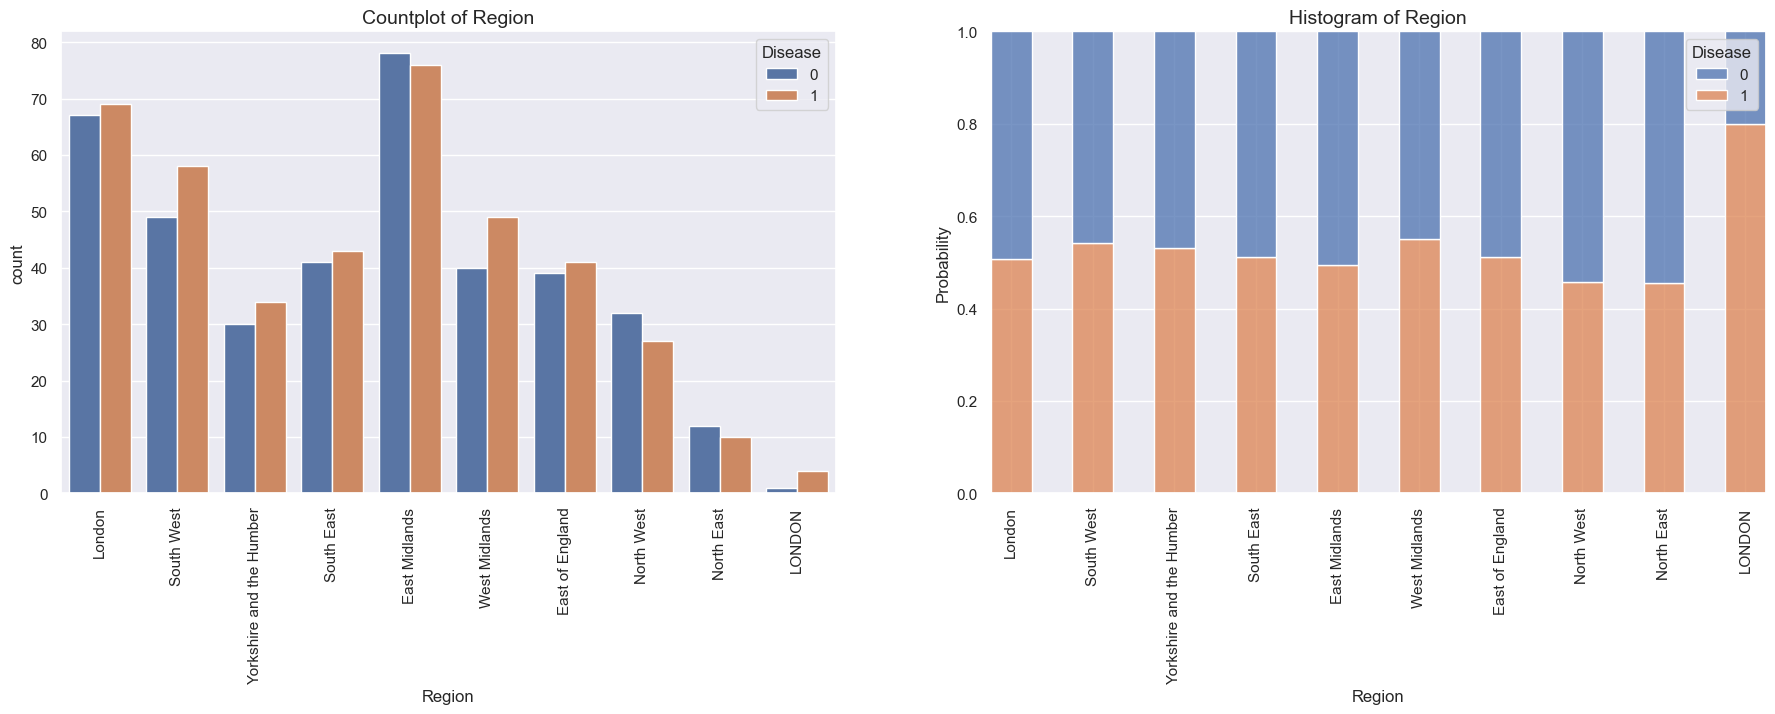

In [73]:
# Region
# Here, the even distribution of the dependent variable with respect to the region is visualized.

visualize_categorical(train_df_categorical.Region, train_df_categorical.Disease)

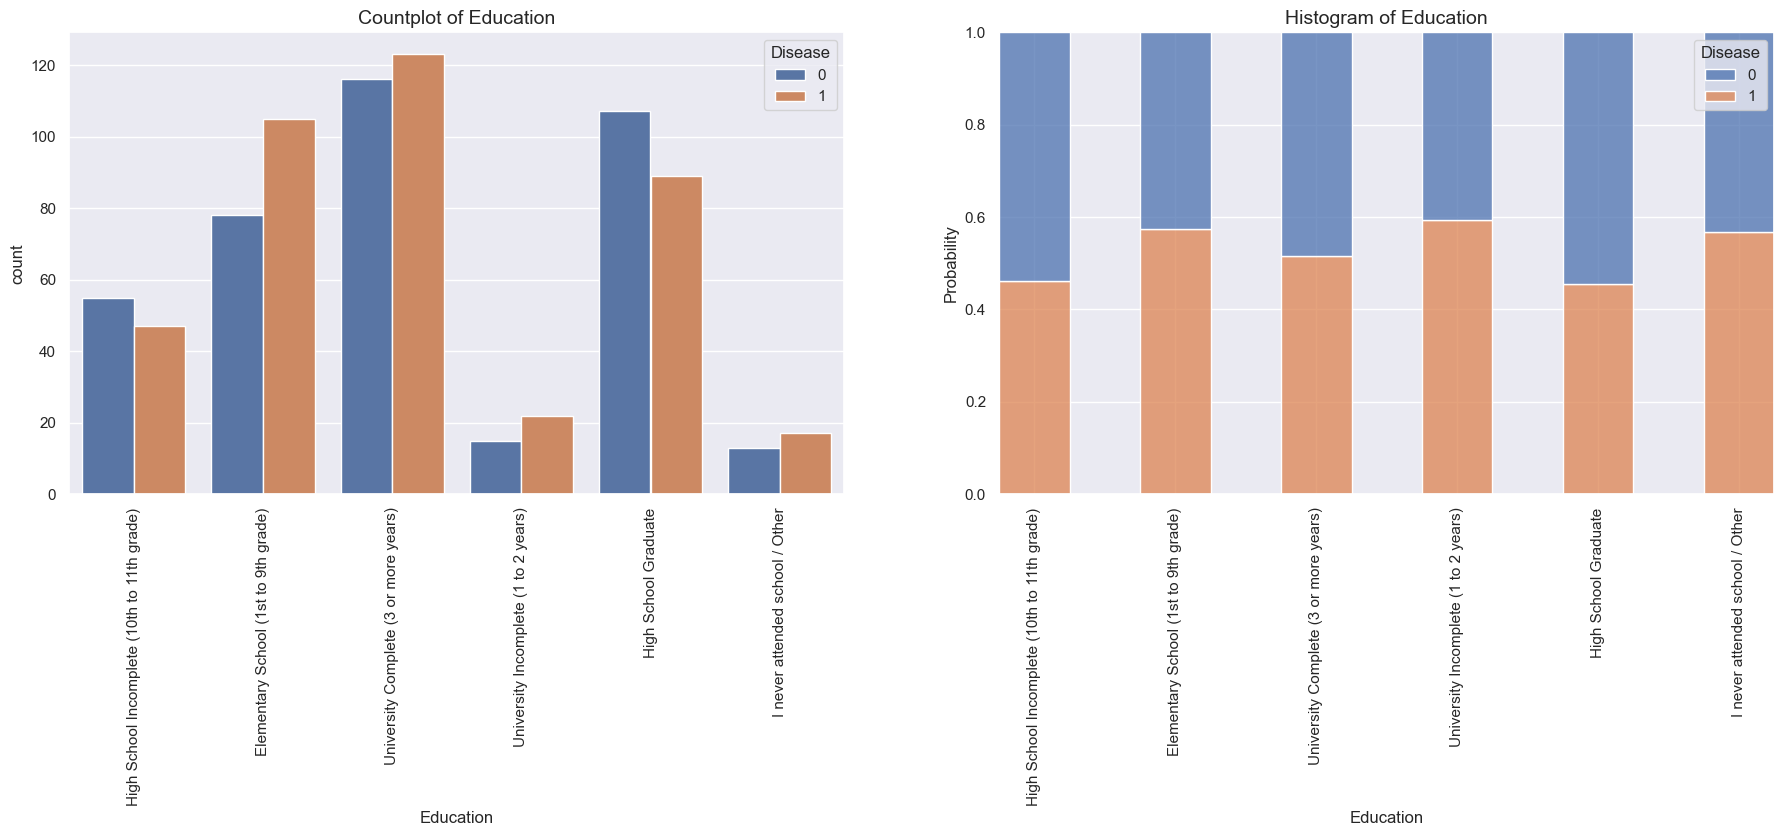

In [656]:
# Education
# There is no strong trend to be detected in the variable Education.

visualize_categorical(train_df_categorical.Education, train_df_categorical.Disease)

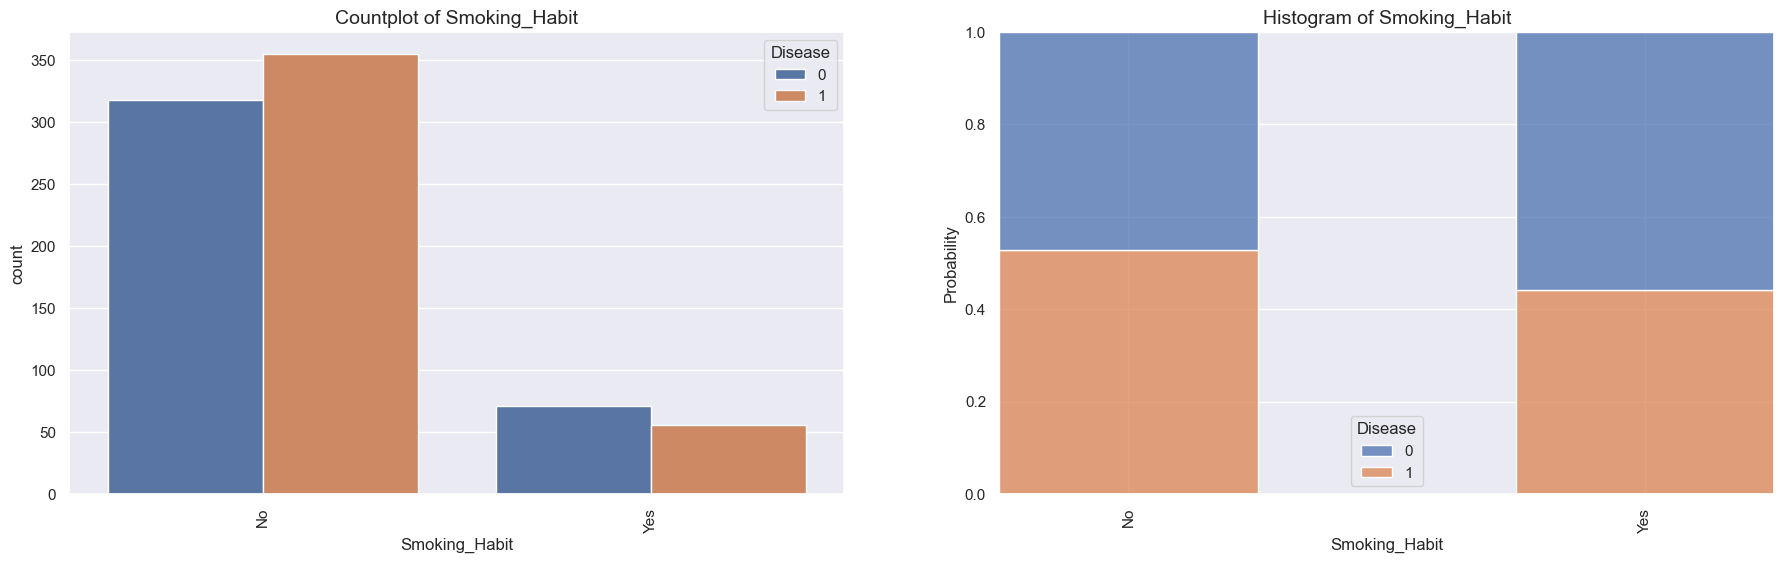

In [657]:
# Smoking_Habit
# The majority of the observed patients do not smoke.
# Percentagewise we have an even distribution of the dependent variable.

visualize_categorical(train_df_categorical.Smoking_Habit, train_df_categorical.Disease)

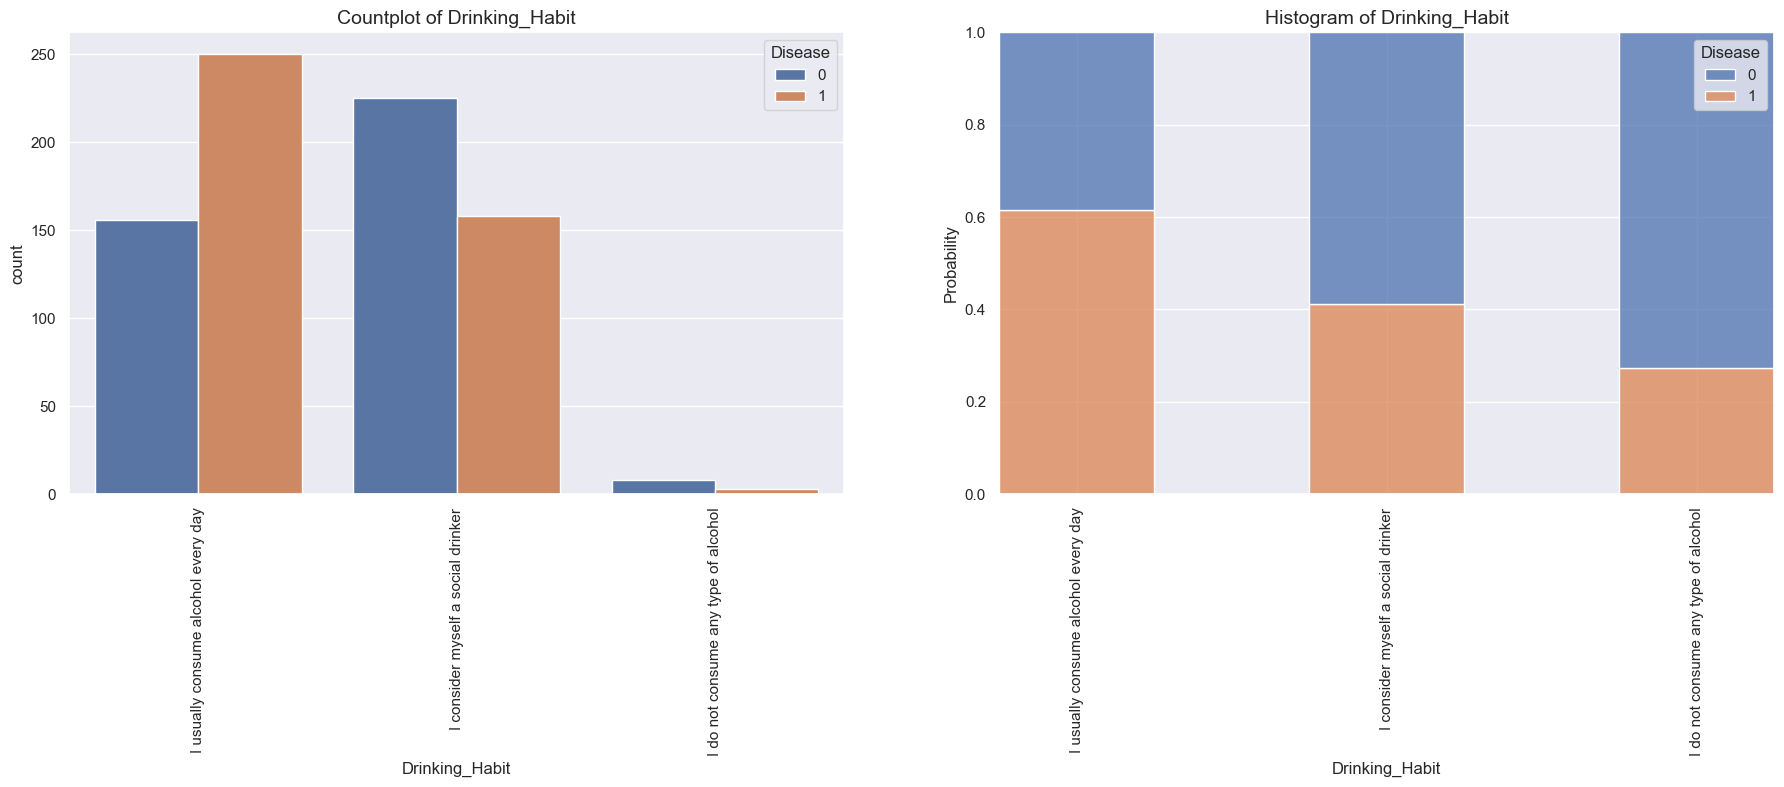

In [658]:
# Drinking_Habit
# The majority of patients observed consider themselves regular drinkers. 
# Patients with the disease drink more than patients without the disease. 

visualize_categorical(train_df_categorical.Drinking_Habit, train_df_categorical.Disease)

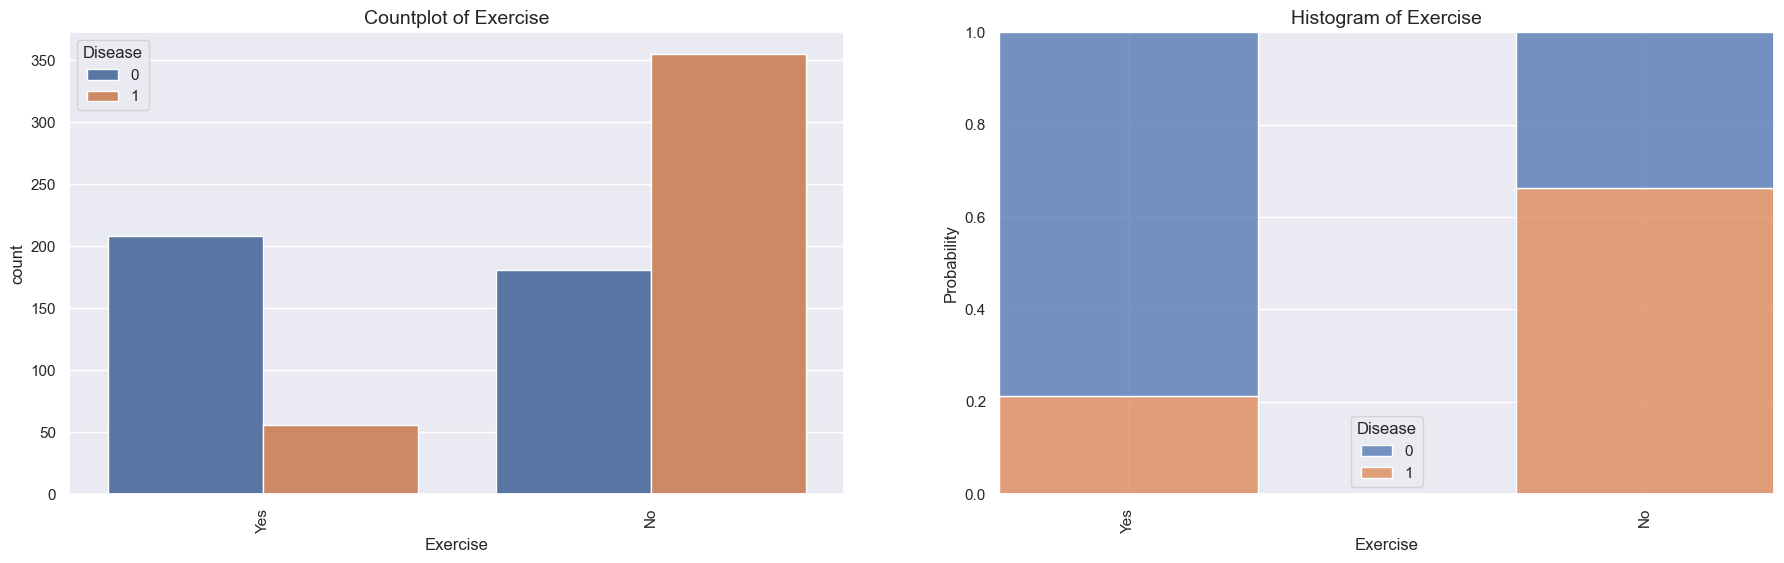

In [659]:
# Exercise
# In line with the higher BMI, a trend can be derived with regard to the variable Exercise. 
# Patients with the disease exercise overall less than patients without the disease.

visualize_categorical(train_df_categorical.Exercise, train_df_categorical.Disease)

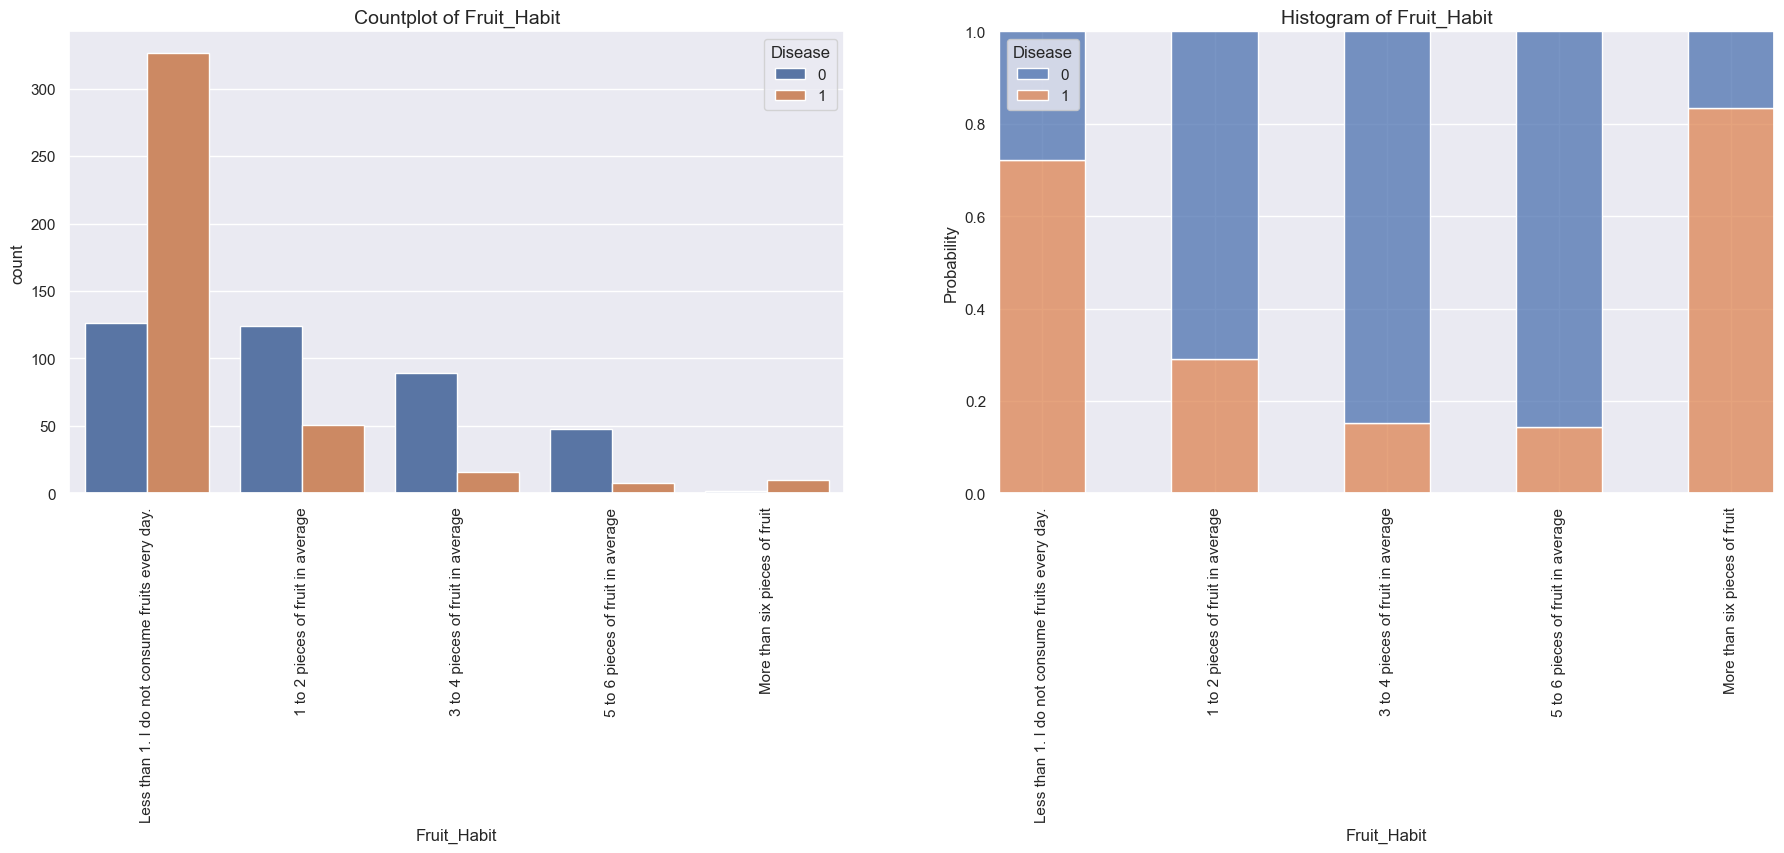

In [660]:
# Fruit_Habit
# Patients with the disease were largely composed of the categories 
# "More than six pieces of fruit" and "Less than one piece of fruit a day". 
# The feature does not indicate distinct correlation with the dependent variable.

visualize_categorical(train_df_categorical.Fruit_Habit, train_df_categorical.Disease)

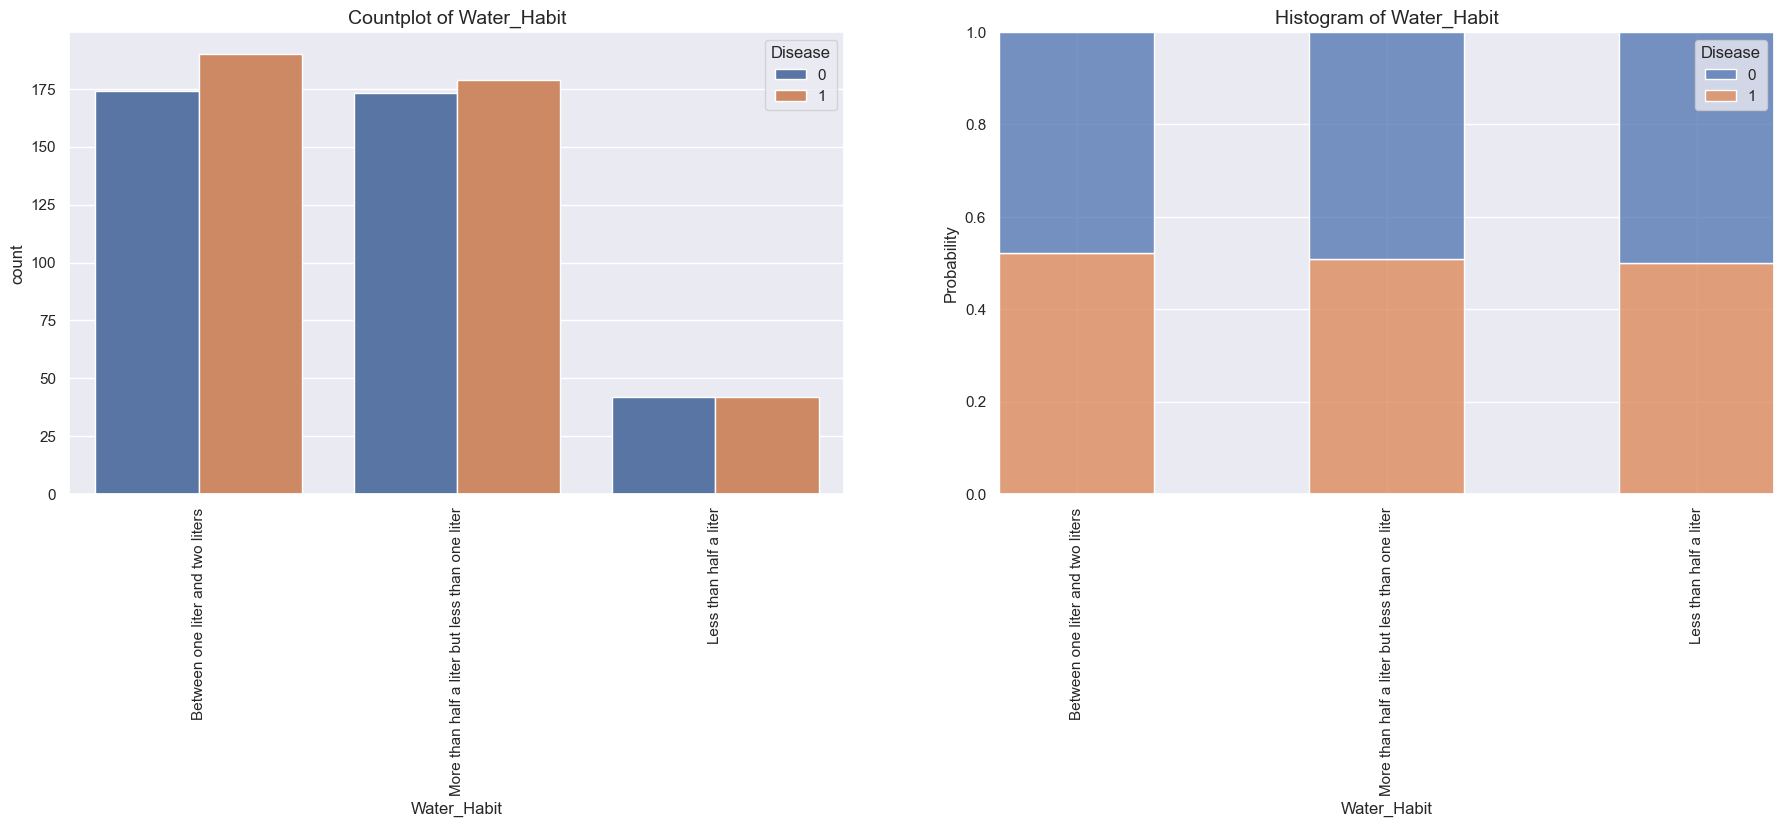

In [661]:
# Water_Habit
# Percentagewise we have an even distribution of the dependent variable.
# Generally, both groups of patients drink between half a liter and two liters a day.

visualize_categorical(train_df_categorical.Water_Habit, train_df_categorical.Disease)

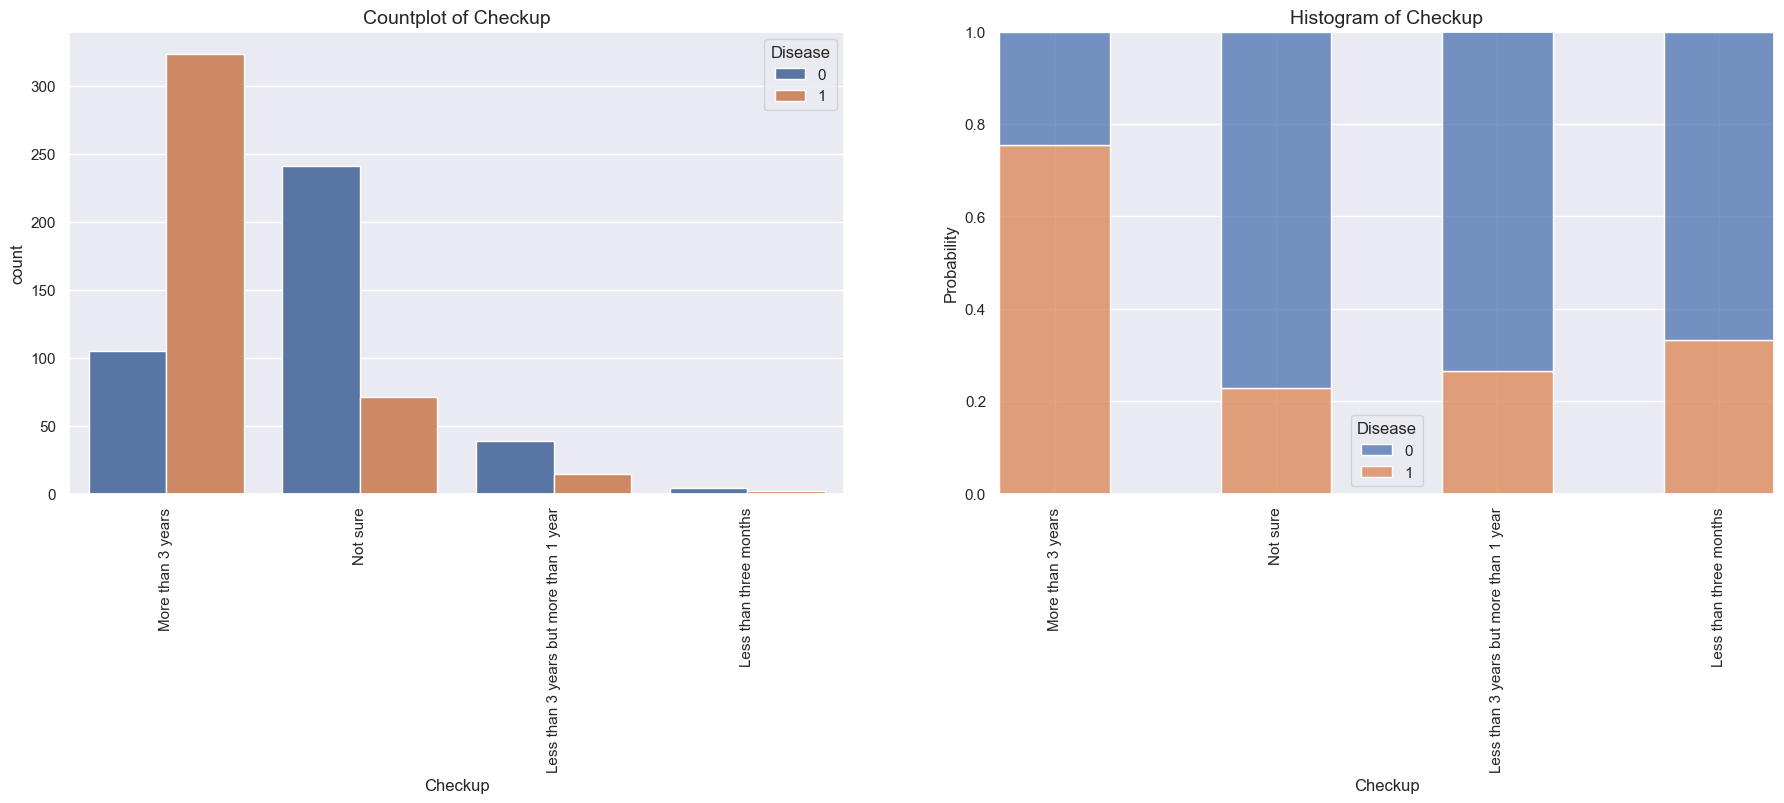

In [662]:
# Checkup
# The largest distribution of patients with the disease sees
# a doctor less than every 3 years. 

visualize_categorical(train_df_categorical.Checkup, train_df_categorical.Disease)

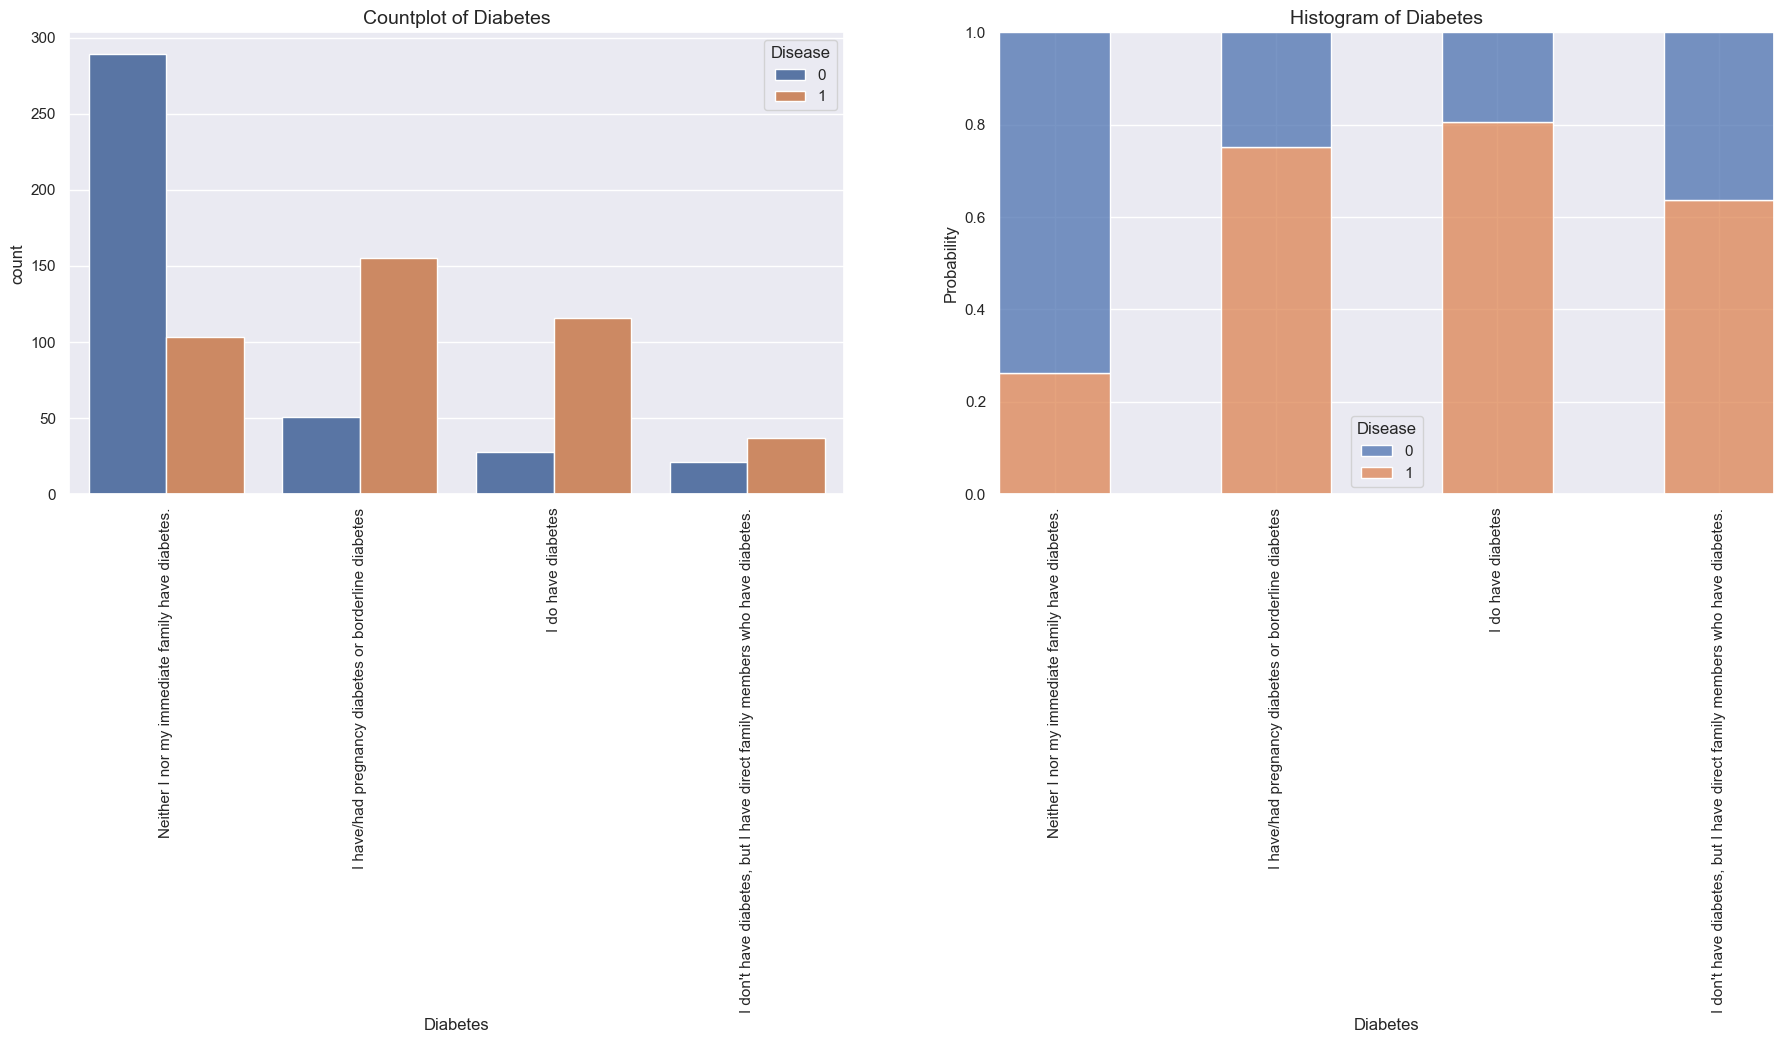

In [663]:
# Diabetes
# People with the disease are more likely to have diabetes or relatives with diabetes.

visualize_categorical(train_df_categorical.Diabetes, train_df_categorical.Disease)

### Conclusion on categorical features

As conclusion we can make the following observations:
- Most of the features do not indicate statistical correlation with the dependend variable.
- Trends show that patients with the disease have a higher likelihood to have/get diabetes, they overall exercise less and drink more alcohol than the other group of patients.
- Additionally, the largest distribution of patients with the disease sees the doctor only less than every 3 years.
- The two binary variables Smoking_Habit and Excercise can be easily changed for later training in values 0 and 1. 
- However we identify in six features an ordinal sorting, we must see how well a Ordinal Scaling can fit to the features.


<a class="anchor" id="NumericalFeatures">

### 4.1.3. Numerical Features

</a>

Following we will anaylse the numerical features one by one and try to identify correlations between them.

In [664]:
# Save a copy of the train exploration dataset.

train_df_numerical = train_df_explo[numerical_features]

In [665]:
# Checking the numerical features.

train_df_numerical.head()

Birth_Year  Disease  Height  Weight  High_Cholesterol  \
PatientID                                                          
1167             1965        1     155      67               358   
1805             1969        1     173      88               230   
1557             1974        1     162      68               226   
1658             1958        0     180      66               313   
1544             1968        1     180      58               277   

           Blood_Pressure  Mental_Health  Physical_Health  
PatientID                                                  
1167                  120             21                2  
1805                  142              9                0  
1557                  122             26                0  
1658                  125             13                8  
1544                  125             18                2

#### Plotting numerical features

##### Boxplot and Histogram per feature

Number of outliers: 12


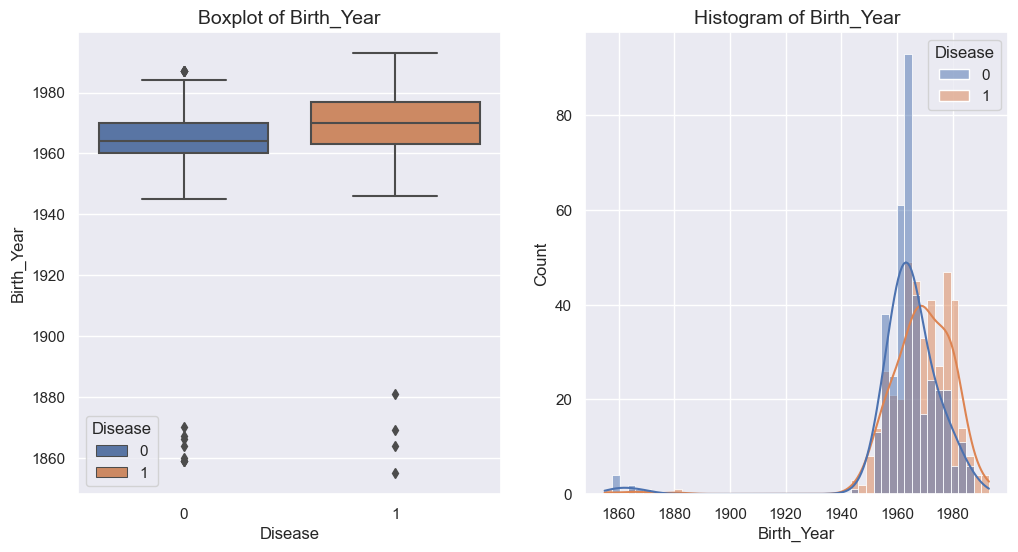

In [666]:
# Birth_Year
# Clearly shows 12 outliers, the people born before the year 1900 died already.
# The majortiy of patients with no disease are in average older as the patients with disease. 
# Both distributions of the histograms are approximately normal distributed. 

selection = train_df[train_df["Birth_Year"] < 1900].shape[0]

print(f"Number of outliers: {selection}")

visualize_numerical(train_df_numerical.Birth_Year, train_df_numerical.Disease)

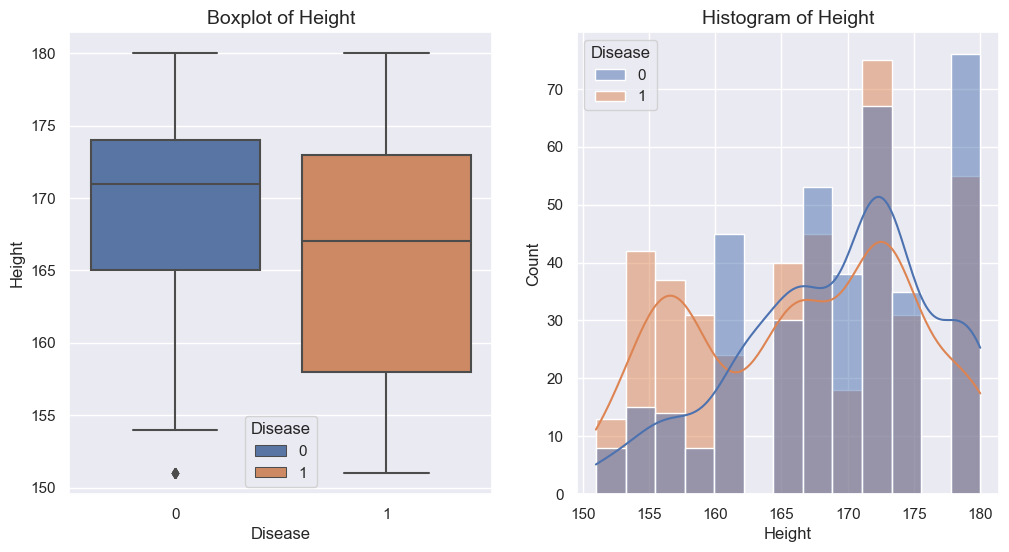

In [667]:
# Height
# There is one outlier in Height with disease 0.
# The histogram does not show a clear distribution of the disease by the height.
# Overall, patients with the disease seem to be smaller.

visualize_numerical(train_df_numerical.Height, train_df_numerical.Disease)

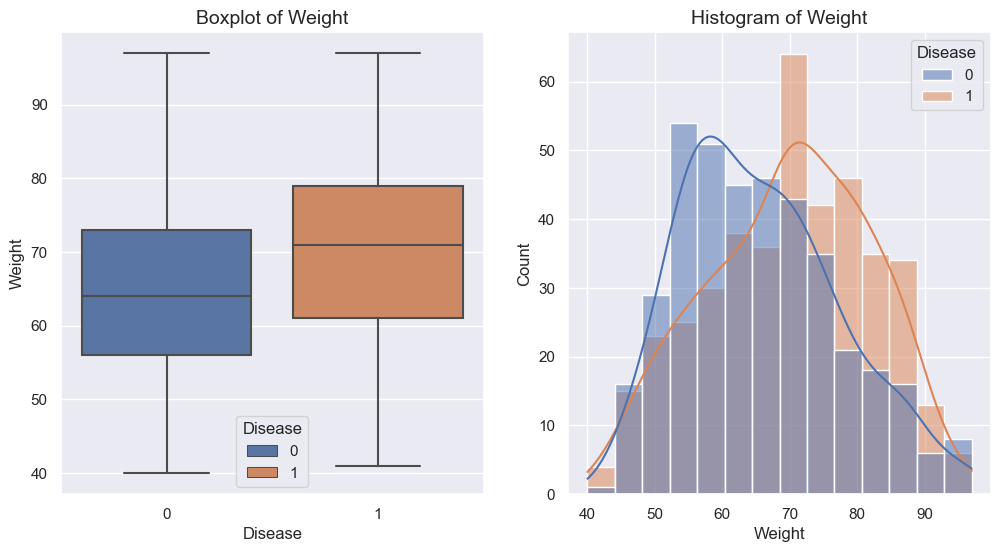

In [668]:
# Weight
# No outliers
# Both distributions are normal distributed.
# The patients with higher weight tend to have more often the disease
# as patients with lower weight.

visualize_numerical(train_df_numerical.Weight, train_df_numerical.Disease)

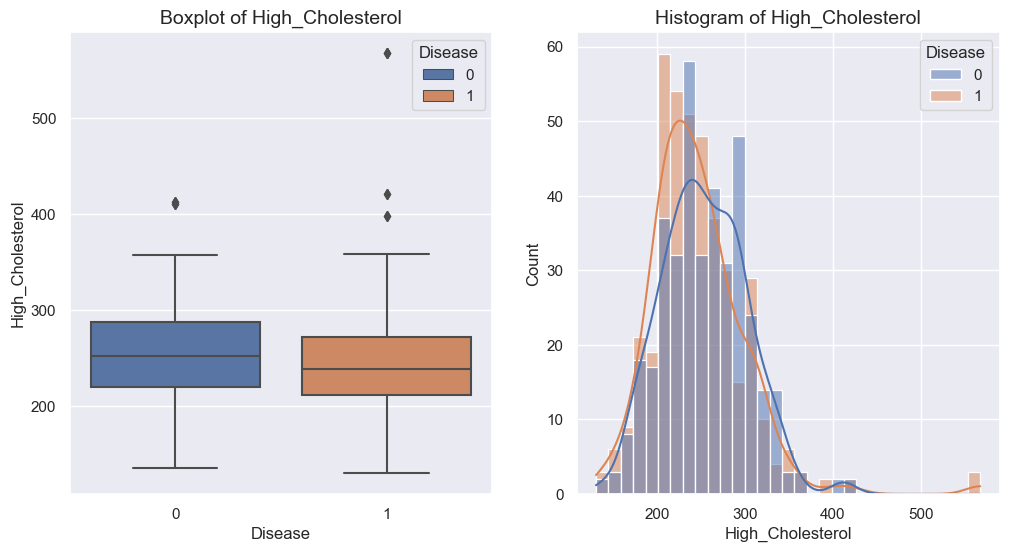

In [669]:
# High_Cholesterol
# 4 outliers
# Both distributions are approximately normal distributed. 
# Patients with lower cholesterol value seem to be more likely to have the disease.

visualize_numerical(train_df_numerical.High_Cholesterol, train_df_numerical.Disease)

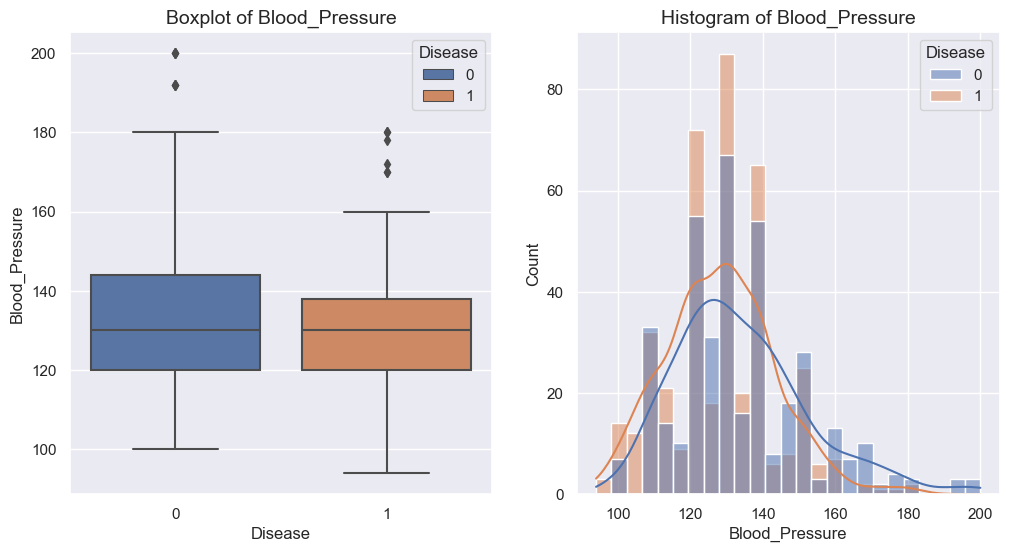

In [670]:
# Blood_Pressure
# 6 outliers
# Both distributions are normal distributed. 
# Overall, patients without the disease have higher blood pressure. 

visualize_numerical(train_df_numerical.Blood_Pressure, train_df_numerical.Disease)

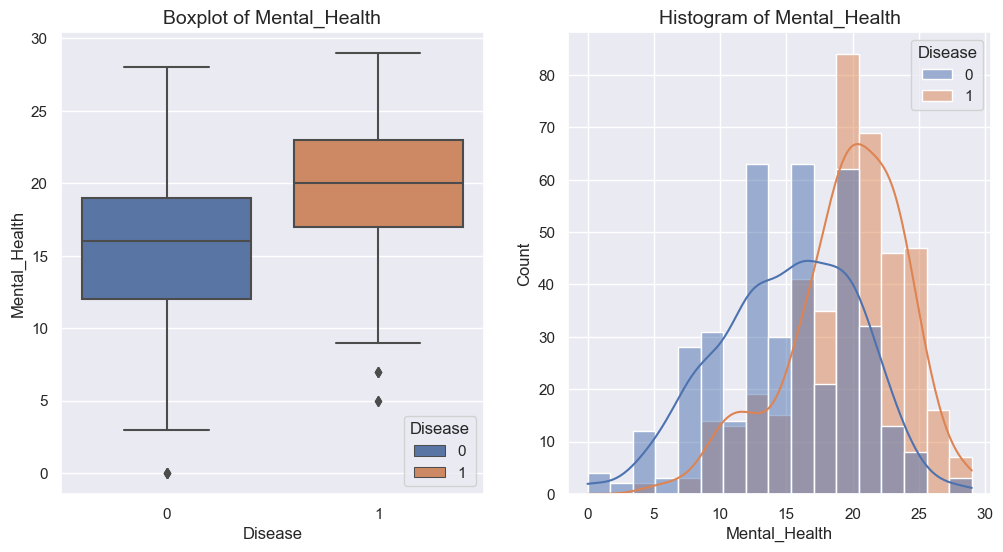

In [671]:
# Mental_Health
# 3 outliers
# A high value indicates poor mental health.
# Patients with this disease rate themselves as less mentally healthy.

visualize_numerical(train_df_numerical.Mental_Health, train_df_numerical.Disease)

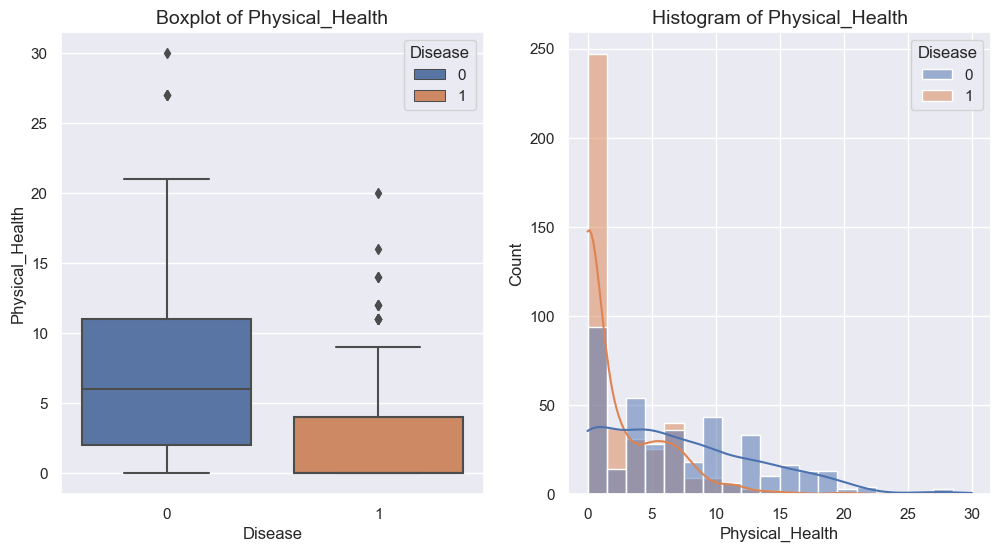

In [672]:
# Physical_Health
# 7 outliers
# A high value indicates a poor physical health.
# Patients with the disease seem to have less limitations on their physical health.

visualize_numerical(train_df_numerical.Physical_Health, train_df_numerical.Disease)

#### Pairplot for all numerical features

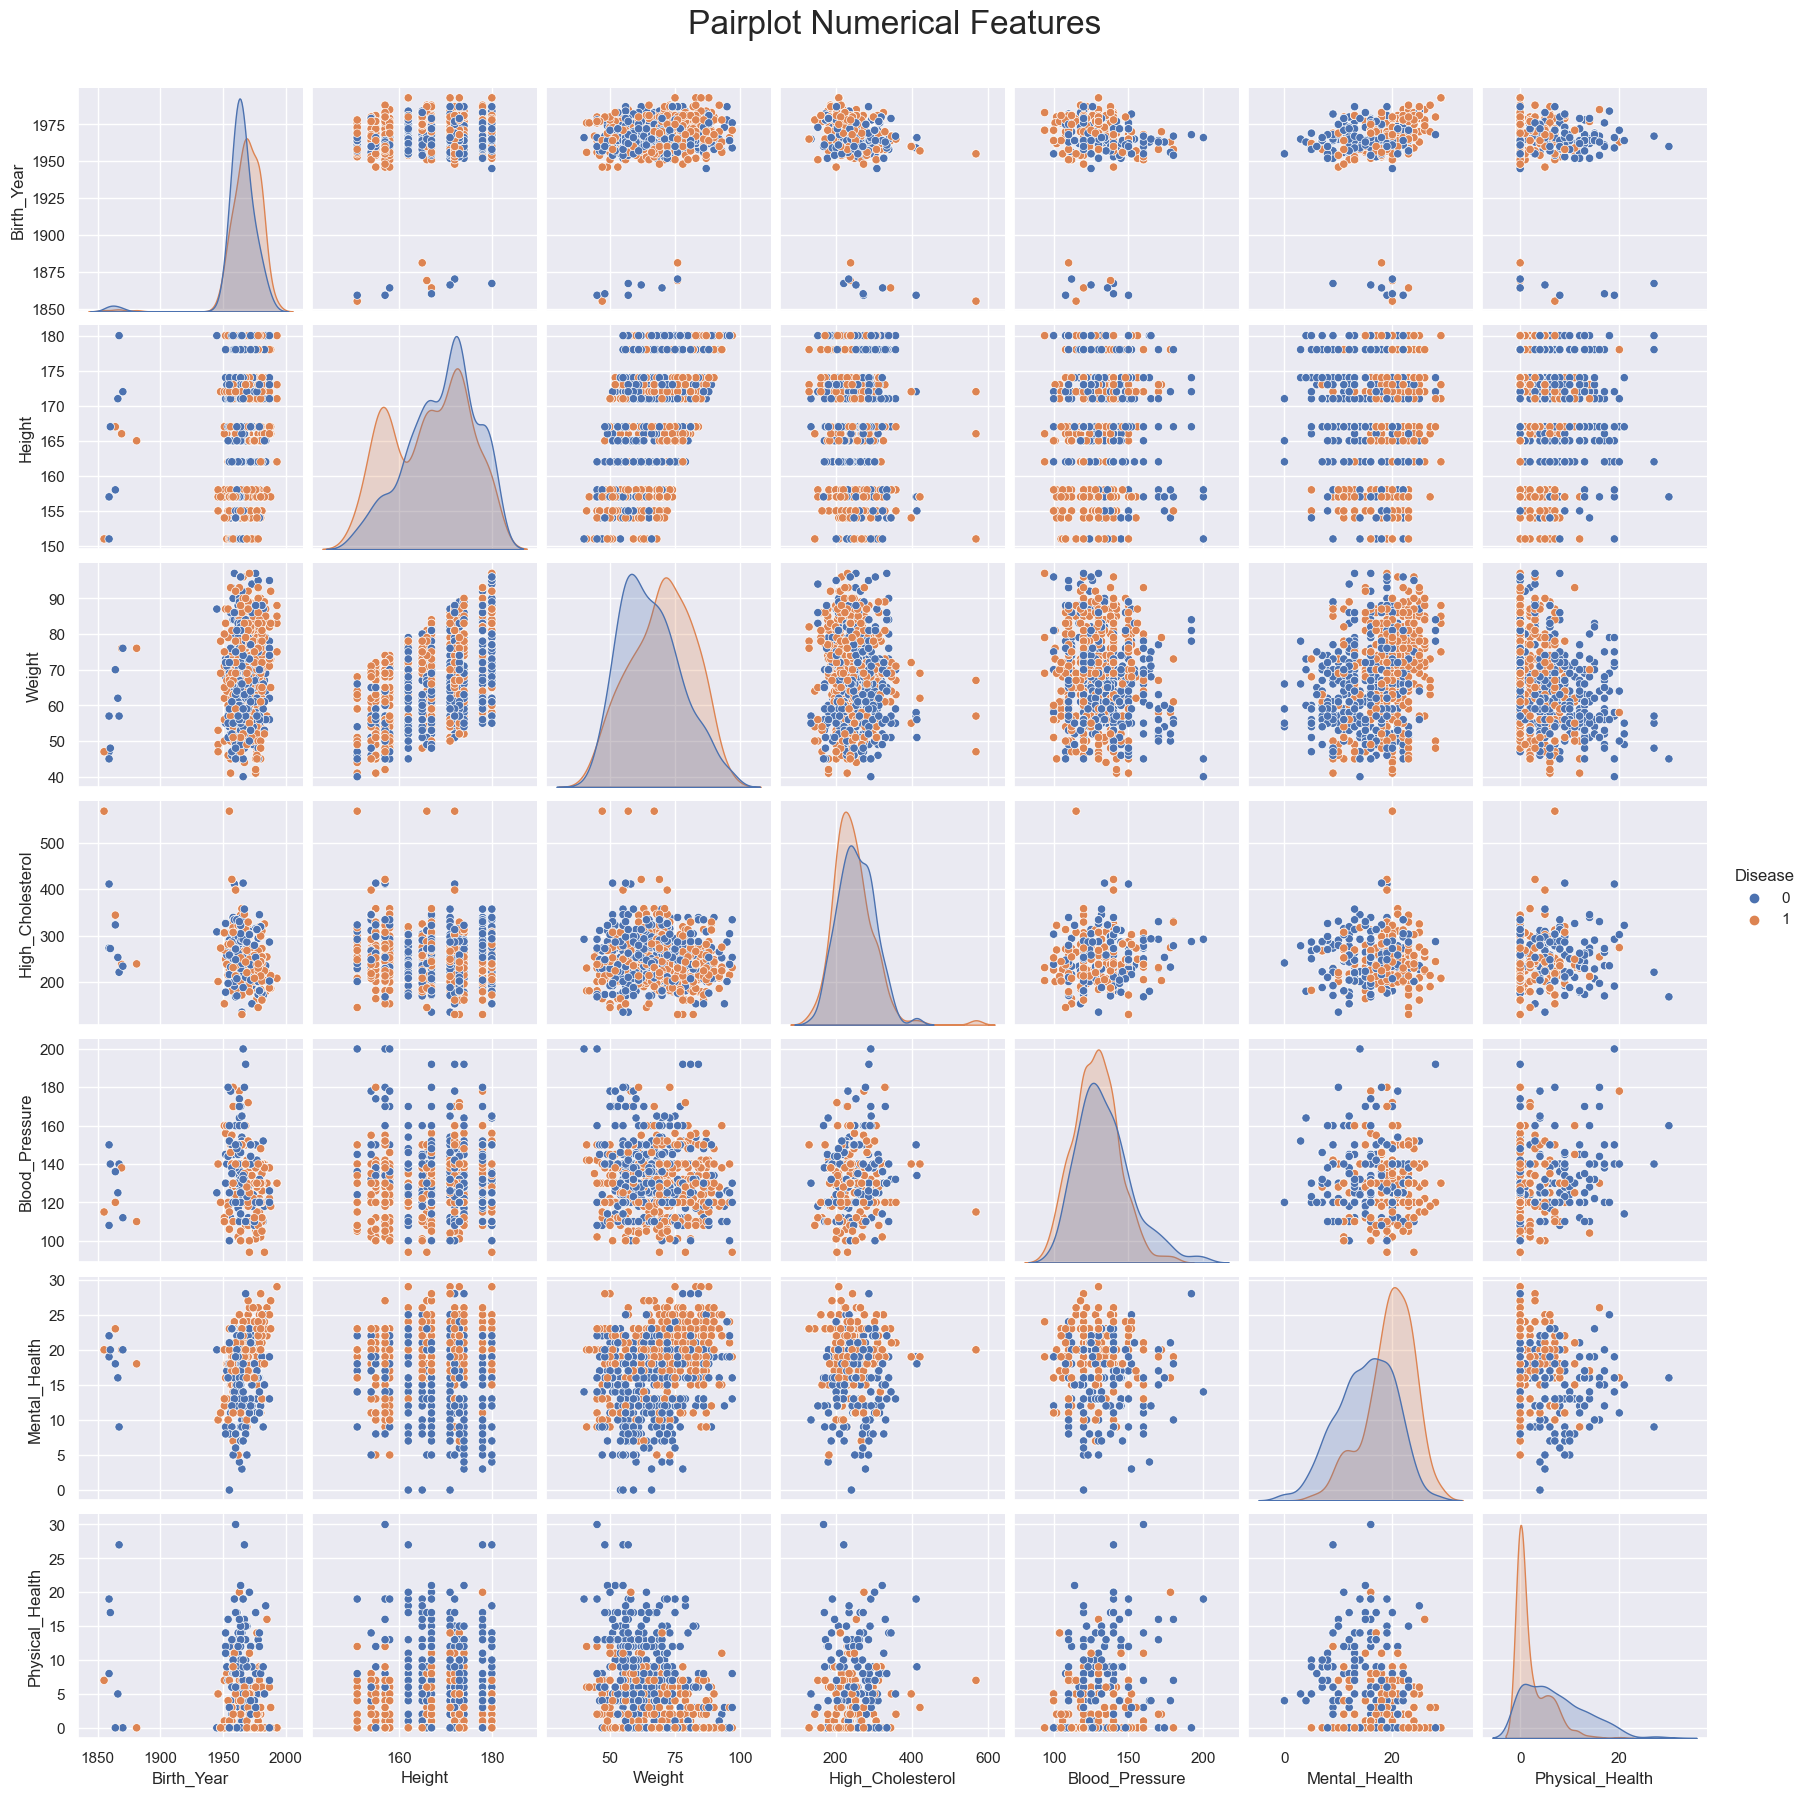

In [673]:
# Pairplot for all numerical features.
# Except Physical health, all features can be considered to have 
# a distribution similar to a Normal.
# However, it would be needed to remove outliers.
# There is no clear visualization of class separation in any scatterplot.
# The boxplots were more clear.

pplot = sns.pairplot(data=train_df_numerical, hue="Disease")

pplot.fig.suptitle("Pairplot Numerical Features", y=1.03, size=24)
plt.show()

#### Check correlation between numerical features

In [674]:
# The strongest correlation of 0.51 can be detected between Height 
# and Weight, which is not very strong.

train_df_numerical.corr()

Birth_Year   Disease    Height    Weight  High_Cholesterol  \
Birth_Year          1.000000  0.159028  0.097544  0.160576         -0.232736   
Disease             0.159028  1.000000 -0.170779  0.175166         -0.075345   
Height              0.097544 -0.170779  1.000000  0.512673         -0.091066   
Weight              0.160576  0.175166  0.512673  1.000000         -0.051133   
High_Cholesterol   -0.232736 -0.075345 -0.091066 -0.051133          1.000000   
Blood_Pressure     -0.122117 -0.166723 -0.018564 -0.094461          0.117339   
Mental_Health       0.199528  0.417867 -0.042378  0.301311          0.002479   
Physical_Health    -0.159870 -0.441631  0.059302 -0.387060          0.044540   

                  Blood_Pressure  Mental_Health  Physical_Health  
Birth_Year             -0.122117       0.199528        -0.159870  
Disease                -0.166723       0.417867        -0.441631  
Height                 -0.018564      -0.042378         0.059302  
Weight                 -0.094461       0.301311        -0.387060  
High_Cholesterol        0.117339       0.002479         0.044540  
Blood_Pressure          1.000000      -0.025034         0.158393  
Mental_Health          -0.025034       1.000000        -0.333152  
Physical_Health         0.158393      -0.333152         1.000000

<AxesSubplot: >

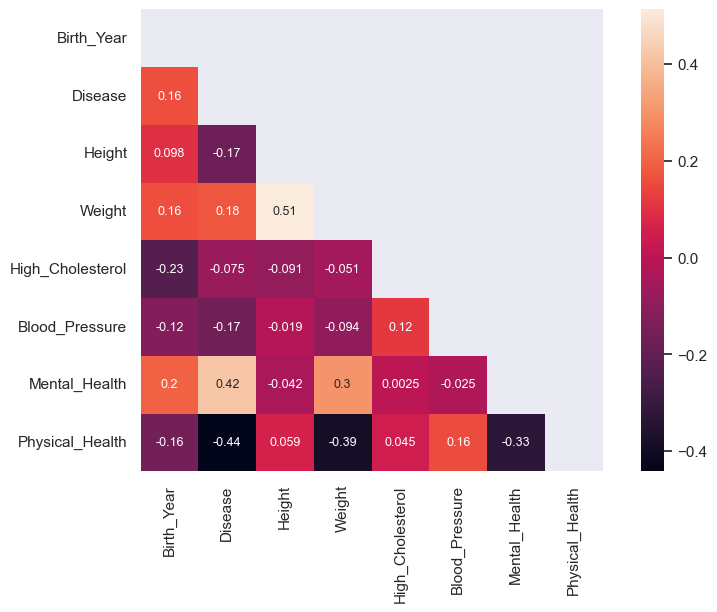

In [675]:
# Create a heatmap to check correlation between numerical features.
# The correlation among the features is very low. 

corr_matrix = train_df_numerical.corr()

# Generate a mask for the upper triangle.
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask.
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, annot_kws={"size": 9})

### Conclusion on numerical features

As conclusion we can make the following observations:
- Generally, no distinct correlation between the features can be detected, but trends.
- Of interest is that the patients with the disease weigh comparatively more and are generally smaller. Nevertheless, their physical health and medical values are more pronounced than in patients who are not affected by the disease. According to data, mental health is significantly lower for patients having the disease. 

<a class="anchor" id="DataPre-Processing">

# 5. Data Pre-Processing

</a>

<a class="anchor" id="Missingiandnconsistentvalues">

## 5.1. Missing and inconsistent values

</a>

In [676]:
# Correcting in feature Region the value LONDON to consistent value London.

train_df_categorical.loc[train_df_categorical["Region"] == "LONDON", "Region"] = "London"

In [677]:
# Handling NaN values in Education with imputing the values.
# We decide to use the mode of Education to replace the NaN values,
# because we don't want to lose other feature information given by
# the 13 rows.
# Notice that 13 rows are only 1.6% of the entire information of this attribute

train_df_categorical.loc[train_df_categorical["Education"].isna(), "Education"] = train_df_categorical["Education"].mode()[0]

<a class="anchor" id="FeatureEngineering">

## 5.2. Feature Engineering

</a>

#### Numerical features

In [678]:
# Add the age of the patient as numerical feature, because age can be easier
# interpretated than birth year.
# For calculation we take as assumption the current year minus the birth year.
# Drop in the end Birth_Year, to avoid having two features with the same information.

train_df_numerical = train_df_numerical.assign(Age= lambda x: 2022 - x["Birth_Year"])

train_df_numerical = train_df_numerical.drop("Birth_Year", axis=1)

"**Body mass index (BMI)** is a simple index of weight-for-height that is commonly used to classify overweight and obesity in adults. It is defined as a person's weight in kilograms divided by the square of his height in meters (kg/m2)."  

Source: https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight

In [679]:
# Add the BMI, to combine weight and height in one feature.
# We don't drop features weight and height, because we want to see the results of
# the feature selection first. 

train_df_numerical = train_df_numerical.assign(BMI= lambda x: x["Weight"] / (x["Height"]/100)**2)

train_df_numerical["BMI"] = train_df_numerical["BMI"].round(1)

#### Data Exploration of new features

- Boxplot and Histogram of new features
- Pairplot with other numerical features
- Correlation Heatmap with other numerical features

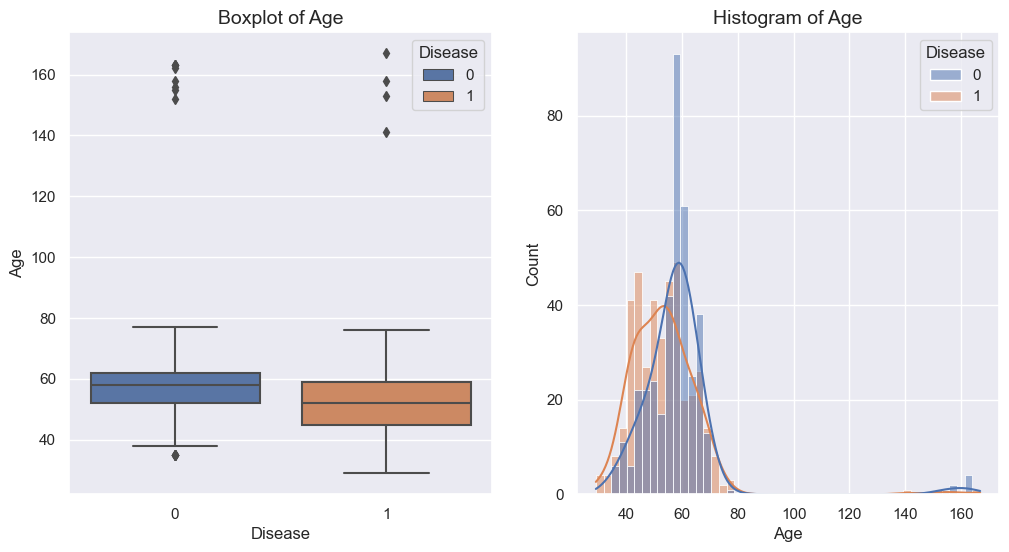

In [680]:
# Age
# The observations are the same as done for Birth_Year, because we just 
# changed the scaling of the feature:

# 12 outliers (like in Birth_Year feature)
# The majortiy of patients with no disease are in average older as the patients with disease. 
# Both distributions of the histograms are approximately normal distributed. 

visualize_numerical(train_df_numerical.Age, train_df_numerical.Disease)

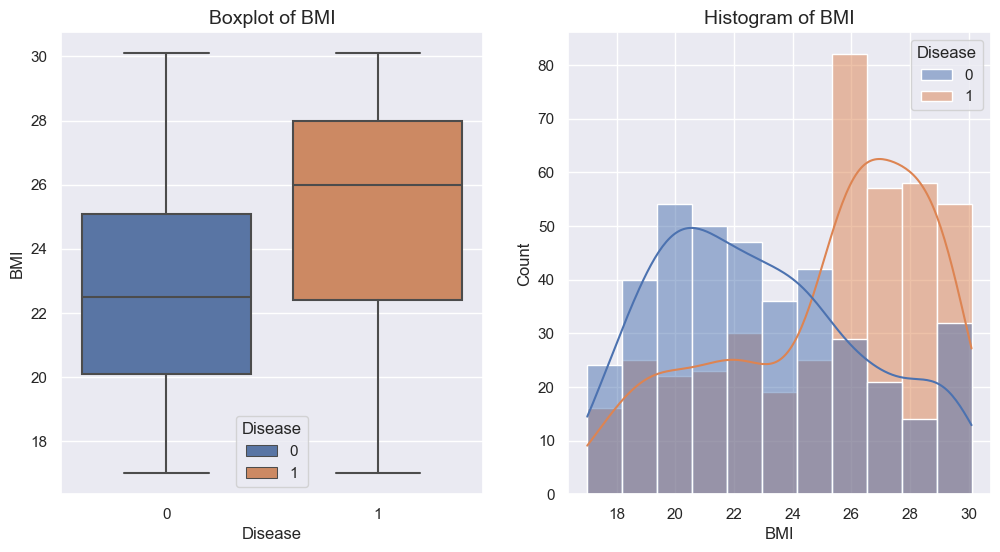

In [681]:
# BMI
# No outliers
# Patients with higher BMI are more likely to have the disesae,
# instead of patients with lower BMI.
# Which stands in line with the assumption, that patients with the disease
# weigh comparatively more and are generally smaller.

visualize_numerical(train_df_numerical.BMI, train_df_numerical.Disease)

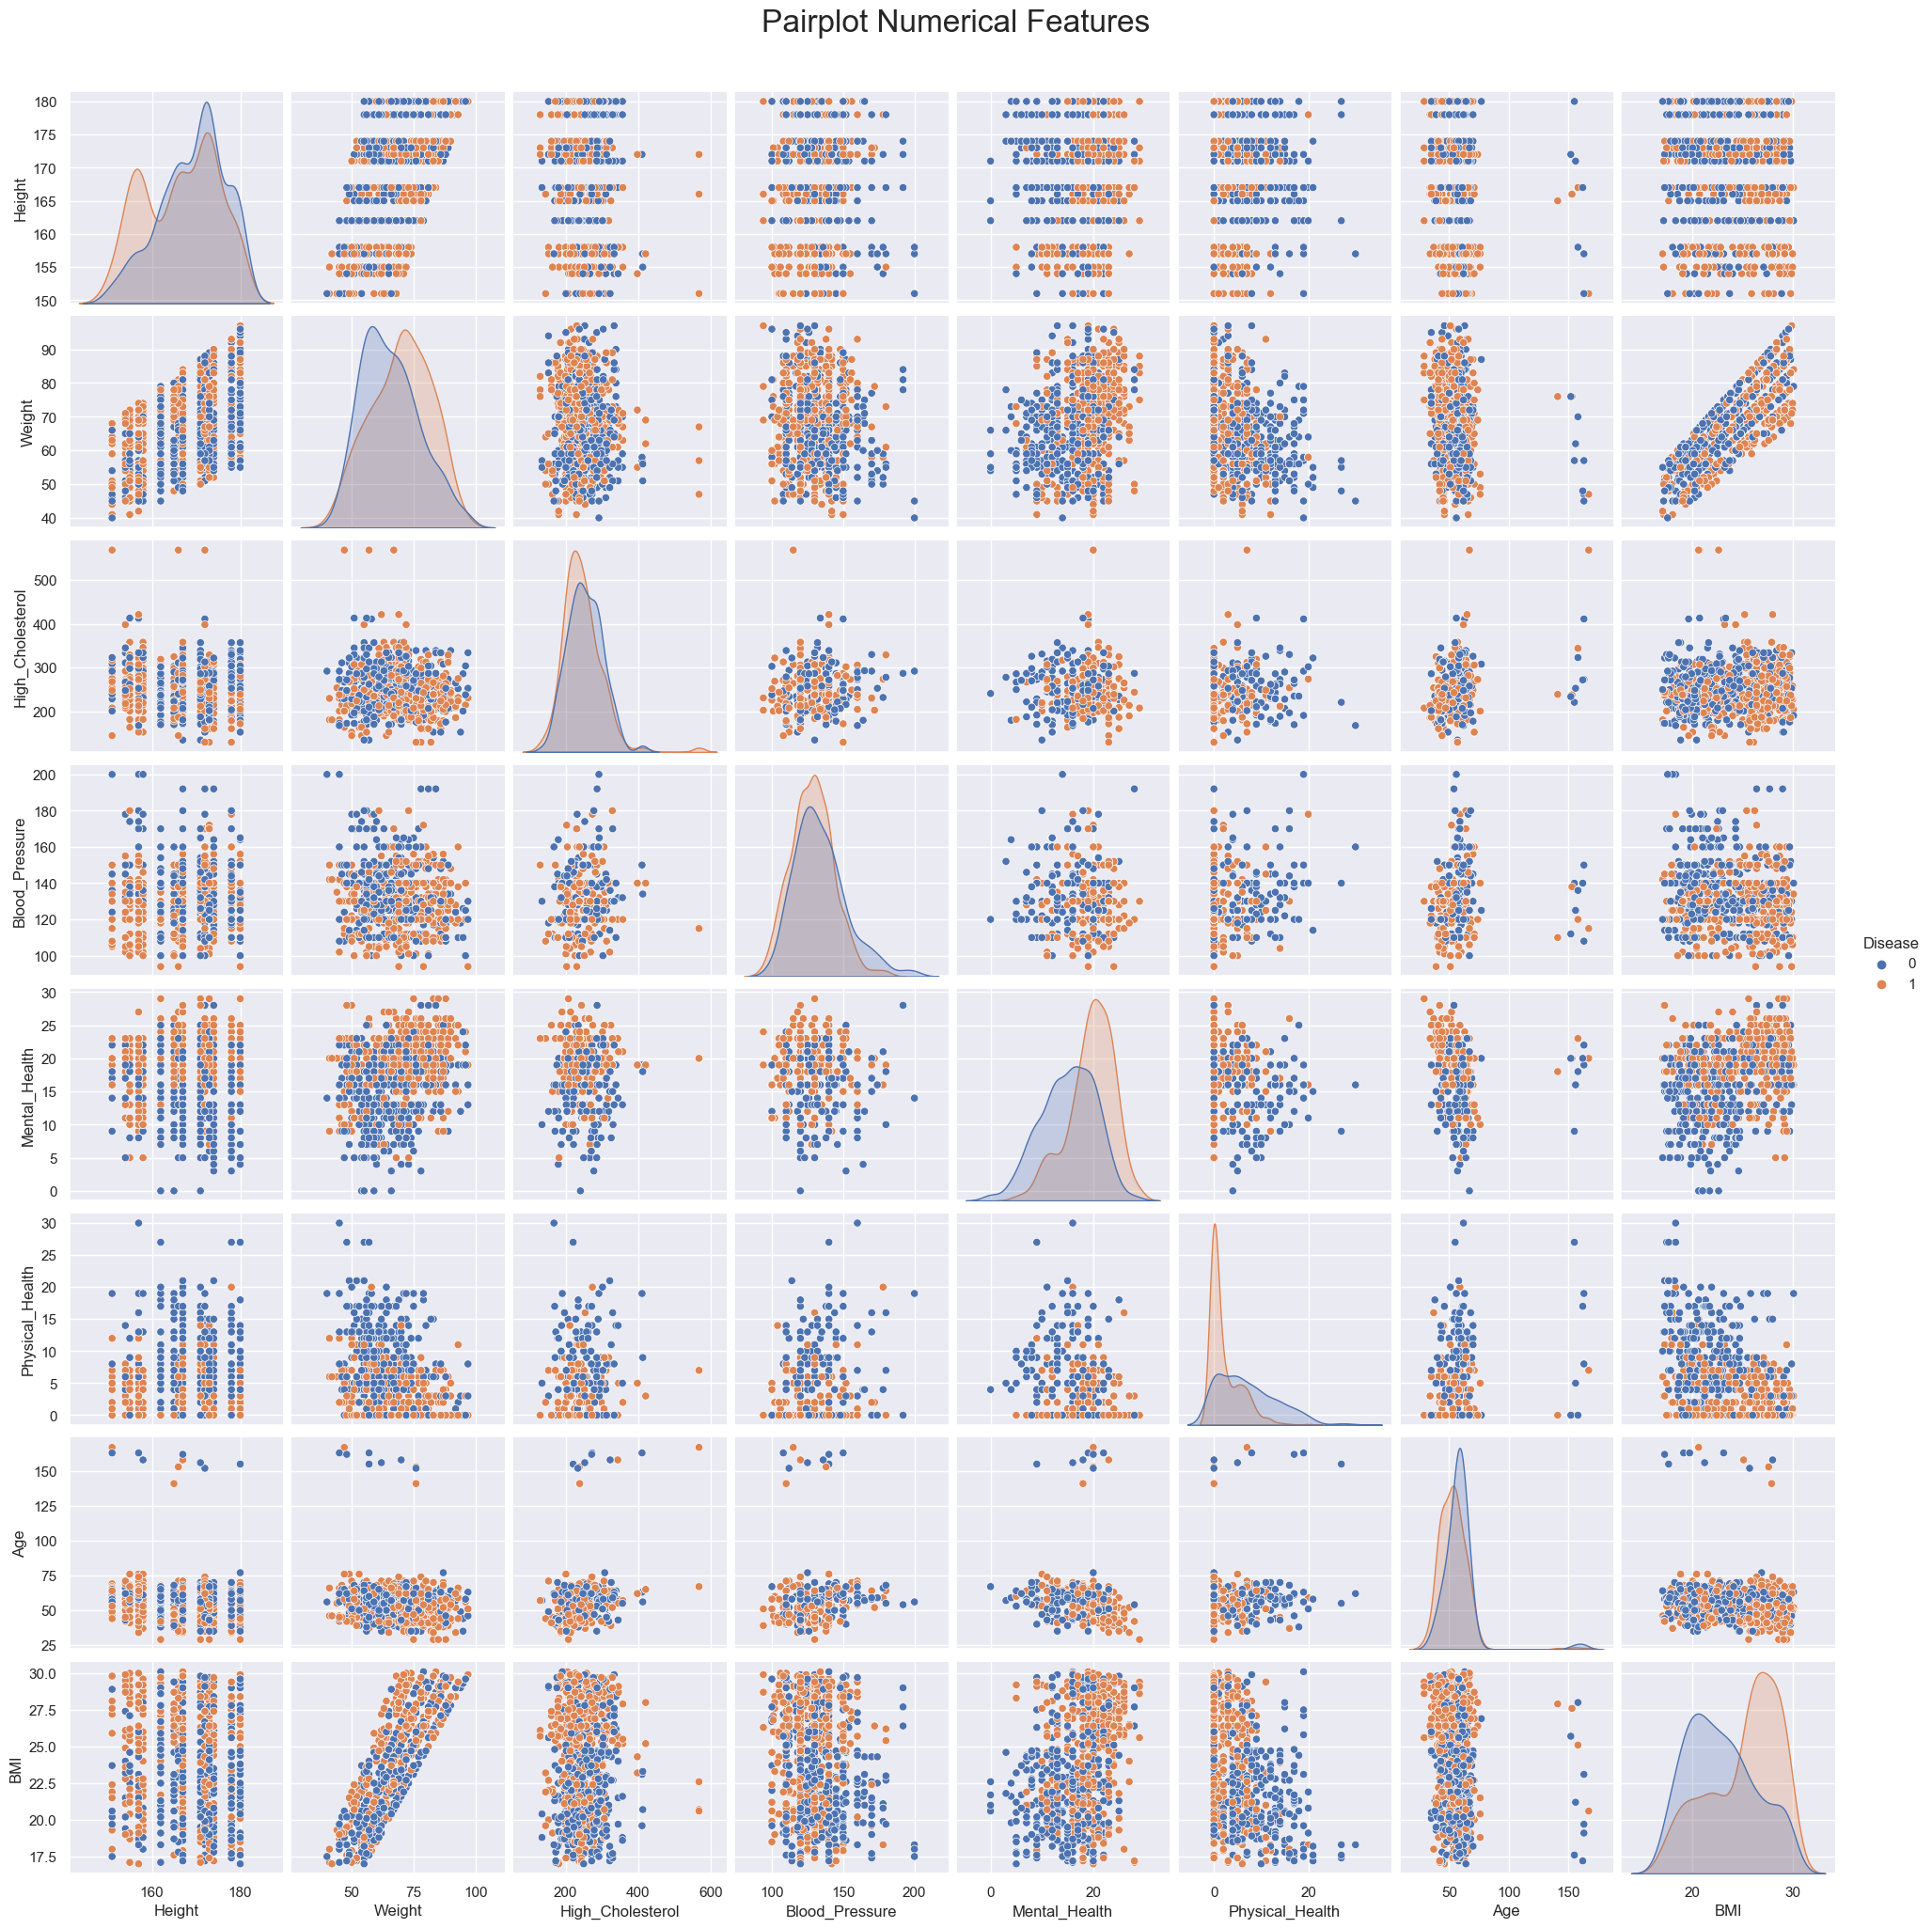

In [682]:
# Pairplot for all numerical features.
# Age characteristics is the same as Birth_Year in the previous pairplot.
# Any BMI scatterplot brought a clear visualization that showed differences 
# between who has and who has not the disease.
# BMI distribution could be consider to be aproximately normal.
# Again boxplots were better for interpretation.

pplot = sns.pairplot(data=train_df_numerical, hue="Disease")
pplot.fig.suptitle("Pairplot Numerical Features", y=1.03, size=24)
plt.show()

<AxesSubplot: >

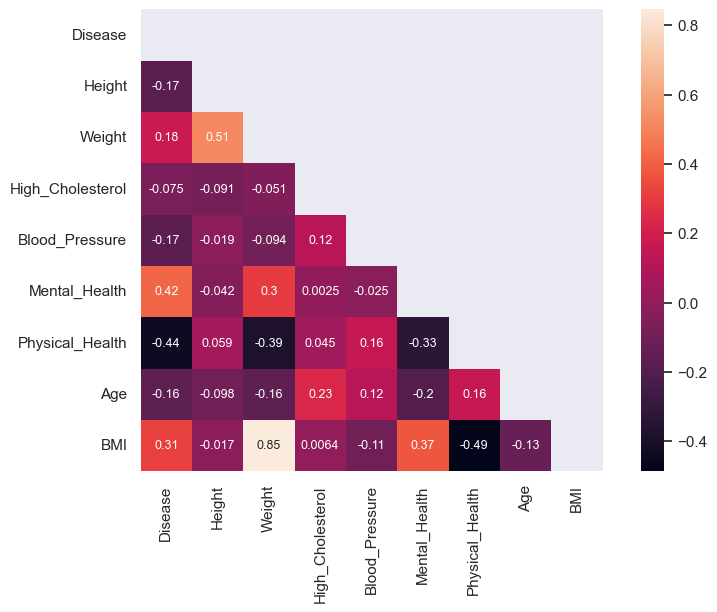

In [683]:
# Create a heatmap to check correlation with new numerical features.
corr_matrix = train_df_numerical.corr()

# Generate a mask for the upper triangle.
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask.
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, annot_kws={"size": 9})

### Conclusion on new numercial features
As conclusion we can make the following observations:
- Feature engineering did not reveal any features with stronger correlations. Since the body mass index (BMI) is a person's weight in kilograms divided by the square of height in meters, a correlation with weight od 0.85 can be seen here.
- Also, there is a negative correlation of -0.49 detectable between pyhsical health and the BMI.
- Age has the same correlations as Birth_Year listed earlier.

#### Categorical features

In [684]:
# Create column Gender to identify if disease is different for female or male
# 1 = male, 0 = female

train_df_categorical["Gender"] = [1 if i.split(' ')[0] == 'Mr.' else 0 for i in train_df_categorical.Name]

In [685]:
# Drop the name of the patient, because we extracted all
# necessary information from the column.

train_df_categorical = train_df_categorical.drop("Name", axis=1)

**Age classification** according World Health Organization (WHO)

Source: https://cdn.who.int/media/docs/default-source/gho-documents/global-health-estimates/gpe_discussion_paper_series_paper31_2001_age_standardization_rates.pdf

In [686]:
# Adding the Age_class feature, to further explore, if we
# see age clusters, where the disease occurs more frequently.

age_labels = [
            "Age_0_4", 
            "Age_5_14", 
            "Age_15_29",
            "Age_30_44",
            "Age_45_59",
            "Age_60_69",
            "Age_70_79",
            "Age_80+"
            ]


# Adding column Age temporarly
train_df_categorical["Age"] = train_df_numerical["Age"]

train_df_categorical["Age_class"] = pd.cut(
                                x = train_df_categorical["Age"],
                                bins = [0, 5, 15, 30, 45, 60, 70, 80, np.Infinity],
                                labels = age_labels                             
                                )

# Remove column Age from dataset
train_df_categorical.drop("Age", axis=1, inplace=True)

#### Data Exploration of new features

- Barplot of each feature

In [687]:
# Gender
# Total male patients = 564
# Total female patients = 236
# We have more male patients as female patients. The proportion
# of male patients who have the disease is higher, as for females.
# Gender could be an interesting feature for training model later on.

train_df_categorical.groupby("Gender", axis=0)["Disease"].value_counts()

Gender  Disease
0       1          174
        0           62
1       0          327
        1          237
Name: Disease, dtype: int64

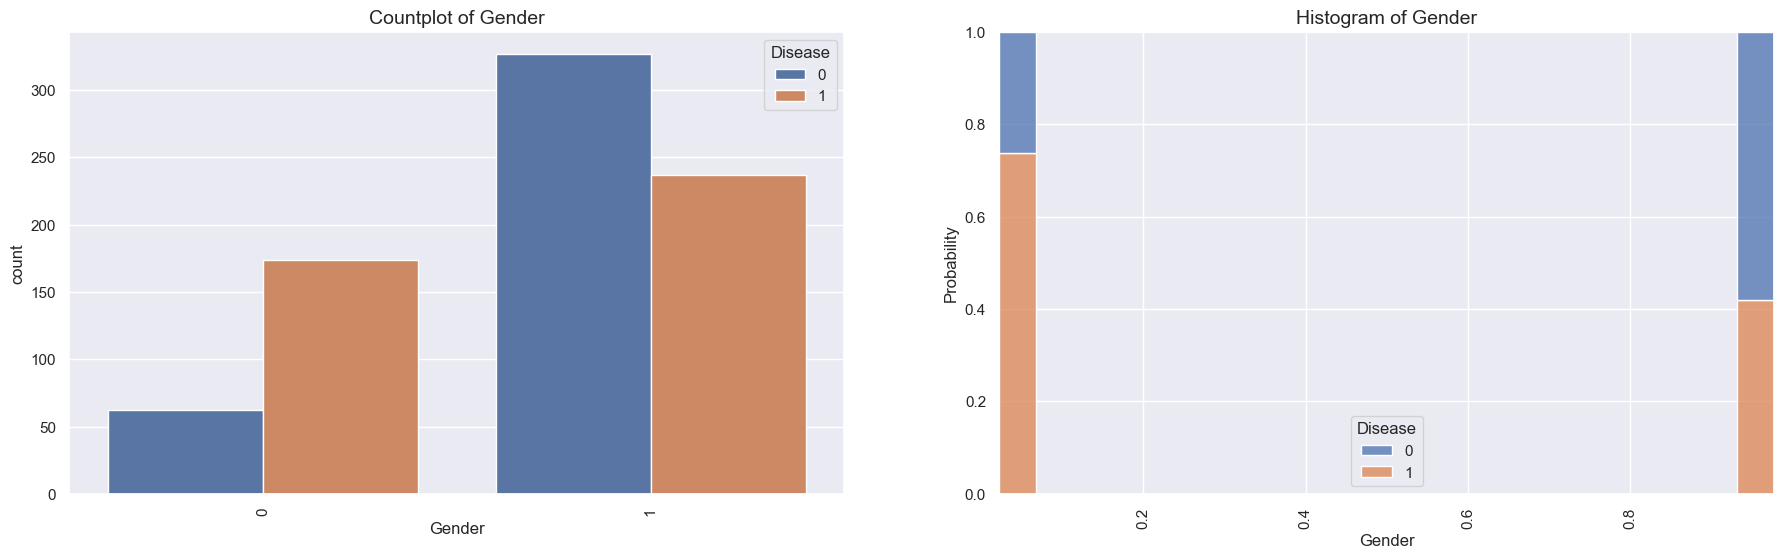

In [688]:
# Plot the Gender with disease
# Visualizing the unbalanced dataset in terms of the independent variable Gender.
# Percentagewise, more women are affected by the disease.

visualize_categorical(train_df_categorical.Gender, train_df_categorical.Disease)

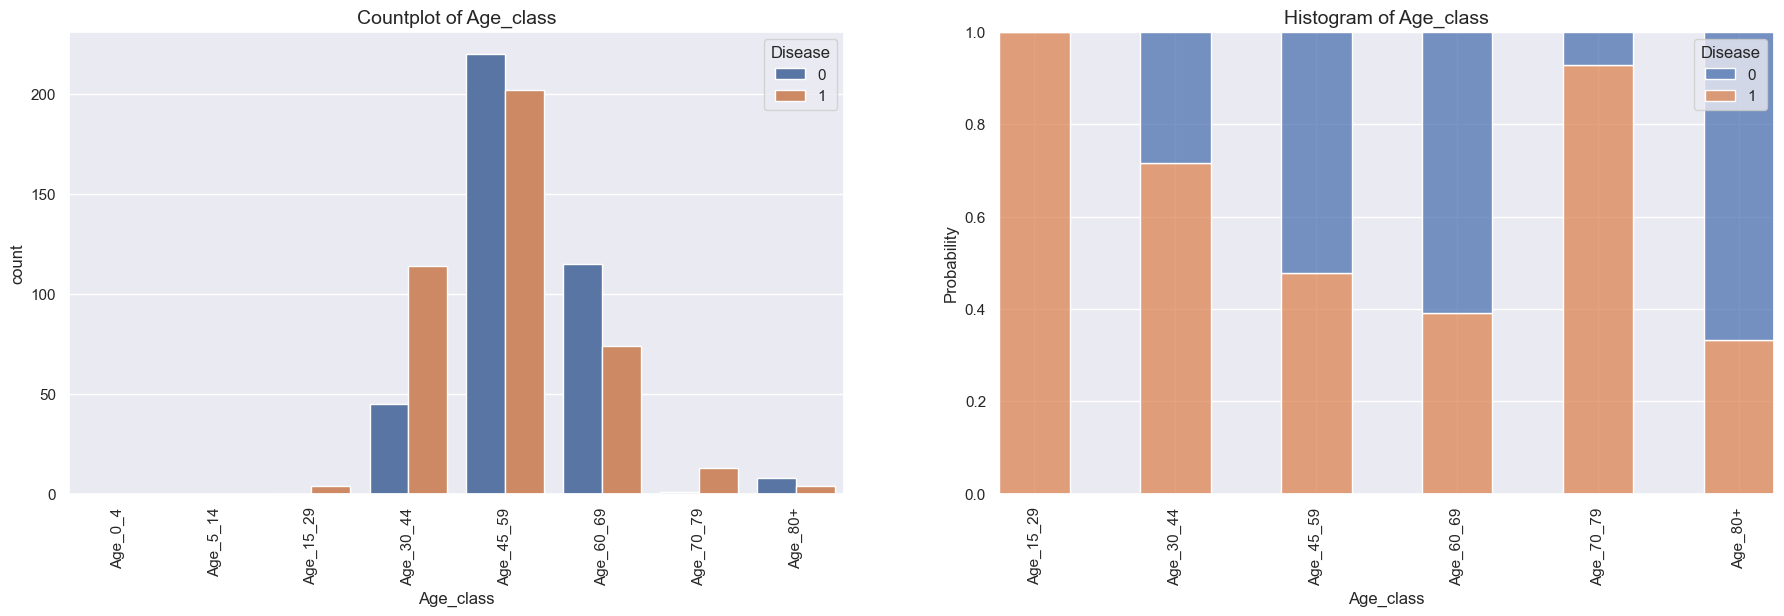

In [689]:
# Plot Age_class with disease
# The histogram shows that patients between 30 and 69 years 
# are the most affected by the disease,
# however our dataset contains more people in these age classes, 
# compared the remaining.

visualize_categorical(train_df_categorical.Age_class, train_df_categorical.Disease)

### Conclusion on new categorical features
As conclusion we can make the following observations:
- Detecting an unbalanced dataset, which is dominated by 564 male patients compared to 236 female patients. Among the patients, percentagewise more women are affected by the disease.
- Our assumption is confirmed that the disease affects young people. In the percentage representation, however, one can see that almost as many 70-79 year olds are affected by the disease. Thus, a large distribution of old and young people are affected.

#### Combining categorical and numerical dataset

In [690]:
# Combining the numerical and categorical dataset after feature engineering for further 
# processing.

train_df_preprocess = train_df_numerical.merge(train_df_categorical.drop("Disease", axis=1), 
                                                how="right", 
                                                left_index=True, 
                                                right_index=True).copy()

In [691]:
# Change the dtype of column Gender and Disease to category.

train_df_preprocess = train_df_preprocess.astype({"Gender":'category'})

In [692]:
# Saving categorical and numerical feature names for later preprocessing.

categorical_features = list(train_df_preprocess.select_dtypes(exclude=np.number).columns)

numerical_features = list(train_df_preprocess.select_dtypes(include=np.number).columns)

# Drop Disease, because target variable.
numerical_features.remove("Disease")sk

<a class="anchor" id="Handlingoutliers">

## 5.3. Handling outliers

</a>

In [693]:
# By trimming the outliers we will remove 74 rows, which results in 9.25% of the data.
# This is not desirable, because other features may contain useful information for training
# our future model.
# Therefore we will not use outlier trimming.

train_df_trimmed_outliers = outlier_trimming(train_df_preprocess.copy(), numerical_features)

Removed 74 rows, which equals 9.25 % of the original dataset.


In [694]:
# Capping the outliers, by replacing outlier values with the maximum or minimum threshold value.
# The goal is achieving accuracy and robustness.

outlier_features = ["Age", "Mental_Health", "Physical_Health", "High_Cholesterol", "Blood_Pressure", "Height"]

train_df_capped_outliers = outlier_capping(train_df_preprocess.copy(), outlier_features)

## Conclusion

Until this point all necessary Pre-Processing steps are done. 

The scaling of the numerical features of the dataset will be done in the part Model Selection, where following scalers will be used:
- Standardscaler
- MinMaxScaler (Feature range = (0,1))
- MinMaxScaler (Feature range = (-1,1))
- Robustscaler

 The categorical features will be encoded with One-Hot-Encoding before the Train-Test-Split. One-Hot-Encoding is used, because we want to keep the uniqueness of each feature.

<a class="anchor" id="FeatureSelection">

# 6. Feature Selection

</a>

Because our dataframe includes both numerical and categorical data, following methods of Feature Seleciton are used:

**Filter Methods:**
- Categorical data:
  - Chi-Square 
  - Mutual Information 
- Numerical data:
  - Pearson Correlation
  - ANOVA 
  - Point Biseral Correlation

**Wrapper Methods for numerical features:**
- RFE with Logistic Regression

**Embedded Methods for numerical features:**
- Lasso Method
- Ridge Method

**Random Forest for numerical features:**
- Gini Importance
- Entropy Importance

In [695]:
# Splitting the dataset in train features and target variable.

target = train_df_capped_outliers["Disease"]
train_df_capped_outliers = train_df_capped_outliers.drop("Disease", axis = 1)

In [696]:
# To avoid data leakage a train test split of the pre-processed dataset is created,
# to execute the Feature Selection methods only on the train data.

feature_selection_data = train_df_capped_outliers.copy()

X_train_fs, X_val_fs, y_train_fs, y_val_fs = train_test_split(feature_selection_data, 
                                                            target, 
                                                            test_size = 0.1, 
                                                            random_state = 42,
                                                            stratify = target)

In [697]:
# Returns for each of the below scaler a scaled X_train_fs dataset:
# Standard Scaler
# MinMax Scaler with feature range (0,1)
# MinMax Scaler with feature range (-1,1)
# Robust Scaler
# Saves the datasets in new variables.

X_train_scaled_dict = return_scaled_datasets(X_train_fs, numerical_features)

X_train_scale_standard = X_train_scaled_dict["standard"][0]

X_train_scale_minmax = X_train_scaled_dict["minmax"][0]

X_train_scale_minmax_minus = X_train_scaled_dict["minmaxminus"][0]

X_train_scale_robust = X_train_scaled_dict["robust"][0]

<a class="anchor" id="FilterMethods">

## 6.1. Filter Methods

</a>

<a class="anchor" id="PearsonCorrelation">

### 6.1.1 Pearson Correlation

</a>

The Pearson correlation coefficient is a useful measure for determining the strength and direction of the relationship between two continuous variables. By calculating the Pearson correlation coefficient for each pair of features, we can identify the features that are most strongly correlated with each other and potentially improve the performance of our model. A positive Pearson correlation coefficient indicates a positive relationship between the two variables, while a negative Pearson correlation coefficient indicates a negative relationship. A value of 0 indicates no relationship between the variables. When two features have a high Pearson correlation (mostly over 0,80) it is possible to remove one of the features, bacause keeping both would not bring any additional information to the model.

In [698]:
# Create a correlation matrix to see the correlations between the features
# BMI + Weight have a high correlation, which is normal, 
# since BMI derives from weight.
# We are going to remove Weight, since Weight have higher 
# correlations with the other variables, than BMI.

X_train_fs[numerical_features].corr()

Height    Weight  High_Cholesterol  Blood_Pressure  \
Height            1.000000  0.505997         -0.081537       -0.003031   
Weight            0.505997  1.000000         -0.030118       -0.086352   
High_Cholesterol -0.081537 -0.030118          1.000000        0.123495   
Blood_Pressure   -0.003031 -0.086352          0.123495        1.000000   
Mental_Health    -0.046281  0.287796          0.012614       -0.035561   
Physical_Health   0.060351 -0.396161          0.042506        0.167784   
Age              -0.087307 -0.188349          0.209584        0.242807   
BMI              -0.027377  0.844353          0.028261       -0.103675   

                  Mental_Health  Physical_Health       Age       BMI  
Height                -0.046281         0.060351 -0.087307 -0.027377  
Weight                 0.287796        -0.396161 -0.188349  0.844353  
High_Cholesterol       0.012614         0.042506  0.209584  0.028261  
Blood_Pressure        -0.035561         0.167784  0.242807 -0.103675  
Mental_Health          1.000000        -0.326593 -0.366492  0.359244  
Physical_Health       -0.326593         1.000000  0.202690 -0.495011  
Age                   -0.366492         0.202690  1.000000 -0.161418  
BMI                    0.359244        -0.495011 -0.161418  1.000000

In [699]:
# Remove weight from the list of numerical features.

numerical_features_2 = ['Height','High_Cholesterol','Blood_Pressure','Mental_Health','Physical_Health','Age','BMI']

#### Conclusion:

We can a see a strong correlation between the features Weight and BMI(+/-0,80 treshold). We are going to remove Weight, since Weight have higher correlations with the other variables, than BMI.

<a class="anchor" id="ANOVAMethod">

### 6.1.2 ANOVA Method

</a>


To do a ANOVA Test the data needs to follow these assumptions:

- One variable is numerical and one is categorical,
- The population from which samples are drawn should be normally distributed.
- Independence of cases: the sample cases should be independent of each other.
- Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal.


In the ANOVA feature selection the p-value is a useful measure for determining the statistical significance of the relationship between each feature and the target variable. By selecting only the features with a low p-value, we can identify the features that have the greatest impact on the response variable and improve the performance of your model.

Due to the fact, that we dont know what scaler is the best, we perform the selection with all 4 and hopefully get some insights

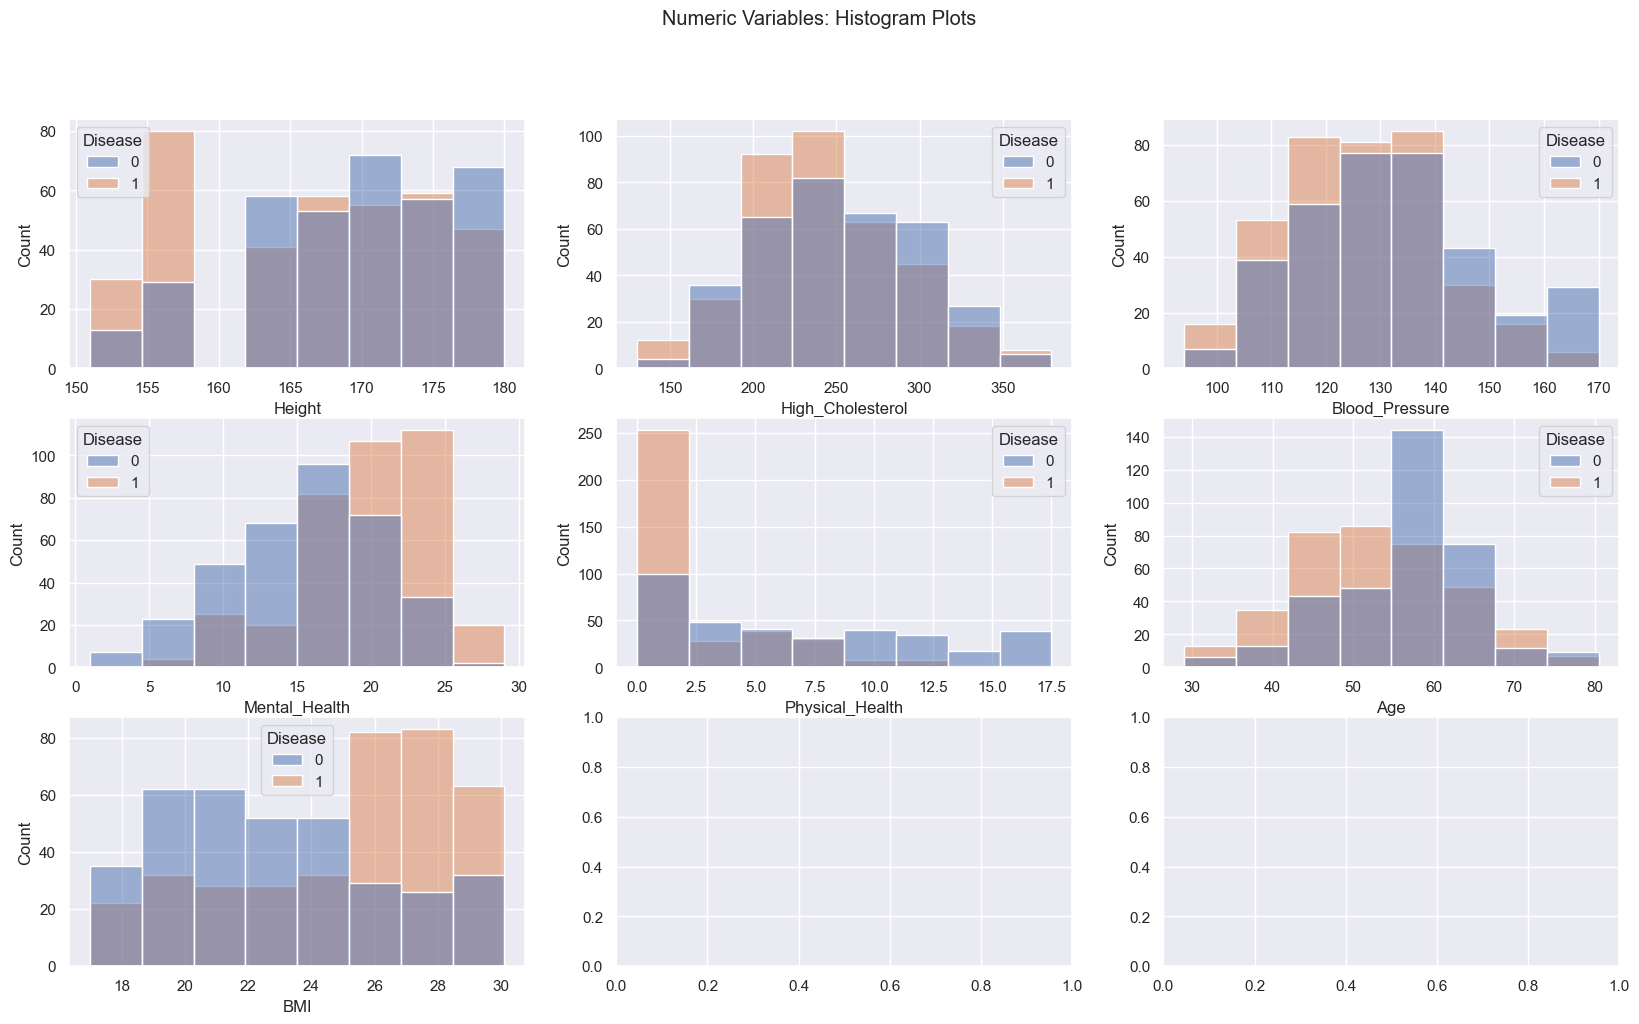

In [700]:
# Create individual axes where each box plot will be placed. 
# The boxplots will show the distribution of the different 
# numerical features.
sns.set()

# Create a figure with 3 rows and the appropriate number of columns
# to fit all numerical features.
fig, axes = plt.subplots(3, ceil(len(numerical_features_2) / 3), figsize=(20, 11))

# Iterate over axes and features and pair each feature with its corresponding axes.
for ax, feature in zip(axes.flatten(), numerical_features_2):

     # Plot a histogram of the feature on the corresponding axes.
    sns.histplot(x=X_train_fs[feature], ax=ax, hue=y_train_fs, bins=8)

# Set the title of the plot.
plt.suptitle("Numeric Variables: Histogram Plots")

plt.show()

Taking into account the ANOVA assumptions, looking at the graph above we can do the Anova test for:  
- High Cholesterol
- Blood Pressure
- Mental Health
- Age

In [701]:
# Initialize a list with the selected features.
ANOVA_features = ['High_Cholesterol', 'Blood_Pressure', 'Mental_Health','Age']

In [702]:
# ANOVA method with Standardscaler.

# Initialize the X_train dataset scaled with StandardScaler and the
# ANOVA features.
X = X_train_scale_standard[ANOVA_features]

# Compute the ANOVA F-value for the dataset and target feature.
# Returns the f-statistic and associated p-values.
f_value, p_value_standard = f_classif(X, y_train_fs)

# Saves the feature names in a list. Features are chosen
# if the associated p-value is below the 5% threshold.
anova_features_standard = X.columns[p_value_standard < 0.05].tolist()

# Print how many features were deleted and print remainig features.
print('Deleted features:', len(X.columns)-len(anova_features_standard))
print(p_value_standard)

Deleted features: 0
[1.30523866e-02 1.24265870e-05 1.18436638e-29 6.74601753e-09]


In [703]:
# Initialize the X_train dataset scaled with MinMaxScaler and the
# ANOVA features.
X = X_train_scale_minmax[ANOVA_features]

# Compute the ANOVA F-value for the dataset and target feature.
# Returns the f-statistic and associated p-values.
f_value, p_value_minmax = f_classif(X, y_train_fs)

# Saves the feature names in a list. Features are chosen
# if the associated p-value is below the 5% threshold.
anova_features_minmax = X.columns[p_value_minmax < 0.05].tolist()

# Print how many features were deleted and print remainig features.
print('Deleted features:', len(X.columns)-len(anova_features_minmax))
print(p_value_minmax)

Deleted features: 0
[1.30523866e-02 1.24265870e-05 1.18436638e-29 6.74601753e-09]


In [704]:
# Initialize the X_train dataset scaled with MinMaxScaler, feature
# range (-1,1) and the ANOVA features.
X = X_train_scale_minmax_minus[ANOVA_features]

# Compute the ANOVA F-value for the dataset and target feature.
# Returns the f-statistic and associated p-values.
f_value, p_value_minmax_minus = f_classif(X, y_train_fs)

# Saves the feature names in a list. Features are chosen
# if the associated p-value is below the 5% threshold.
anova_features_minmax_minus = X.columns[p_value_minmax_minus < 0.05].tolist()

# Print how many features were deleted and print remainig features.
print('Deleted features:', len(X.columns)-len(anova_features_minmax_minus))
print(p_value_minmax_minus)

Deleted features: 0
[1.30523866e-02 1.24265870e-05 1.18436638e-29 6.74601753e-09]


In [705]:
# Initialize the X_train dataset scaled with RobustScaler and 
# the ANOVA features.
X = X_train_scale_robust[ANOVA_features]

# Compute the ANOVA F-value for the dataset and target feature.
# Returns the f-statistic and associated p-values.
f_value, p_value_robust = f_classif(X, y_train_fs)

# Saves the feature names in a list. Features are chosen
# if the associated p-value is below the 5% threshold.
anova_features_robust = X.columns[p_value_robust < 0.05].tolist()

# Print how many features were deleted and print remainig features.
print('Deleted features:', len(X.columns)-len(anova_features_robust))
print(p_value_robust)

Deleted features: 0
[1.30523866e-02 1.24265870e-05 1.18436638e-29 6.74601753e-09]


#### Conclusion: 
The scaler did not have influence on the features selected.
The features selected with an chosen p-value of 0.05 are Age, High_Cholesterol, Blood_Pressure and Mental_Health and are therefore labeled as 'Strong'.


<hr>

**ANOVA Features**

| Variables | Anova |
| --- | --- |
|Age|Strong|
|Height|-|
|Weight|-|
|High_Cholesterol|Strong|
|Blood_Pressure|Strong|
|Mental_Health|Strong|
|Physical_Health|-|
|BMI|-|

<a class="anchor" id="PointBiserialCorr">

### 6.1.3 Point Biserial Correlation

</a>


To do a Point Biserial Correlation (PBc) the data needs to follow these assumptions:
- The target variable must be binary.
- The independent variable must be continuous and normally distributed within each group defined by the binary variable.
- There cant be outliers in the data that could potentially have a large impact on the results of the analysis.

Taking into account PBc assumptions, looking at the graphs plotted in ANOVA section the PBc can be down for: 
- High Cholesterol
- Blood Pressure
- Mental Health
- Age

The point biserial correlation coefficient is a useful measure for determining the strength of the relationship between a continuous feature and a binary target variable. By calculating the point biserial correlation coefficient for each feature, we can identify the features that have the strongest relationship with the target variable and potentially improve the performance of our model. A positive point biserial correlation coefficient indicates a positive relationship between the feature and the target, while a negative point biserial correlation coefficient indicates a negative relationship. A value of 0 indicates no relationship between the feature and the target. By selecting only the features with a strong (either positive or negative) point biserial correlation coefficient, we can identify the features that have the greatest impact on the response variable and improve the performance of our model.

In [706]:
# Initialize a list with the selected features.

PBc_features = ['High_Cholesterol', 'Blood_Pressure', 'Mental_Health','Age']

In [707]:
# To perform PBc it is indiferent if the data is scaled or not so the 
# standard scaled datase is used.

# Iterate every feature in a for loop.
for feature in PBc_features:

    # Calculates the correlation between Disease and the feature.
    corr, _ = stats.pointbiserialr(y_train_fs, X_train_scale_minmax[feature].astype(float))

    # Prints the correlation.
    print(f'The correlation of Disease and {feature} is : {round(corr,4)}')

The correlation of Disease and High_Cholesterol is : -0.0925
The correlation of Disease and Blood_Pressure is : -0.1621
The correlation of Disease and Mental_Health is : 0.4041
The correlation of Disease and Age is : -0.2139


#### Conclusion:

Mental_Health is the variable that is most related with Disease, so we labeled it as 'Strong' feature. 

Age is considered Weak. The features High_Cholesterol and Blood_Pressure have a significally lower correlation, so we labeled them as 'discard' features.

<hr>

**Point Biserial Correlation Features:**

| Variables | Point Biserial Correlation |
| --- | --- |
|Age|Weak|
|Weight|-|
|Height|-|
|High_Cholesterol|Discard|
|Blood_Pressure|Discard|
|Mental_Health|Strong|
|Physical_Health|-|
|BMI|-|

<a class="anchor" id="Chi-Square">

### 6.1.4. Chi-Square

</a>

To do a Chi-Square test the data needs to follow these assumptions:

- Target and independet variables are categorical
- The categories must be mutually exclusive and exhaustive, meaning that each subject must belong to exactly one category and that the categories must cover all possible values of the variable.
- The sample size must be sufficiently large. For most applications, a sample size of at least 30 is recommended.

The chi-square test is a statistical test commonly used in feature selection for categorical data. It is used to determine the statistical significance of the relationship between each feature and the target variable. The chi-square test calculates the difference between the observed frequency of a feature and the expected frequency of that feature, based on the distribution of the target variable. If the difference between the observed and expected frequency is statistically significant, then the feature is considered to be important for predicting the target variable. By selecting only the features with a low p-value, we can identify the features that have the greatest impact on the response variable and improve the performance of our model.

In [708]:
# The higher the Chi-Square value the feature is more dependent on the response and
# it can be selected for model training.

# Loops every feature of the categorical feature list.
for feature in categorical_features:

    # Performs a Chi-Square test for each categorical feature
    # and prints the result.
    chi_square_test(X_train_fs[feature], y_train_fs, feature)

Drinking_Habit is a good predictor
Exercise is a good predictor
Fruit_Habit is a good predictor
Checkup is a good predictor
Diabetes is a good predictor
Gender is a good predictor
Age_class is a good predictor


#### Conclusion:
The features selected with an chosen p-value of 0.05 are Drinking_Habit, Exercise, Fruit_Habit, Checkup, Diabetes, Gender and Age_Class are therefore labeled as 'Strong'. 

The features Region, Education, Smoking_Habit and Water_Habit can be discarded.



<hr>

**Chi-Square Features**

| Variables | Chi-Square |
| --- | --- |
|Region|Discard|
|Education|Discard|
|Smoking_Habit|Discard|
|Drinking_Habit|Strong|
|Exercise|Strong|
|Fruit_Habit|Strong|
|Water_Habit|Discard|
|Checkup|Strong|
|Diabetes|Strong|
|Gender|Strong|
|Age_class|Strong|

<a class="anchor" id="MutualInformation">

### 6.1.5. Mutual Information

</a>

To do a Mutual Information test the data needs to follow these assumptions:
- The variables should be independent.
- Target and independent variable have to be categorical
- The sample size should be sufficiently large, a sample size of at least 30 is recommended for most applications.

In mutual information feature selection, the mutual information between a feature and the target variable is used to measure the statistical dependence between the two. Mutual information is a measure of the amount of information that one variable contains about another. If two variables are independent, the mutual information between them will be zero. If there is a strong statistical dependence between the two variables, the mutual information will be high. By selecting only the features with a high mutual information, we can identify the features that have the greatest impact on the response variable and improve the performance of our model.

In [709]:
# Saves dataset only with categorical features.
cat = X_train_fs[categorical_features]

# Creates new MultiColumnLabelEncoder() object and fit and transform the cat dataset. 
X_train_fs_enc = MultiColumnLabelEncoder(columns = cat.columns).fit_transform(cat)

X_train_fs_enc.head()

Region  Education  Smoking_Habit  Drinking_Habit  Exercise  \
PatientID                                                               
1810            4          1              0               0         1   
1394            2          4              1               0         1   
1267            2          4              0               2         0   
1818            2          4              0               0         0   
1517            2          4              0               2         0   

           Fruit_Habit  Water_Habit  Checkup  Diabetes  Gender  Age_class  
PatientID                                                                  
1810                 3            2        3         3       1          1  
1394                 2            0        3         3       1          3  
1267                 3            0        2         3       1          3  
1818                 1            2        2         1       1          1  
1517                 0            2        2         0       0          1

In [710]:
# Performs SelectKBest with mutual_info_classif as the score function.
mic = SelectKBest(score_func = mutual_info_classif)

# Fits the object to the training data, using the selected features as predictors
# and the target variable as the response.
mic.fit(X_train_fs_enc[categorical_features],y_train_fs)

# Creates a pandas Series object containing the scores for each feature,
# with the feature names as the index.
feature_MI_score = pd.Series(mic.scores_,index=X_train_fs_enc[categorical_features].columns)

# Sorts the Series in descending order.
feature_MI_score.sort_values(ascending=False)

Diabetes          0.143511
Fruit_Habit       0.143322
Checkup           0.107933
Exercise          0.095466
Gender            0.038698
Age_class         0.014041
Region            0.010160
Drinking_Habit    0.007653
Education         0.000000
Smoking_Habit     0.000000
Water_Habit       0.000000
dtype: float64

#### Conclusion: 

Due to the low dependence of these features to the target variabble we can remove the feature Education, Drinking Habit, Water_Habit, Region, Smoking_Habit from the dataframe. 

We labeled the 4 variables, Diabetes,Checkup,Fruit_Habit and Exercise with the strongest dependence to the target as 'Strong'.

The Features Drinking_Habit, Exercise, Gender and Age_Class were only labeled as 'Weak', due to the big gap in dependence between them and the strongest
features.

<hr>

**Mutual Information Features**

| Variables | Mutual Information |
| --- | --- |
|Region|Discard|
|Education|Discard|
|Smoking_Habit|Discard|
|Drinking_Habit|Discard|
|Exercise|Weak|
|Fruit_Habit|Strong|
|Water_Habit|Discard|
|Checkup|Strong|
|Diabetes|Strong|
|Gender|Discard|
|Age_class|Discard|

### Conclusion for Filter Methods

Numerical Features:

| Variables | Anova |Point Biserial Correlation|
| --- | --- | ---|
|Age|Strong|Weak|
|Weight|-|-|
|Height|-|-|
|High_Cholesterol|Strong|Discard|
|Blood_Pressure|Strong|Discard|
|Mental_Health|Strong|Strong|
|Physical_Health|-|-|
|BMI|-|-|

Categorical Features:

| Variables | Chi-Square |Mutual Information|
| --- | --- | ---|
|Region|Discard|Discard|
|Education|Discard|Discard|
|Smoking_Habit|Discard|Discard|
|Drinking_Habit|Strong|Discard|
|Exercise|Strong|Weak|
|Fruit_Habit|Strong|Strong|
|Water_Habit|Discard|Discard|
|Checkup|Strong|Strong|
|Diabetes|Strong|Strong|
|Gender|Strong|Discard|
|Age_class|Strong|Discard|

<a class="anchor" id="WrapperMethods">

## 6.2. Wrapper Methods

</a>

<a class="anchor" id="RecursiveFeatureElimination">

### 6.2.1 Recursive Feature Elimination

</a>


To do a Recursive Feature Elimination with Logistic Regression the data needs to follow these assumptions:
- The target variable should be binary.
- The independent variables should be numerical.
- The sample size must be sufficiently large. For most applications, a sample size of at least 30 is recommended.

In feature selection using recursive feature elimination (RFE) with logistic regression, the goal is to identify the subset of features that are most important for predicting the target variable. RFE works by recursively removing features, building a model using the remaining features, and then ranking the features based on their importance.

Due to the fact, that we dont know what scaler is the best, we perform the selection with all 4 and hopefully get some insights

In [711]:
# Computes with the function rfe_method() the RFE with a Logistic Regression 
# for the dataset scaled with Standard Scaler.

rfe_features_standard = rfe_method(X_train_scale_standard, y_train_fs, numerical_features_2)
rfe_features_standard

['Height', 'Mental_Health', 'Physical_Health']

In [712]:
# Computes with the function rfe_method() the RFE with a Logistic Regression 
# for the dataset scaled with MinMax Scaler

rfe_features_minmax = rfe_method(X_train_scale_minmax, y_train_fs, numerical_features_2)
rfe_features_minmax

['Height', 'Mental_Health', 'Physical_Health']

In [713]:
# Computes with the function rfe_method() the RFE with a Logistic Regression 
# for the dataset scaled with MinMax Feature range (-1,1) Scaler.

rfe_features_minmax_minus = rfe_method(X_train_scale_minmax_minus, y_train_fs, numerical_features_2)
rfe_features_minmax_minus

['Height', 'Mental_Health', 'Physical_Health']

In [714]:
# Computes with the function rfe_method() the RFE with a Logistic Regression 
# for the dataset scaled with Robust Scaler.

rfe_features_robust = rfe_method(X_train_scale_robust, y_train_fs, numerical_features_2)
rfe_features_robust

['Height', 'Mental_Health', 'Physical_Health']

In [715]:
# Combining the RFE features in a list.
rfe_combined_list = rfe_features_robust + rfe_features_minmax + rfe_features_standard + rfe_features_minmax_minus

# Initialize a dictionary to store unique string elements and their counts.
str_counts_rfe = store_strings(rfe_combined_list)

str_counts_rfe

{'Height': 4, 'Mental_Health': 4, 'Physical_Health': 4}

### Conclusion for Wrapper Method

The RFE method in combination with the different scalers selects different features as important.
Only features, which were selected by all four combinations are Mental and Physical Health. Consequently, they seem to be most relevant. Furthermore Height an High_Cholesterol seem to be of relevance aswell, being picked by 3 out of the 4 scalers, we still labeled these features as 'Strong'.

BMI and Weight, being picked with only one scaler were labeled as 'Weak'. 

Age and Blood_pressure did not appear in either scaler and could be discarded.

<hr>

| Variables | RFE |
| --- | --- |
|Age|Discard|
|Weight|-|
|Height|Strong|
|High_Cholesterol|Discard|
|Blood_Pressure|Discard|
|Mental_Health|Strong|
|Physical_Health|Strong|
|BMI|Discard|

<a class="anchor" id="EmbeddedMethods">

## 6.3. Embedded Methods

</a>

<a class="anchor" id="LassoMethod">

### 6.3.1. Lasso Method

</a>

To do a Lasso Feature Selection the data needs to follow these assumptions:
- The Lasso method can be used for both continuous and binary dependent variables.
- The independent variables should be numerical
- The categories must be mutually exclusive and exhaustive, meaning that each subject must belong to exactly one category and that the categories must cover all possible values of the variable.
- The sample size must be sufficiently large. For most applications, a sample size of at least 30 is recommended.

In the Lasso feature selection method, the Lasso coefficient is a useful measure for determining the importance of each feature in predicting the target variable. The Lasso coefficient is the amount by which a feature contributes to the prediction of the target variable, with larger coefficients indicating a greater contribution. By selecting only the features with a non-zero Lasso coefficient, we can identify the features that have the greatest impact on the response variable and improve the performance of the model.

Due to the fact, that we dont know what scaler is the best, we perform the selection with all 4 and hopefully get some insights

In [716]:
# Calculates the feature importances for the standard scaled dataset.

Lasso_scaler_importance_standard = scaler_importance(X_train_scale_standard[numerical_features_2], y_train_fs, LassoCV())
Lasso_scaler_importance_standard

Physical_Health    -0.148279
Height             -0.074423
Blood_Pressure     -0.040081
High_Cholesterol   -0.039425
Age                -0.010295
BMI                 0.022052
Mental_Health       0.135670
dtype: float64

In [717]:
# Calculates the feature importances for the minmax scaled dataset.

Lasso_scaler_importance_minmax = scaler_importance(X_train_scale_minmax[numerical_features_2], y_train_fs, LassoCV())
Lasso_scaler_importance_minmax

Physical_Health    -0.506999
Height             -0.271943
High_Cholesterol   -0.206005
Blood_Pressure     -0.188054
Age                -0.054488
BMI                 0.080116
Mental_Health       0.717402
dtype: float64

In [718]:
# Calculates the feature importances for the minmax feature range (-1,1) scaled dataset.

Lasso_scaler_importance_minmax_minus = scaler_importance(X_train_scale_minmax_minus[numerical_features_2], y_train_fs, LassoCV())
Lasso_scaler_importance_minmax_minus

Physical_Health    -0.253500
Height             -0.135971
High_Cholesterol   -0.103002
Blood_Pressure     -0.094027
Age                -0.027244
BMI                 0.040058
Mental_Health       0.358701
dtype: float64

In [719]:
# Calculates the feature importances for the robust scaled dataset.

Lasso_scaler_importance_robust = scaler_importance(X_train_scale_robust[numerical_features_2], y_train_fs, LassoCV())
Lasso_scaler_importance_robust

Physical_Health    -0.202566
Height             -0.102746
High_Cholesterol   -0.055481
Blood_Pressure     -0.049809
Age                -0.014097
BMI                 0.037125
Mental_Health       0.205582
dtype: float64

In [720]:
# Sum all results of the Lasso method for each scaled dataset 
# to check which ones had better results.
# Calculating the absolut value of the importances to have positive
# results and in the end be able to sort them.
# This is also done, because it is not important if the coefficient 
# is postive or negative, it is important that is far from 0.

Lasso_scaler_importance_ranking = abs(Lasso_scaler_importance_standard) + \
                                  abs(Lasso_scaler_importance_minmax) + \
                                  abs(Lasso_scaler_importance_minmax_minus) + \
                                  abs(Lasso_scaler_importance_robust)

Lasso_scaler_importance_ranking.sort_values(ascending=False)

Mental_Health       1.417354
Physical_Health     1.111344
Height              0.585083
High_Cholesterol    0.403913
Blood_Pressure      0.371971
BMI                 0.179350
Age                 0.106124
dtype: float64

#### Conlusion

The features with the highest the coefficients and therefore labeled as 'Strong' were Mental_Health, Pysical_Health, Height,High Cholesterol and Blood_pressure.

BMI and Age had a bigger drop in coefficience value and will only be labeled as 'Weak'.

Weight can be discarded due to no coefficience at all.

<hr>

**Lasso Features**

| Variables | Lasso Method |
| --- | --- |
|Age|Discard|
|Weight|-|
|Height|Weak|
|High_Cholesterol|Weak|
|Blood_Pressure|Discard|
|Mental_Health|Strong|
|Physical_Health|Strong|
|BMI|Discard|


<a class="anchor" id="Ridge">

### 6.3.2. Ridge Method

</a> 

To do a Ridge Feature Selection the data needs to follow these assumptions:
- The Ridge method can be used for both continuous and binary dependent variables.
- The independent variables should be numerical
- The categories must be mutually exclusive and exhaustive, meaning that each subject must belong to exactly one category and that the categories must cover all possible values of the variable.
- The sample size must be sufficiently large. For most applications, a sample size of at least 30 is recommended.



In the Ridge feature selection method, the Ridge coefficient is a useful measure for determining the importance of each feature in predicting the target variable. The Ridge coefficient is the amount by which a feature contributes to the prediction of the target variable, with larger coefficients indicating a greater contribution. Contrary to the Lasso Method, the Ridge method is not giving any feature a coefficient of zero. Therefore this has to kept in mind when analysing the coefficients for feature removal.

Due to the fact, that we dont know what scaler is the best, we perform the selection with all 4 and hopefully get some insights

In [721]:
# Calculates the feature importances for the standard scaled dataset.

Ridge_scaler_importance_standard=scaler_importance(X_train_scale_standard[numerical_features_2], y_train_fs, Ridge())
Ridge_scaler_importance_standard

Physical_Health    -0.148543
Height             -0.076229
Blood_Pressure     -0.041235
High_Cholesterol   -0.041016
Age                -0.011119
BMI                 0.023165
Mental_Health       0.136376
dtype: float64

In [722]:
# Calculates the feature importances for the minmax scaled dataset.

Ridge_scaler_importance_minmax=scaler_importance(X_train_scale_minmax[numerical_features_2], y_train_fs, Ridge())
Ridge_scaler_importance_minmax

Physical_Health    -0.501494
Height             -0.273663
High_Cholesterol   -0.205582
Blood_Pressure     -0.187583
Age                -0.071460
BMI                 0.090425
Mental_Health       0.691814
dtype: float64

In [723]:
# Calculates the feature importances for the minmax feature 
# range (-1,1) scaled dataset.

Ridge_scaler_importance_minmax_minus=scaler_importance(X_train_scale_minmax_minus[numerical_features_2], y_train_fs, Ridge())
Ridge_scaler_importance_minmax_minus

Physical_Health    -0.252797
Height             -0.138218
High_Cholesterol   -0.106358
Blood_Pressure     -0.096052
Age                -0.031232
BMI                 0.042177
Mental_Health       0.358000
dtype: float64

In [724]:
# Calculates the feature importances for the robust scaled dataset.

Ridge_scaler_importance_robust=scaler_importance(X_train_scale_robust[numerical_features_2], y_train_fs, Ridge())
Ridge_scaler_importance_robust

Physical_Health    -0.202301
Height             -0.104986
High_Cholesterol   -0.057623
Blood_Pressure     -0.050893
Age                -0.015214
BMI                 0.040070
Mental_Health       0.206310
dtype: float64

In [725]:
# Sum all results of the Lasso method for each scaled dataset 
# to check which ones had better results.
# Calculating the absolut value of the importances to have positive results.

Ridge_scaler_importance_ranking = abs(Ridge_scaler_importance_standard)+abs(Ridge_scaler_importance_minmax)+abs(Ridge_scaler_importance_minmax_minus)+abs(Ridge_scaler_importance_robust)
Ridge_scaler_importance_ranking.sort_values(ascending=False)

Mental_Health       1.392499
Physical_Health     1.105135
Height              0.593096
High_Cholesterol    0.410579
Blood_Pressure      0.375763
BMI                 0.195836
Age                 0.129024
dtype: float64

#### Conclusion:

The scaler doesnt seems to make a huge difference in the features that get selected.

The features with the highest the coefficients and therefore labeled as 'Strong' were Mental_Health, Pysical_Health, BMI and Weight.

Height, High_Cholesterol and Blood_pressure had a bigger drop in coefficience-value and will only be labeled as 'Weak'.

Age can be discarded due to the lowest coefficience.

<hr>

**Ridge Features** 

| Variables | Ridge Method |
| --- | --- |
|Age|Discard|
|Weight|-|
|Height|Weak|
|High_Cholesterol|Weak|
|Blood_Pressure|Discard|
|Mental_Health|Strong|
|Physical_Health|Strong|
|BMI|Discard|

<a class="anchor" id="RandomForest">

### 6.3.3. Random Forest

</a> 

To do a Random Forest Feature Selection the data needs to follow these assumptions:
- The features should be independent of each other. This means that there should be no strong correlations between the features
- There should be no missing or incorrect values in the data.
- The data should be balanced, meaning that there should be roughly equal numbers of observations for each class in the target variable. 

In the random forest feature selection method, the feature importance score is a useful measure for determining the importance of each feature in predicting the target variable. The feature importance score is calculated based on how much the feature contributes to the overall accuracy of the model. Features with a higher importance score are more relevant to the prediction of the target variable and are considered more important in the model. By selecting only the features with a high importance score, we can identify the features that have the greatest impact on the response variable and improve the performance of the model.There are two metrics for the measures of feature importance. Gini impurity and entropy/information gain. Gini importance measures of the impurity of a feature and Entropy importance measures the information gain provided by a feature.

In [726]:
# Creates a model using the RandomForestClassifier with the criterion gini.
model = RandomForestClassifier(criterion="gini", random_state=42)

# Fits the data without the feature weight to the classifier.
model.fit(X_train_fs[numerical_features].drop(columns="Weight",axis=1),y_train_fs)

# Gets a pandas series for the feature importances.
forest_importances = pd.Series(model.feature_importances_, index=X_train_fs[numerical_features].drop(columns="Weight",axis=1).columns)

# Sorts the importances in descending order.
forest_importances = forest_importances.sort_values(ascending=False)

# Prints the sorted importances.
print(forest_importances)

Physical_Health     0.184299
Mental_Health       0.164243
BMI                 0.152449
High_Cholesterol    0.145115
Age                 0.141683
Blood_Pressure      0.125395
Height              0.086815
dtype: float64


In [727]:
# Selects the best gini features of the Random Forest using SelectFromModel.
# The average importance of the features will be taken as the threshold 
# to cross when the estimator decides which features are more important compared to the others.
model = SelectFromModel(RandomForestClassifier(criterion="gini", random_state=42))

# Fits the RandomForestClassifier on the train data.
model.fit(X_train_fs[numerical_features].drop(columns="Weight",axis=1),y_train_fs)

# Gets the list of features that were selected by the model with the get_support, 
# that classifies the columns(features) as a True or False.
# If the treshold is achieved the True values are picked.
rf_gini_features = X_train_fs[numerical_features].drop(columns="Weight",axis=1).columns[(model.get_support())].tolist()

rf_gini_features

['High_Cholesterol', 'Mental_Health', 'Physical_Health', 'BMI']

In [728]:
# Creates a model using the RandomForestClassifier with the criterion entropy.
model = RandomForestClassifier(criterion="entropy", random_state=42)

# Fits the data without the feature weight to the classifier.
model.fit(X_train_fs[numerical_features].drop(columns="Weight",axis=1),y_train_fs)

# Gets a pandas series for the feature importances.
forest_importances = pd.Series(model.feature_importances_, index=X_train_fs[numerical_features].drop(columns="Weight",axis=1).columns)

# Sorts the importances in descending order.
forest_importances = forest_importances.sort_values(ascending=False)

# Prints the sorted importances.
print(forest_importances)

Mental_Health       0.170632
Physical_Health     0.169191
High_Cholesterol    0.157412
Age                 0.142889
BMI                 0.142724
Blood_Pressure      0.126924
Height              0.090228
dtype: float64


In [729]:
# Select the best entropy features of the random forest using SelectFromModel.
# The average importance of the features will be taken as the threshold 
# to cross when the estimator decides which features are more important compared to the others.
model = SelectFromModel(RandomForestClassifier(criterion="entropy", random_state=42))

# Fit the RandomForestClassifier on the train data.
model.fit(X_train_fs[numerical_features].drop(columns="Weight",axis=1),y_train_fs)

# Gets the list of features that were selected by the model with the get_support, 
# that classifies the columns(features) as a True or False.
# If the treshold is achieved the True values are picked.
rf_entropy_features = X_train_fs[numerical_features].drop(columns="Weight",axis=1).columns[(model.get_support())].tolist()

rf_entropy_features

['High_Cholesterol', 'Mental_Health', 'Physical_Health', 'Age']

In [730]:
# Saves all features in one list.
rf_combined_list = rf_entropy_features + rf_gini_features

# Initialize a dictionary to store unique string elements and their counts.
str_counts_rf = store_strings(rf_combined_list)

print(str_counts_rf)

{'High_Cholesterol': 2, 'Mental_Health': 2, 'Physical_Health': 2, 'Age': 1, 'BMI': 1}


#### Conclusion on Random Forest

The features reaching the treshold of the total mean feature importance score for both importances  High_Cholesterol, Mental_Health, Physical_Health are  labeled as 'Strong'. 

The features Age and BMI are only labeled as 'Weak', due to the fact, that they were only passed the treshold for only one importance metric.

The features that didnt reach the treshold were Height and Blood_Pressure and can be discarded. Weight wasnt considered in the first place, due to its strong correlation to BMI.

<hr>

**Random Forest Features**

| Variables | Random Forest |
| --- | --- |
|Age|Weak|
|Weight|-|
|Height|Discard|
|High_Cholesterol|Strong|
|Blood_Pressure|Discard|
|Mental_Health|Strong|
|Physical_Health|Strong|
|BMI|Weak|

### Conclusion on Embedded Methods

**Embedded Methods (Numerical Features)**

| Variables | Lasso Method | Ridge Method | Random Forest |
| --- | --- | --- | --- |
|Age|Discard|Discard|Weak|
|Weight|-|-|-|
|Height|Weak|Weak|Discard|
|High_Cholesterol|Weak|Weak|Strong|
|Blood_Pressure|Discard|Discard|Discard|
|Mental_Health|Strong|Strong|Strong|
|Physical_Health|Strong|Strong|Strong|
|BMI|Discard|Discard|Weak|

<a class="anchor" id="Summary">

## 6.4. Summary

</a> 

Due to the fact, that there are strong features that clearly are important, but also features where the importance is not as strong, we decided to build to two different feature sets.
One only containing the features that scored the highest importance out of the feature selection models and one that contains the strongest features combined with the slightly weaker ones.

|Variables|Filter|Filter|Filter|Filter|Wrapper|Embedded|Embedded|Embedded|Final|
| --- | --- |---|---|---|---|---|---|--- |--- |
||Chi-Square|Mutual Information|Anova|Point Biserial|RFE|Lasso|Ridge|Random Forest|||
|Categorical Features|
|Region|Discard|Discard|-|-|-|-|-|-|Discard|||
|Education|Discard|Discard|-|-|-|-|-|-|Discard|||||||
|Smoking_Habit|Discard|Discard|-|-|-|-|-|-|Discard||||
|Drinking_Habit|Strong|Discard|-|-|-|-|-|-|Weak||||
|Exercise|Strong|Weak|-|-|-|-|-|-|Weak|||||
|Fruit_Habit|Strong|Strong|-|-|-|-|-|-|Strong||
|Water_Habit|Discard|Discard|-|-|-|-|-|-|Discard||
|Checkup|Strong|Strong|-|-|-|-|-|-|Strong|||
|Diabetes|Strong|Strong|-|-|-|-|-|-|Strong||||
|Gender|Strong|Discard|-|-|-|-|-|-|Weak||||
|Age_class|Strong|Discard|-|-|-|-|-|-|Weak||||
|Numerical Features|||||||||||||
|Age|-|-|Strong|Weak|Discard|Discard|Discard|Weak|Discard|||
|Weight|-|-|-|-|-|-|-|-|-|||
|Height|-|-|-|-|Strong|Weak|Weak|Discard|Discard|||
|High_Cholesterol|-|-|Strong|Discard|Discard|Weak|Weak|Strong|Weak|||
|Blood_Pressure|-|-|Strong|Discard|Discard|Discard|Discard|Discard|Discard|||
|Mental_Health|-|-|Strong|Strong|Strong|Strong|Strong|Strong|Strong|||
|Physical_Health|-|-|-|-|Strong|Strong|Strong|Strong|Strong|||
|BMI|-|-|-|-|Discard|Discard|Discard|Weak|Discard|||

In [731]:
# Strong features are either classified as good predictors, have a high correlation or the highest importance 
# among all scalers. Weak features contain these identified strong features combined with slightly weaker ones.
strong_features = ['Fruit_Habit','Checkup','Diabetes','Mental_Health','Physical_Health']
weak_features = ['Drinking_Habit','Exercise','Gender', 'Age_class', 'High_Cholesterol','Fruit_Habit','Checkup','Diabetes','Mental_Health','Physical_Health']

<a class="anchor" id="ModelSelection">

# 7. Model Selection

</a>

<a class="anchor" id="DataPartition">

## 7.1. Data Partition

</a>

In [732]:
# One-hot-encodes the categorical features of the training data,
# for future model selection and saves the encoder for future transformation
# of test and validation data.

data, encoder = one_hot_encoding(train_df_capped_outliers, categorical_features)

# Split dataset into train(90%) and validation(10%) by using the method train_test_split().
# Shuffle is by default True.
# Implementing stratification to force the distribution of the  
# variable target among the different splits to be the same. 

X_train, X_val, y_train, y_val = train_test_split(data, 
                                                  target, 
                                                  test_size = 0.1, 
                                                  random_state = 42,
                                                  stratify = target)

<a class="anchor" id="PredictiveModelling">

## 7.2. Predictive Modelling

</a>

The data demonstrates that this is a supervised classification problem. In order to make the most accurate predicition, the following steps are executed, for comparing various classification models based on their F1 scores.

1. At first all models are run without scaling the dataset and Feature Selection.
2. Afterwards the best scaler of four different scalers (Standard, Robust, MinMax with feature range (0,1) and MinMax with feature range (-1,1)) is chosen, based on the resulting scores for each model.
3. A selection of 3 non-ensemble and 2 ensemble methods (bagging and boosting category) is picked from all introduced classifiers.
4. To improve the predicition further, the top 3 classifiers are selected based on these results and their hyperparameters will be tuned and learning curves plotted.
5. The ROC curve is used for a final assessment of the top 3 models.
6. The Voting classifier stacking ensemble method is introduced to see if it is possible to further increase the F1 score and to compare them to the 3 best models.
7. The validation dataset is tested against our final model.

Following classifiers from scikit-learn library are introduced in this project:

Models from lectures:
- Logistic Regression
- Gausssian Naive Bayes
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Decision Trees
- Multi-layer Perceptron (Neural Network)
- Bagging Classifier
- Random Forest
- Gradient Boosting
- AdaBoost   

Models not in lecture:
- Histogram Gradient Boost
- Voting Classifier

In [733]:
# Turn off warnings.

import warnings
warnings.filterwarnings("ignore")

<a class="anchor" id="RunmodelswithoutScalerandFeatureSelection">

### 7.2.1. Run models without Scaler and Feature Selection

</a>

First of all, we run our models with the Machine Learning algorithms we selected to solve the underlaying classification problem. In the first attempt we let the models run with default values to make a first selection of algorithms. In the following steps we will further maximize the performance of chosen algorithms by implementing different scalers, Feature Selection and hyperparameter tuning.

In [734]:
# List of classifiers to test with the training data.

n = -1

classifier = [
            # Models from lecture
            LogisticRegression(random_state=42),
            GaussianNB(),
            KNeighborsClassifier(),
            SVC(random_state=42),
            DecisionTreeClassifier(random_state=42),
            MLPClassifier(random_state=42),

            # Ensemble models
            RandomForestClassifier(n_jobs=n, random_state=42),
            BaggingClassifier(n_jobs=n, random_state=42),
            GradientBoostingClassifier(random_state=42),
            AdaBoostClassifier(random_state=42),
            
            # Models not from lecture
            HistGradientBoostingClassifier(random_state=42),
            ]

In [735]:
# Calculates the F1 train and test score for every model.

return_f1_score(X_train, y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
10  HistGradientBoostingClassifier          1.0000         0.9743
6           RandomForestClassifier          1.0000         0.9557
8       GradientBoostingClassifier          0.9900         0.9410
7                BaggingClassifier          0.9978         0.9349
4           DecisionTreeClassifier          1.0000         0.9232
9               AdaBoostClassifier          0.9355         0.8848
5                    MLPClassifier          0.8921         0.8565
0               LogisticRegression          0.8636         0.8544
1                       GaussianNB          0.7974         0.7758
2             KNeighborsClassifier          0.8777         0.7544
3                              SVC          0.7297         0.7203

#### Result

- At this point, we will procede with all models to see the effect of the different scalers.
- Having a look at non-ensemble models, Decision Tree, Neural Networks and Logisitic Regression perform the best.

<a class="anchor" id="RunmodelswithScaler">

### 7.2.2 Run models with Scaler

</a>

In this section the models are performed with the selected scalers we defined beforehand. Scaling the input variables with an appropiate scaler is as essencial as selecting the right machine learning algorithm. Each of the scalers in Scikit-Learn has its own (dis-)advantages and characteristics in terms of outliers.

In [736]:
# Return F1 scores with the Standardscaler.

standard = return_f1_score_scaled(X_train, y_train, classifier, StandardScaler(), numerical_features) 
standard

Classifiers  Train_F1_Score  Test_F1_Score
10  HistGradientBoostingClassifier          1.0000         0.9743
6           RandomForestClassifier          1.0000         0.9566
8       GradientBoostingClassifier          0.9900         0.9410
7                BaggingClassifier          0.9978         0.9344
4           DecisionTreeClassifier          1.0000         0.9238
3                              SVC          0.9456         0.8985
5                    MLPClassifier          0.9981         0.8979
9               AdaBoostClassifier          0.9355         0.8848
0               LogisticRegression          0.8955         0.8778
2             KNeighborsClassifier          0.9409         0.8769
1                       GaussianNB          0.6828         0.6537

In [737]:
# Return F1 scores with the MinmaxScaler.

minmax = return_f1_score_scaled(X_train, y_train, classifier, MinMaxScaler(), numerical_features)
minmax

Classifiers  Train_F1_Score  Test_F1_Score
10  HistGradientBoostingClassifier          1.0000         0.9743
6           RandomForestClassifier          1.0000         0.9557
8       GradientBoostingClassifier          0.9900         0.9410
7                BaggingClassifier          0.9977         0.9344
4           DecisionTreeClassifier          1.0000         0.9233
5                    MLPClassifier          0.9901         0.8931
9               AdaBoostClassifier          0.9355         0.8848
3                              SVC          0.9414         0.8775
2             KNeighborsClassifier          0.9357         0.8702
0               LogisticRegression          0.8839         0.8620
1                       GaussianNB          0.6588         0.6264

In [738]:
# Return F1 scores with the MinMax Scaler with feature range (-1,1).

minmax_minus = return_f1_score_scaled(X_train, y_train, classifier, MinMaxScaler(feature_range=(-1,1)), numerical_features)
minmax_minus

Classifiers  Train_F1_Score  Test_F1_Score
10  HistGradientBoostingClassifier          1.0000         0.9743
6           RandomForestClassifier          1.0000         0.9557
8       GradientBoostingClassifier          0.9900         0.9410
7                BaggingClassifier          0.9978         0.9354
4           DecisionTreeClassifier          1.0000         0.9232
5                    MLPClassifier          0.9959         0.9005
3                              SVC          0.9461         0.8915
9               AdaBoostClassifier          0.9355         0.8848
0               LogisticRegression          0.8915         0.8725
2             KNeighborsClassifier          0.9399         0.8723
1                       GaussianNB          0.6648         0.6345

In [739]:
# Return F1 scores with the Robustscaler.

robust = return_f1_score_scaled(X_train, y_train, classifier, RobustScaler(), numerical_features)
robust

Classifiers  Train_F1_Score  Test_F1_Score
10  HistGradientBoostingClassifier          1.0000         0.9743
6           RandomForestClassifier          1.0000         0.9557
8       GradientBoostingClassifier          0.9900         0.9410
7                BaggingClassifier          0.9978         0.9349
4           DecisionTreeClassifier          1.0000         0.9232
5                    MLPClassifier          0.9977         0.8986
3                              SVC          0.9475         0.8982
9               AdaBoostClassifier          0.9355         0.8848
0               LogisticRegression          0.8942         0.8780
2             KNeighborsClassifier          0.9480         0.8773
1                       GaussianNB          0.6754         0.6444

#### Result

The highest scores are achieved with the RobustScaler, therefore this scaler is used for the further Model Selection.

<a class="anchor" id="FirstSelection">

### 7.2.3. First selection of best models

</a>

Our next step is to take from all **non-ensemble models** the best three. 
These are:
- Decision Tree
- Support Vector Machine
- Neural Network

From the **ensemble methods** we will take the best model of each sub-category:
- Bagging: Random Forest
- Boosting: Histogram Gradient Boosting
- Stacking: Voting Classifier, which will be introduced at a later stage after the Hyperparameter Tuning.

In [740]:
# Defines a list with the selected classifiers.

n = -1

classifier_selection = [
                        # Models from lecture
                        SVC(random_state=42),
                        DecisionTreeClassifier(random_state=42),
                        MLPClassifier(random_state=42),

                        # Ensemble models
                        RandomForestClassifier(n_jobs=n, random_state=42),
                        HistGradientBoostingClassifier(random_state=42),
                        ]


# Saving the RobustScaler as final scaler.

robust_scaler = RobustScaler()

<a class="anchor" id="RunmodelswithScalerandFeatureSelection">

### 7.2.4. Run models with Scaler and Feature Selection

</a>

In order to find the best model we first introduce Feature Selection to check if there is an positive effect on the scores.

In [741]:
# Run selected classifiers with strongest features only.
# Uses regex to filter the columns containing the name of the strong features.

return_f1_score_scaled(X_train.filter(regex='|'.join(strong_features)), 
                       y_train, 
                       classifier_selection, 
                       robust_scaler, 
                       ["Mental_Health", "Physical_Health"])

Classifiers  Train_F1_Score  Test_F1_Score
3          RandomForestClassifier          0.9832         0.9558
1          DecisionTreeClassifier          0.9831         0.9557
4  HistGradientBoostingClassifier          0.9801         0.9365
0                             SVC          0.8906         0.8690
2                   MLPClassifier          0.8965         0.8653

In [742]:
# Run selected classifiers with strong features.
# Uses regex to filter the columns containing the name of the weak features.

return_f1_score_scaled(X_train.filter(regex='|'.join(weak_features)), 
                       y_train, 
                       classifier_selection, 
                       robust_scaler, 
                       ["Mental_Health", "Physical_Health", "High_Cholesterol"])

Classifiers  Train_F1_Score  Test_F1_Score
4  HistGradientBoostingClassifier          1.0000         0.9869
3          RandomForestClassifier          1.0000         0.9859
1          DecisionTreeClassifier          1.0000         0.9785
2                   MLPClassifier          0.9725         0.9183
0                             SVC          0.9344         0.8933

#### Result

The Feature Selection of the weak features achieves far higher scores, as the selection with only the strong features.
Therefore the weak features will be used for the hyperparameter tuning.

<a class="anchor" id="Hyperparametertuning">

### 7.2.5. Hyperparameter tuning

</a>

To maximize the performance of the selected models, the hyperparameters of each model are tuned by applying GridSearch Cross-Validation.
Hyperparameter tuning is a time and ressource consuming process, therefore only 3 models are selected for the tuning.
SVC is removed, because the model has the worst score. Decision Tree is also not selected, because Random Forest and Histogram Gradient Boosting are based on Decision Trees.


In [743]:
# Delete the Decision Tree and Support Vector Machine.
del classifier_selection[0:2]

# Saving the selected models in dictionary, for 
# easier handling and calling of predefined functions.
classifier_dict = {}

for element in classifier_selection:

    classifier_dict[element.__class__.__name__] = element

In [744]:
# Creating a new X_train dataset with only the weak features.
# Uses regex to filter the columns containing the name of the weak features.
X_train_feature_selection = X_train.filter(regex='|'.join(weak_features))

# Saving a new numerical feature list with only the weak features.
num_feature_selection = ['Physical_Health','High_Cholesterol', 'Mental_Health']

In [745]:
# Defining the hyperparameters for all models and save them in a dictionary.

hyperparameters = {
                    "MLPClassifier": {"MLPClassifier__hidden_layer_sizes": [11],
                                      "MLPClassifier__max_iter": [2000],
                                      "MLPClassifier__solver" : ["lbfgs", "sgd", "adam"],
                                      "MLPClassifier__activation" : ["identity", "logistic", "tanh", "relu"],
                                      "MLPClassifier__learning_rate_init" : [0.88,0.89]},
                    
                    "RandomForestClassifier": {"RandomForestClassifier__criterion" : ["entropy"],
                                               "RandomForestClassifier__bootstrap" : [False],
                                               "RandomForestClassifier__max_features" : [2,'sqrt'],
                                               "RandomForestClassifier__n_estimators" : [99,100]
                                               },
  
                    "HistGradientBoostingClassifier": {"HistGradientBoostingClassifier__max_iter": [100, 120, 140],
                                                       "HistGradientBoostingClassifier__max_depth": [15],
                                                       "HistGradientBoostingClassifier__learning_rate": [0.19, 0.20],
                                                       "HistGradientBoostingClassifier__min_samples_leaf": [20, 21, 22],
                                                       "HistGradientBoostingClassifier__max_leaf_nodes": [22, 23],
                                                        }
                }


In [746]:
# Executes the function run_gridsearch() which runs a GridSearch Cross-Validation
# with the selected classifiers, predefined hyperparameters, the RobustScaler and 
# the dataset with weak features.

result_table, grid_dict = run_gridsearch(data= X_train_feature_selection, 
                                        target= y_train, 
                                        classifier= classifier_dict, 
                                        classifier_parameters= hyperparameters, 
                                        scaler= robust_scaler,
                                        numerical_features= num_feature_selection)

Classifiers  Mean_Train_F1_Score  Std_Train_F1_Score  \
1          RandomForestClassifier                  1.0                 0.0   
2  HistGradientBoostingClassifier                  1.0                 0.0   
0                   MLPClassifier                  1.0                 0.0   

   Mean_Test_F1_Score  Std_Test_F1_Score  
1              0.9906             0.0121  
2              0.9906             0.0106  
0              0.9838             0.0133

In [747]:
# Saves the best estimator of each model in a new variable.
neural = grid_dict["MLPClassifier"].best_estimator_

random_forest = grid_dict["RandomForestClassifier"].best_estimator_

hist_gradient = grid_dict["HistGradientBoostingClassifier"].best_estimator_

# Saves all estimators in one list.
tuned_classifiers = [neural, random_forest, hist_gradient]

In [770]:
grid_dict["MLPClassifier"].best_params_

{'MLPClassifier__activation': 'tanh',
 'MLPClassifier__hidden_layer_sizes': 11,
 'MLPClassifier__learning_rate_init': 0.89,
 'MLPClassifier__max_iter': 2000,
 'MLPClassifier__solver': 'sgd'}

In [775]:
# Shows best params for every model

for key in grid_dict.keys():

    print(f"Parameters of {key}:")
    print(f"{grid_dict[key].best_params_} \n")

Parameters of MLPClassifier:
{'MLPClassifier__activation': 'tanh', 'MLPClassifier__hidden_layer_sizes': 11, 'MLPClassifier__learning_rate_init': 0.89, 'MLPClassifier__max_iter': 2000, 'MLPClassifier__solver': 'sgd'} 

Parameters of RandomForestClassifier:
{'RandomForestClassifier__bootstrap': False, 'RandomForestClassifier__criterion': 'entropy', 'RandomForestClassifier__max_features': 'sqrt', 'RandomForestClassifier__n_estimators': 99} 

Parameters of HistGradientBoostingClassifier:
{'HistGradientBoostingClassifier__learning_rate': 0.19, 'HistGradientBoostingClassifier__max_depth': 15, 'HistGradientBoostingClassifier__max_iter': 120, 'HistGradientBoostingClassifier__max_leaf_nodes': 22, 'HistGradientBoostingClassifier__min_samples_leaf': 21} 



<a class="anchor" id="LearningCurve">

### 7.2.6. Learning Curve

</a>

A learning curve is a graphical representation of the performance of a machine learning model as a function of the amount of training data it has been given.

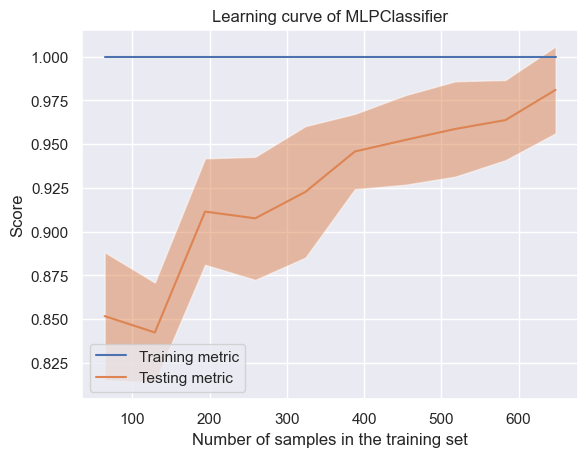

In [748]:
# Plots the learning curve for the best MLPClassifier.

plot_learning_curve(neural, X_train_feature_selection, y_train, "MLPClassifier")

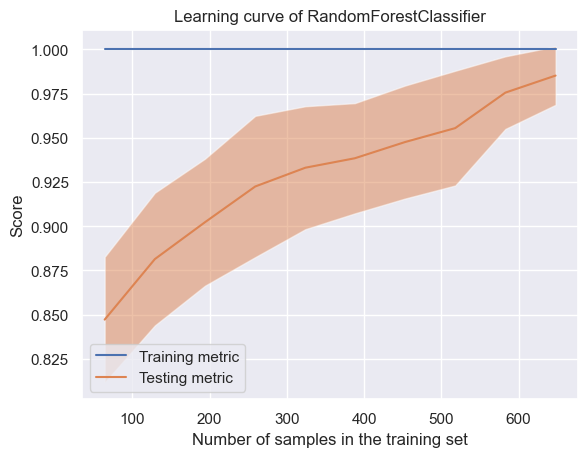

In [749]:
# Plots the learning curve for Random Forest.

plot_learning_curve(random_forest, X_train_feature_selection, y_train, "RandomForestClassifier")

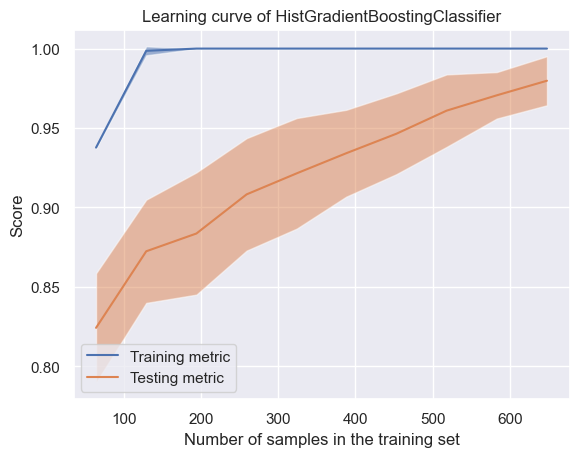

In [750]:
# Plots the learning curve for Histogram Gradient Boosting.

plot_learning_curve(hist_gradient, X_train_feature_selection, y_train, "HistGradientBoostingClassifier")

#### Result

The learning curves for our best three models show that the score increases continuously with the increasing number of samples. There is no sign of under- or overfitting the training data. As seen on our average f1 test scores, all models perform with a F1 score greater then 98%.

<a class="anchor" id="ROCCurve">

### 7.2.7. ROC Curve

</a>

The ROC Curve shows the performance of our models. In general, it represents the trade-off between sensitivity and specificity. A classifier that draws a curve closer to the top-left corner indicates a better performance. 

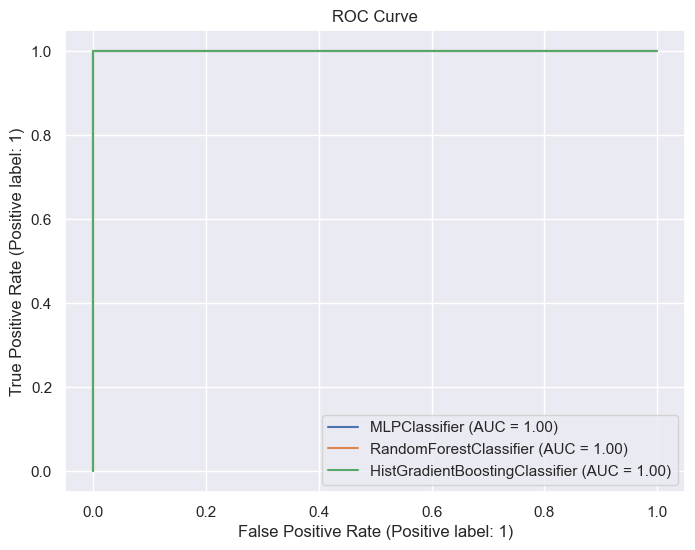

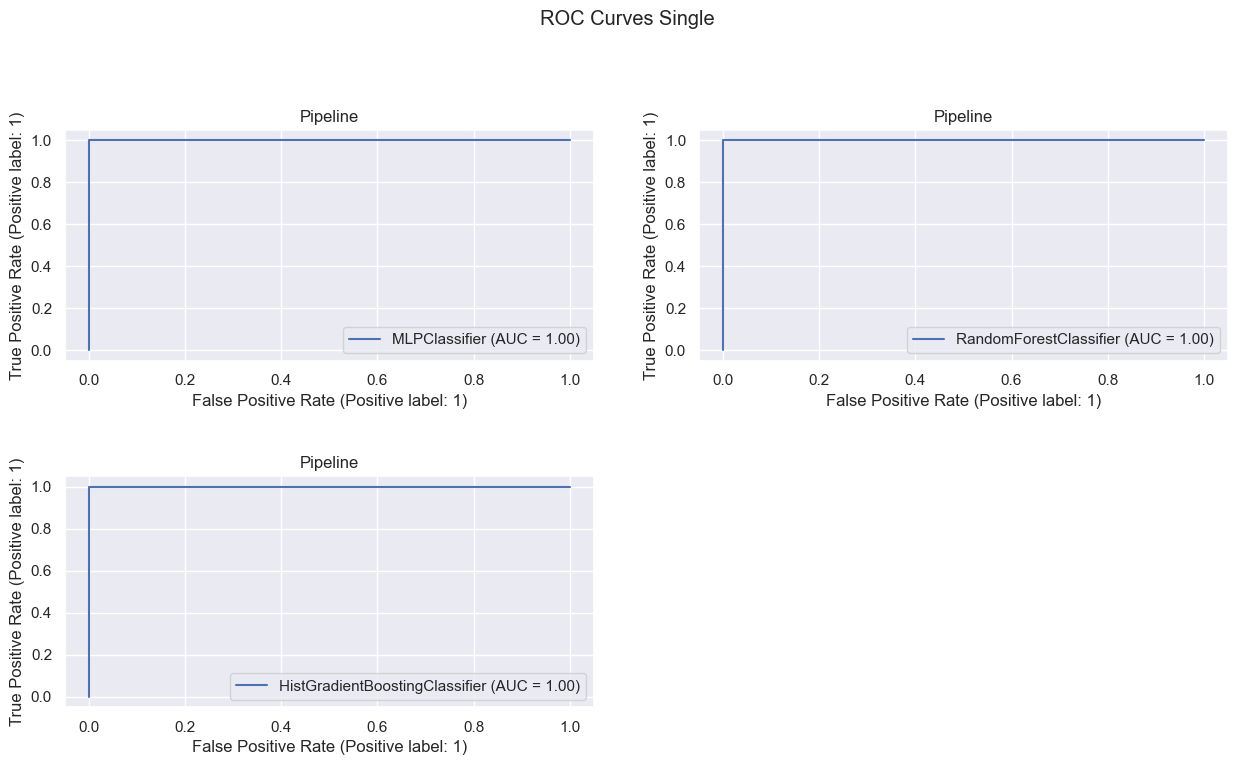

In [751]:
# Plot the ROC curves for the tuned classifiers.

plot_roc_curves(classifier= tuned_classifiers, 
                X_test= X_val, 
                y_test= y_val)

#### Result

The area under the curve (AUC) for each model shows the value 1. This means, that our models are able to classify all positive instances correctly and made no mistakes.

<a class="anchor" id="Voting">

### 7.2.8. Voting Classifier

</a>

For further improvement of the scores the stacking ensemble method VotingClassifier is introduced.
The VotingClassifier takes several different estimators as arguments and a voting method:
- Hard voting: Uses the predicted labels and a majority rule voting 
- Soft voting: Predicts the label based on the largest predicted value of the sum of the predicted probabilities.

The Voting Classifier is tested later on the validation dataset.

In [752]:
# Initialize one VotingClassifier for each voting method.
# The best models from the hyperparameter tuning are used as estimators.

hard_voting = VotingClassifier(estimators = [('random', random_forest),
                                            ('neural', neural),
                                            ('hist', hist_gradient)], 
                                            voting= "hard",
                                            n_jobs=-1)


soft_voting = VotingClassifier(estimators = [('random', random_forest),
                                            ('neural', neural),
                                            ('hist', hist_gradient)], 
                                            voting= "soft",
                                            n_jobs=-1)

<a class="anchor" id="Validation">

### 7.2.9. Test against Validation Dataset

</a>

In [753]:
# Returns the F1 score for each estimator based on the validation data.

for estimator in tuned_classifiers:

    test_against_validation(estimator, X_val, y_val)

Score for MLPClassifier: 0.975
Score for RandomForestClassifier: 0.962
Score for HistGradientBoostingClassifier: 0.962


In [754]:
# Calculates the F1 score for the Voting Classifier with hard voting.

# Fits the VotingClassifier to the training data.
hard_voting.fit(X_train_feature_selection, y_train)

# Predicts the labels.
y_pred = hard_voting.predict(X_val)

# Calculates the F1 score of the predicted labels and 
# validation data.
score = f1_score(y_val, y_pred)

# Prints the score.
print(f"Score for Hard Voting: {np.round(score, 4)}")

Score for Hard Voting: 0.962


In [755]:
# Calculates the F1 score for the Voting Classifier with soft voting.

# Fits the VotingClassifier to the training data.
soft_voting.fit(X_train_feature_selection, y_train)

# Predicts the labels.
y_pred = soft_voting.predict(X_val)

# Calculates the F1 score of the predicted labels and 
# validation data.
score = f1_score(y_val, y_pred)

# Prints the score.
print(f"Score for Soft Voting: {np.round(score, 4)}")

Score for Soft Voting: 0.975


<a class="anchor" id="Results">

## 7.3. Results

</a>

In this part the test dataframe is introduced and the data transformed with the OneHotEncoder fitted on the training data.
All Feature Engineering steps in 5.2. were also applied.

Based on the scores of the validation dataset, we define the Soft Voting Classifier as our final model.

In [756]:
best_estimator = soft_voting

In [757]:
# Import each xlsx file in a pandas dataframe.
test_demo = pd.read_excel("Data/test_demo.xlsx")
test_habits = pd.read_excel("Data/test_habits.xlsx")
test_health = pd.read_excel("Data/test_health.xlsx")

# Combine the 3 datasets in one dataframe.
test_df = test_demo.merge(test_habits, on="PatientID").merge(test_health, on="PatientID")

# Setting the PatiendID as index for the dataset.
test_df.set_index("PatientID", inplace=True)

# Check, if all data was correctly imported.
test_df.head(3)

Name  Birth_Year                    Region  \
PatientID                                                                
1343         Mr. Ricardo Sherman        1970             East Midlands   
1727       Mr. Jessie Strickland        1966  Yorkshire and the Humber   
1828          Mr. Robert Foreman        1978             West Midlands   

                                             Education Smoking_Habit  \
PatientID                                                              
1343              Elementary School (1st to 9th grade)           Yes   
1727             University Complete (3 or more years)            No   
1828       High School Incomplete (10th to 11th grade)            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1343       I usually consume alcohol every day       No   
1727        I consider myself a social drinker       No   
1828       I usually consume alcohol every day      Yes   

                                               Fruit_Habit  \
PatientID                                                    
1343       Less than 1. I do not consume fruits every day.   
1727       Less than 1. I do not consume fruits every day.   
1828       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1343                     Between one liter and two liters     172      80   
1727       More than half a liter but less than one liter     171      80   
1828                     Between one liter and two liters     171      78   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1343                    203             172             20                2   
1727                    225             130             21                0   
1828                    237             130             24                1   

                     Checkup  \
PatientID                      
1343                Not sure   
1727                Not sure   
1828       More than 3 years   

                                                    Diabetes  
PatientID                                                     
1343       I have/had pregnancy diabetes or borderline di...  
1727                                      I do have diabetes  
1828       I have/had pregnancy diabetes or borderline di...

In [758]:
# Encode and feature engineering for test dataframe.

transformed_test_df = prepare_test_data(test_df, encoder)

In [759]:
# Predict the labels for the test dataframe.

test_labels = best_estimator.predict(transformed_test_df)

In [760]:
# Creates upload dataframe.

upload_csv = pd.DataFrame(test_labels, columns=["Disease"], index=transformed_test_df.index)

In [761]:
# Creates upload CSV file.

upload_csv.to_csv("upload.csv")

<a class="anchor" id="FinalConclusion">

# 8. Final conclusion

</a>

After uploading the predicted labels of the test data with our best estimator, we reach at Kaggle a score of 1. This means, that we predicted all labels corretly.